In [ ]:
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_ingredient_data_histograms(ingredient_df, rotation=15, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(ingredient_df)

    # Plotting histograms for each feature
    features = ['Colour', 'Taste', 'Texture', 'Healthy']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()

    # Count the number of 1s in specified groups
    groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']
    
    group_rename = {
        'Group A veg': 'Vegetables',
        'Group A fruit': 'Fruits',
        'Group BC': 'Protein',
        'Group D': 'Carbs',
        'Group E': 'Dairy',
        'Bread': 'Bread',
        'Confectionary': 'Confectionary'
    }
    
    counts = {group: df[group].sum() for group in groups}

    # Calculate the number of ingredients not in any group
    total_ingredients = len(df)
    ingredients_in_groups = sum(counts.values())
    ingredients_not_in_any_group = total_ingredients - ingredients_in_groups

    # Rename the groups for the plot and add the "None" category
    renamed_counts = {group_rename[group]: count for group, count in counts.items()}
    renamed_counts['Misc'] = ingredients_not_in_any_group

    # Plot the counts on a bar chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(renamed_counts.keys(), renamed_counts.values(), color='skyblue')
    ax.set_xlabel('Groups', fontsize=fontsize)
    ax.set_ylabel('Number of Ingredients in Group', fontsize=fontsize)
    plt.xticks(rotation=15, fontsize=fontsize)
    plt.tight_layout()
    plt.show()

# Assuming the function get_data returns the appropriate DataFrame
from utils.process_data import get_data
ingredient_df = get_data("data.csv")

plot_ingredient_data_histograms(ingredient_df)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_child_data_histograms(child_data, rotation=0, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(child_data).T

    # Plotting histograms for each feature
    features = ['age', 'gender', 'health_consideration', 'favorite_cuisine']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        # axes[idx].set_title(f'Histogram of {formatted_feature}', fontsize=fontsize)
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
child_data = get_child_data()
plot_child_data_histograms(child_data)


In [ ]:
ingredient_df = get_data("data.csv")
child_data = get_child_data()
data = initialize_child_preference_data(child_data=child_data, ingredient_df=ingredient_df, plot_graphs=True, child_key_plot='c2hild23')

In [ ]:
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.preference_utils import (get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy, calculate_percent_of_known_ingredients_to_unknown, plot_individual_child_known_percent, plot_preference_and_sentiment_accuracies, plot_utilities_and_mape, plot_utilities_from_json)
from utils.process_data import get_data

child_data = get_child_data()
ingredient_df = get_data("data.csv")
true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=None, plot_graphs=False, split = 0.5)

# Set to zero for complete randomness
probability_best = 0
# Random is all equal and score is based on the score of the ingredient in terms of the negotiated list
weight_type = "random"
# weight_type = "score"
menu_plan_length = 10
seed = None

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}
weight_function = 'simple'



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Define a function to run the model and collect the data
def run_model_for_confusion_matrix(model_name_dict, iterations, ingredient_df, child_data, true_child_preference_data, seed):
    results = {}
    
    for model_name in model_name_dict.keys():
        if model_name == "perfect":
            continue  # Skip the 'perfect' model

        all_true_labels = []
        all_pred_labels = []

        for _ in range(iterations):
            # Initialize and run the preference model
            predictor = PreferenceModel(
                ingredient_df, child_data, true_child_preference_data, visualize_data=False, file_path=None, seed=seed
            )
            updated_known_and_predicted_preferences, total_true_preferences, total_predicted_preferences, label_encoder = predictor.run_pipeline()

            previous_feedback = {}
            previous_utility = {}

            # Initial negotiation of ingredients
            negotiator = IngredientNegotiator(
                seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback, previous_utility,
            )

            negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

            # Calculate week and day
            week = 1
            day = 1

            # Save negotiation results
            negotiator.close("log_file.json", week=week, day=day)

            menu_generator = RandomMenuGenerator(menu_plan_length=1, weight_type='random', probability_best=probability_best, seed=None)

            # Generate menu based on negotiated list
            menu_plan = menu_generator.generate_menu(negotiated_ingredients_simple, unavailable_ingredients, save_paths={'data': '', 'graphs': ''}, week=week, day=day)

            # Sentiment analysis initiation, initially with true preference data and will adapt it to updated preferences from feedback
            sentiment_analyzer = SentimentAnalyzer(
                true_child_preference_data, menu_plan, model_name=model_name, seed=None
            )

            # Get updated preferences from feedback, the sentiment accuracy and feedback given
            updated_known_unknown_preferences_with_feedback, sentiment_accuracy, feedback_given, true_labels, pred_labels = sentiment_analyzer.get_sentiment_and_update_data(plot_confusion_matrix=False)

            # Remove None values from true_labels and corresponding pred_labels
            filtered_true_labels = []
            filtered_pred_labels = []

            for true_label, pred_label in zip(true_labels, pred_labels):
                if true_label is not None:  # Filter out None values
                    filtered_true_labels.append(true_label)
                    filtered_pred_labels.append(pred_label)

            # Collect filtered labels from this iteration
            all_true_labels.extend(filtered_true_labels)
            all_pred_labels.extend(filtered_pred_labels)

            # Assign the feedback given to the previous feedback for complex weight calculation
            previous_feedback = feedback_given

        # Calculate overall accuracy
        accuracy = accuracy_score(all_true_labels, all_pred_labels) * 100

        # Create a mapping from label names to indices based on the label encoder
        label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}
        ordered_labels = ['dislikes', 'neutral', 'likes']
        encoded_labels = [label_mapping[label] for label in ordered_labels]

        # Generate the confusion matrix
        cm = confusion_matrix(all_true_labels, all_pred_labels, labels=ordered_labels)

        # Store results for plotting
        results[model_name] = {
            'cm': cm,
            'ordered_labels': ordered_labels,
            'accuracy': accuracy
        }

    return results

# Call the function to run the model and collect data
model_name_dict = {
    'roberta': "cardiffnlp/twitter-roberta-base-sentiment-latest",
    'bertweet': "finiteautomata/bertweet-base-sentiment-analysis",
    'distilroberta': "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    '5_star': "nlptown/bert-base-multilingual-uncased-sentiment",
    'perfect': "perfect",  # Skip this one
    'TextBlob': "TextBlob",
    'Vader': "Vader"
}
iterations = 50  # Number of iterations for each model

# Assume ingredient_df, child_data, true_child_preference_data, seed, and other required variables are defined elsewhere
results = run_model_for_confusion_matrix(model_name_dict, iterations, ingredient_df, child_data, true_child_preference_data, seed)

# Now you have the results, which you can plot separately


In [ ]:
results

In [ ]:
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})
# Initialize the subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Iterate over the results and plot
index = 0  # Index for subplots
for model_name, data in results.items():
    cm = data['cm']
    ordered_labels = data['ordered_labels']
    accuracy = data['accuracy']

    # Use the display_labels to match the order in 'ordered_labels'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)

    # Plot on the current subplot
    disp.plot(ax=axes[index], cmap=plt.cm.Blues, colorbar=False, xticks_rotation=0)
    axes[index].set_title(f'{model_name}, Accuracy: {accuracy:.1f}\%', fontsize=16)
    axes[index].set_xlabel('Predicted', fontsize=16)
    axes[index].set_ylabel('True', fontsize=16)
    axes[index].tick_params(axis='both', labelsize=14)
    
    # Increase font size for the text within the confusion matrix
    for text in disp.text_.ravel():
        text.set_fontsize(14)  # Set the desired font size here

    index += 1  # Move to the next subplot

# Adjust layout spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=-0.8)  # Adjust as needed

# Adjust layout
plt.tight_layout()
plt.show()


# Prediction

In [ ]:
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer


name ='Random Forest'

        # models = {
        #     "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=10000),
        #     "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True),
        #     "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss'),
        #     "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini'),
        #     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
        #     "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
        #     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),
        #     "Decision Tree": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None),
        #     "Gaussian Naive Bayes": GaussianNB(),
        #     "Stochastic Gradient Descent": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, tol=1e-3),
        #     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
        # }

child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = 0.5, seed=None, plot_graphs=False)

predictor = PreferenceModel(
    ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=True, file_path='preferences_visualization.png', seed=None
)
updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()

accuracy = accuracy_score(true_labels, predicted_labels)

accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)

print(accuracy)

print(accuracy_total)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

import os
from utils.process_data import get_data
from models.preferences.preference_utils import print_preference_difference_and_accuracy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', C=10, max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', eval_metric='mlogloss', scale_pos_weight=1),  # XGBoost uses scale_pos_weight for class balancing
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini', class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),  # No direct class_weight support
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),  # No direct class_weight support
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),  # No direct class_weight support
    "Decision Tree": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, class_weight='balanced'),
    "Gaussian Naive Bayes": GaussianNB(),  # No direct class_weight support
    "Stochastic Gradient Descent": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=2000, tol=1e-3, class_weight='balanced'),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=2000)  # No direct class_weight support
}

# Define scorers with `average='macro'` set only for the appropriate metrics
scorers = {
'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
'accuracy': make_scorer(accuracy_score)  # No `average` parameter here
}

child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")

# Initial prediction of preferences
file_path = os.path.join('', "preferences_visualization.png")



# Assuming all imports and other necessary function definitions have been done as in the provided code.
import random
def evaluate_models():
    # Evaluate models using cross-validation
    results = []
    
    for iter in range(1):
        for split in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
            initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = split, seed=random.randint(0, 1e36), plot_graphs=False)
            for name, model in models.items():
                predictor = PreferenceModel(
                    ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, file_path=file_path, seed=None
                )
                updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
                accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)
                del updated_preferences
                # Calculate accuracy
                accuracy = accuracy_score(true_labels, predicted_labels)

                # Print the model, accuracy, and iteration
                print(f"Iteration: {iter + 1}, Model: {name}, Accuracy: {accuracy:.4f}, Total Accuracy: {accuracy_total:.4f}")

                # Loop over each scorer
                for scorer_name, scorer in scorers.items():
                    # Calculate the score using the scorer
                    if scorer_name in ['precision_macro', 'recall_macro', 'f1_macro']:
                        score = scorer._score_func(true_labels, predicted_labels, average='macro')
                    else:
                        score = scorer._score_func(true_labels, predicted_labels)
                    
                    results.append({
                        "Iteration": iter,
                        "Split": split,
                        "Model": name,
                        "Metric": scorer_name,
                        "Score": score
                    })

    # Convert results to DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    
    return results_df


def get_ranked_models(results_df):
    # Rank models for each metric
    ranked_results = results_df.copy()
    ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

    # Convert results to DataFrame for easy comparison
    results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

    print(results_df_sorted)
    return results_df_sorted


# Example usage:

results_df = evaluate_models()
sorted_results_df = get_ranked_models(results_df)

    

In [ ]:
# Assuming `sorted_results_df` is your sorted DataFrame from the previous code
output_file_path = "sorted_results.csv"

# Save the DataFrame to a CSV file
sorted_results_df.to_csv(output_file_path, index=False)

print(f"Sorted results have been saved to {output_file_path}")


In [ ]:
grouped = sorted_results_df.groupby(['Model', 'Split', 'Metric']).agg({'Score': ['mean', 'std', 'count']}).reset_index()


# Sort by the mean score (descending) to find the best model
grouped_avg = grouped.sort_values(by=('Score', 'mean'), ascending=False)


# Display the top 10 models
top_10_models = grouped_avg.head(20)

# Display the results
print(top_10_models)


In [ ]:
import matplotlib.pyplot as plt

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})


print(grouped['Model'])
# Extract unique models
models = grouped['Model'].unique()
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
colors = ['green', 'red', 'gray', 'magenta']

# Map models to colors
model_colors = {model: colors[i % len(colors)] for i, model in enumerate(models)}

# Plotting the data
plt.figure(figsize=(8, 5))
for model in models:
    filtered1 = grouped[grouped['Model'] == model]  # Filter data for the model
    model_data = filtered1[filtered1['Metric'] == 'accuracy']  # Filter data for the accuracy metric
    
    # Sort data by Split to ensure lines connect properly
    model_data = model_data.sort_values(by='Split')
    
    # Plotting lines between points
    plt.plot(model_data['Split'], model_data['Score']['mean'],
             color=model_colors[model],
             linestyle='-',  # Line style for connecting points
             label=model)
    
    # Plotting the scatter points with crosses
    plt.scatter(model_data['Split'], model_data['Score']['mean'],
                color=model_colors[model],
                marker='x')  # Cross marker for scatter points

# Adding labels and title with custom font size
plt.xlabel(r'Split Ratio', fontsize=14)
plt.ylabel(r'Accuracy', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

# Creating a legend outside the plot, on the right
plt.legend(title="Model Type", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=12)

plt.show()


In [ ]:
import pandas as pd
import optuna
import os
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from models.preferences.prediction import PreferenceModel
from models.preferences.preference_utils import print_preference_difference_and_accuracy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data
from utils.process_data import get_data

# Define models with initial hyperparameters
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', scale_pos_weight=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini', class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

# Define scorers
scorers = {
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': make_scorer(accuracy_score)
}

# Load and preprocess data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
file_path = os.path.join('', "preferences_visualization.png")


def optimize_hyperparameters(model_name, ingredient_df, child_feature_data, initial_preference, n_trials=250):
    def objective(trial):
        # Re-initialize preferences for each trial
        initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)
        # Define the hyperparameter search space
        if model_name == "XGBoost":
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
                'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1.0, 3.0),
                'eval_metric': 'mlogloss',
                'use_label_encoder': False
            }
            model = XGBClassifier(**params)
        elif model_name == "Random Forest":
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
                'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                'class_weight': 'balanced'
            }
            model = RandomForestClassifier(**params)
        elif model_name == "Support Vector Machine":
            params = {
                'C': trial.suggest_loguniform('C', 1e-3, 1e2),
                'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
                'probability': True,
                'class_weight': 'balanced'
            }
            model = SVC(**params)
            
        elif model_name == "MLP Classifier":
            params = {
                'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
                'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic']),
                'solver': trial.suggest_categorical('solver', ['adam', 'lbfgs']),
                'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-2),
                'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
                'max_iter': 10000
            }
            model = MLPClassifier(**params)
            
        elif model_name == "Decision Tree":
            params = {
                'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                'max_depth': trial.suggest_int('max_depth', 2, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', [None, 'auto', 'sqrt', 'log2']),
                'class_weight': 'balanced'
            }
            model = DecisionTreeClassifier(**params)
            
        else:
            raise ValueError(f"Model {model_name} not found in the defined models.")

        # Re-run the preference model with the new hyperparameters
        predictor = PreferenceModel(
            ingredient_df, child_feature_data, initial_preference, model_name=model_name,
            visualize_data=False, file_path=file_path, seed=None
        )
        
        updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()
        del updated_preferences
        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        
        return accuracy
    
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=n_trials)
    
    print(f"\nBest hyperparameters for {model_name}:")
    print(study.best_params)
    print(f"Best cross-validation accuracy: {study.best_value:.4f}")
    
    return study.best_params, study.best_value

# Main execution
top_models = ["MLP Classifier", "XGBoost", "Random Forest", "Support Vector Machine", "Decision Tree"]

# Initialize preferences for Optuna optimization
initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)


optimized_models = {}
for model_name in top_models:
    print(f"\nOptimizing hyperparameters for {model_name}")
    best_params, best_score = optimize_hyperparameters(model_name, ingredient_df, child_feature_data, initial_preference)
    
    optimized_models[model_name] = {
        'best_params': best_params,
        'best_score': best_score,
    }

# Display optimized hyperparameters and scores
print("\nOptimized Hyperparameters and Scores for Top 3 Models:")
for model_name in optimized_models:
    print(f"\nModel: {model_name}")
    print(f"Best Hyperparameters: {optimized_models[model_name]['best_params']}")
    print(f"Best Cross-Validation Accuracy: {optimized_models[model_name]['best_score']:.4f}")


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best cross-validation accuracy: 0.9271

Optimized Hyperparameters and Scores for Top 3 Models:

Model: MLP Classifier
Best Hyperparameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0001448702585671116, 'learning_rate': 'adaptive'}
Best Cross-Validation Accuracy: 0.9443

Model: XGBoost
Best Hyperparameters: {'n_estimators': 214, 'learning_rate': 0.0015221379497286794, 'max_depth': 6, 'subsample': 0.6228265600766979, 'colsample_bytree': 0.7421589270173782, 'scale_pos_weight': 2.4741969781216535}
Best Cross-Validation Accuracy: 0.8721

Model: Random Forest
Best Hyperparameters: {'n_estimators': 182, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best Cross-Validation Accuracy: 0.9226

Model: Support Vector Machine
Best Hyperparameters: {'C': 0.0033922720321681796, 'kernel': 'rbf', 'gamma': 0.0002471412567416406}
Best Cross-Validation Accuracy: 0.9065

Model: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Cross-Validation Accuracy: 0.9271

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

# Define the top models
top_models = ["MLP Classifier", "Random Forest", "Support Vector Machine", "Decision Tree"]

# Initialize empty lists to accumulate true and predicted labels for each model
accumulated_true_labels = {model: [] for model in top_models}
accumulated_predicted_labels = {model: [] for model in top_models}
accuracies = {}

# Get the data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
import random
# Run the loop 10 times
for i in range(10):
    print(f"Iteration {i+1}")
    
    # Reinitialize preferences
    initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=random.randint(0, 1e36), plot_graphs=False)
    
    # Iterate over each model
    for name in top_models:
        # Initialize the predictor with the current model
        predictor = PreferenceModel(
            ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, file_path=None, seed=None
        )
        
        # Run the pipeline to get updated preferences, true labels, and predicted labels
        updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
        
        # Accumulate the true and predicted labels
        accumulated_true_labels[name].extend(true_labels)
        accumulated_predicted_labels[name].extend(predicted_labels)
        
        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        accuracies[name] = accuracy
        print(f"{name} - Accuracy: {accuracy:.4f}")

# Save the results
results = {
    'accumulated_true_labels': accumulated_true_labels,
    'accumulated_predicted_labels': accumulated_predicted_labels,
    'accuracies': accuracies
}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import numpy as np

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})


def plot_confusion_matrices(results, top_models, label_encoder, tick_fontsize=10, label_fontsize=12, title_fontsize=13):
    # Extract results
    accumulated_true_labels = results['accumulated_true_labels']
    accumulated_predicted_labels = results['accumulated_predicted_labels']
    accuracies = results['accuracies']
    
    # Desired order of classes
    desired_order = ['dislikes', 'neutral', 'likes']
    
    # Calculate micro-average F1-scores for each model
    weighted_avg_f1_scores = {}
    for name in top_models:
        weighted_avg_f1_scores[name] = f1_score(accumulated_true_labels[name], accumulated_predicted_labels[name], average='weighted')
    
    # Plot confusion matrices in a square layout suitable for A4 page
    fig, axes = plt.subplots(2, 2, figsize=(8.27, 8.27))  # Square plot on A4 page
    axes = axes.flatten()

    for idx, name in enumerate(top_models):
        # Calculate the confusion matrix
        cm = confusion_matrix(accumulated_true_labels[name], accumulated_predicted_labels[name])
        
        # Inverse transform the labels to their original form
        class_names = label_encoder.inverse_transform(range(len(cm)))

        # Create a mapping from class name to index
        class_to_index = {name: i for i, name in enumerate(class_names)}
        
        # Determine the new order of indices based on the desired order
        new_order = [class_to_index[desired_label] for desired_label in desired_order if desired_label in class_to_index]
        
        # Reorder the confusion matrix based on the new order
        cm_ordered = cm[np.ix_(new_order, new_order)]
        
        # Plot the confusion matrix without the color bar
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_ordered, display_labels=[class_names[i] for i in new_order])
        disp.plot(ax=axes[idx], cmap=plt.cm.Blues, colorbar=False, values_format='d')
        
        # Set the title with the model name, accuracy, and micro F1-score
        overall_accuracy = accuracies[name]
        weighted_f1 = weighted_avg_f1_scores[name]
        axes[idx].set_title(
            f"{name} - Acc: {overall_accuracy * 100:.1f}\\%, Weighted F1: {weighted_f1 * 100:.1f}\\%", 
            fontsize=title_fontsize
        )
        
        # Set font size for ticks and labels
        axes[idx].tick_params(axis='both', which='major', labelsize=tick_fontsize)
        axes[idx].set_xlabel(axes[idx].get_xlabel().split(" ")[0], fontsize=label_fontsize)
        axes[idx].set_ylabel(axes[idx].get_ylabel().split(" ")[0], fontsize=label_fontsize)

    plt.tight_layout()
    plt.show()

# Call the plotting function with label_encoder as an additional argument
plot_confusion_matrices(results, top_models, label_encoder)


In [245]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Define the file path
file_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/saved_data/data/run_1/menu_utilities_complex.json'

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

def calculate_gini_coefficient(utilities):
    utilities = np.array(utilities)
    n = len(utilities)
    
    # Calculate the mean absolute utility
    mean_absolute_utility = np.mean(np.abs(utilities))
    
    # Compute the sum of absolute differences
    absolute_differences_sum = np.sum(np.abs(np.subtract.outer(utilities, utilities)))
    
    # Compute the Gini coefficient
    gini = absolute_differences_sum / (2 * n**2 * mean_absolute_utility)
    
    return gini

def calculate_gini_per_day(data, key):
    """
    Calculate the Gini coefficient for each day.
    
    :param data: The JSON data loaded from the file.
    :param key: The key to calculate the Gini coefficient for (e.g., 'true_raw_utility', 'predicted_raw_utility').
    :return: A dictionary with days as keys and their Gini coefficients.
    """
    gini_per_day = {}

    for entry in data:
        for day, children_data in entry[key].items():
            gini_per_day[day] = calculate_gini_coefficient(list(children_data.values()))
    
    return gini_per_day

def calculate_gini_per_week(data, key):
    """
    Calculate the Gini coefficient for each week.
    
    :param data: The JSON data loaded from the file.
    :param key: The key to calculate the Gini coefficient for (e.g., 'true_raw_utility', 'predicted_raw_utility').
    :return: A dictionary with weeks as keys and their Gini coefficients.
    """
    gini_per_week = defaultdict(list)

    for entry in data:
        week = entry['week']
        weekly_utilities = []
        for day, children_data in entry[key].items():
            weekly_utilities.extend(list(children_data.values()))
        gini_per_week[week].append(calculate_gini_coefficient(weekly_utilities))
    
    # Calculate average Gini for the week
    for week in gini_per_week:
        gini_per_week[week] = np.mean(gini_per_week[week])
    
    return gini_per_week

# Example: Calculate Gini per day for 'true_raw_utility'
gini_per_day = calculate_gini_per_day(data, key='true_raw_utility')

# Example: Calculate Gini per week for 'true_raw_utility'
gini_per_week = calculate_gini_per_week(data, key='true_raw_utility')

# Plotting the total sum per child across all days
def plot_sum(sum_data, title, ylabel, xlabel="Children or Days"):
    plt.figure(figsize=(12, 6))
    plt.bar(sum_data.keys(), sum_data.values(), color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Plotting the total sum per day as a line chart
def plot_line_chart(sum_data, title, ylabel, xlabel="Days or Weeks"):
    plt.figure(figsize=(12, 6))
    plt.plot(list(sum_data.keys()), list(sum_data.values()), marker='o', color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot sum across all days for each child
plot_sum(sum_all_days, title="Total Sum per Child Across All Days", ylabel="Sum of Values")

# Plot sum per day as a line chart
plot_line_chart(sum_per_day, title="Total Sum per Day", ylabel="Sum of Values", xlabel="Days")

# Plot sum per week as a line chart
plot_line_chart(sum_per_week, title="Total Sum per Week", ylabel="Sum of Values", xlabel="Weeks")

# Plot Gini per day as a line chart
plot_line_chart(gini_per_day, title="Gini Coefficient per Day", ylabel="Gini Coefficient", xlabel="Days")

# Plot Gini per week as a line chart
plot_line_chart(gini_per_week, title="Gini Coefficient per Week", ylabel="Gini Coefficient", xlabel="Weeks")


FileNotFoundError: [Errno 2] No such file or directory: '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/saved_data/data/run_1/menu_utilities_complex.json'

In [ ]:


import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


results = {}

from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.preference_utils import (get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy, calculate_percent_of_known_ingredients_to_unknown, plot_individual_child_known_percent, plot_preference_and_sentiment_accuracies, plot_utilities_and_mape, plot_utilities_from_json)
from utils.process_data import get_data

child_data = get_child_data()
ingredient_df = get_data("data.csv")
true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=10, plot_graphs=False, split = 0.35)

# Set to zero for complete randomness
probability_best = 0
# Random is all equal and score is based on the score of the ingredient in terms of the negotiated list
weight_type = "random"
# weight_type = "score"
menu_plan_length = 10
seed = None

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}
weight_function = 'simple'


# Initialize and run the preference model
predictor = PreferenceModel(
    ingredient_df, child_data, true_child_preference_data, visualize_data=False, file_path=None, seed=seed
)
updated_known_and_predicted_preferences, total_true_preferences, total_predicted_preferences, label_encoder = predictor.run_pipeline()

previous_feedback = {}
previous_utility = {}

# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
    seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback, previous_utility,
)

negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

# Calculate week and day
week = 1
day = 1

# Save negotiation results
negotiator.close("log_file.json", week=week, day=day)

In [ ]:
negotiated_ingredients_simple.keys()

In [ ]:
keys = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary', 'Misc']
# Sorting the dictionary by values
sorted_group_a_veg = dict(sorted(negotiated_ingredients_simple[keys[1]].items(), key=lambda item: item[1], reverse=True))
sorted_group_a_veg = list(sorted_group_a_veg.items())
print(sorted_group_a_veg)
list_true = []
for ingredient, value in sorted_group_a_veg:
    likes = 0
    neutral = 0
    dislikes = 0
    for child in child_data:
        for category in ['likes', 'neutral', 'dislikes']:
            if ingredient in true_child_preference_data[child]['known'][category] + true_child_preference_data[child]['unknown'][category]:
                if category == 'likes':
                    likes += 1
                elif category == 'neutral':
                    neutral += 1
                else:
                    dislikes += 1
    score = (likes*5) + (neutral*1) + (dislikes*-5)
    print(ingredient, likes, neutral, dislikes, score)
    list_true.append((ingredient, score))
    
list_true = sorted(list_true, key=lambda x: x[1], reverse=True)

In [ ]:
# Function to compare scores and compute differences along with rank changes
def compare_scores_and_ranks(list1, list2):
    comparison = []
    dict1 = {item[0]: (rank, item[1]) for rank, item in enumerate(list1, start=1)}
    dict2 = {item[0]: (rank, item[1]) for rank, item in enumerate(list2, start=1)}
    
    for ingredient in dict1:
        if ingredient in dict2:
            rank_diff = dict1[ingredient][0] - dict2[ingredient][0]
            score_diff = dict1[ingredient][1] - dict2[ingredient][1]
            comparison.append((ingredient, dict1[ingredient][1], dict2[ingredient][1], score_diff, rank_diff))
    
    return comparison

# Compare the scores and ranks
comparison_data = compare_scores_and_ranks(sorted_group_a_veg, list_true)

# Extract data for plotting
ingredients = [item[0] for item in comparison_data]
negotiated_scores = [item[1] for item in comparison_data]
true_scores = [item[2] for item in comparison_data]
score_diffs = [item[3] for item in comparison_data]
rank_diffs = [item[4] for item in comparison_data]

# Plotting the score differences and rank changes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the score differences as bars
bar_width = 0.35
index = np.arange(len(ingredients)) + 1  # Start the index from 1 for x-axis numbering

bars = ax1.bar(index, score_diffs, bar_width, color='purple', label='Score Difference')

# Creating a secondary axis for the ranking differences
ax2 = ax1.twinx()

# Plotting the rank changes as lines
lines = ax2.plot(index, rank_diffs, 'ro-', label='Rank Change')

# Labeling the axes
ax1.set_xlabel('Ingredient Number')
ax1.set_ylabel('Score Difference', color='purple')
ax2.set_ylabel('Rank Change', color='red')

# Adding titles and grid
plt.title('Score Differences and Rank Changes')
ax1.set_xticks(index)  # Set the x-axis ticks to match the index
ax1.set_xticklabels(index)  # Label the x-axis ticks as numbers
ax1.grid(True)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compare scores and compute differences along with rank changes
def compare_scores_and_ranks(list1, list2):
    comparison = []
    dict1 = {item[0]: (rank, item[1]) for rank, item in enumerate(list1, start=1)}
    dict2 = {item[0]: (rank, item[1]) for rank, item in enumerate(list2, start=1)}
    
    for ingredient in dict1:
        if ingredient in dict2:
            rank_diff = dict1[ingredient][0] - dict2[ingredient][0]
            score_diff = dict1[ingredient][1] - dict2[ingredient][1]
            comparison.append((ingredient, dict1[ingredient][1], dict2[ingredient][1], score_diff, rank_diff))
    
    return comparison

def run_negotiation_process(split_value):
    # Re-initialize child preference data with the given split
    true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=10, plot_graphs=False, split=split_value)
    
    # Initialize and run the preference model
    predictor = PreferenceModel(
        ingredient_df, child_data, true_child_preference_data, visualize_data=False, file_path=None, seed=seed
    )
    updated_known_and_predicted_preferences, total_true_preferences, total_predicted_preferences, label_encoder = predictor.run_pipeline()
    
    previous_feedback = {}
    previous_utility = {}

    # Initial negotiation of ingredients
    negotiator = IngredientNegotiator(
        5, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback, previous_utility,
    )

    negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

    # Initialize dictionary to store rank changes for each group
    rank_diffs_dict = {}
    
    keys = negotiated_ingredients_simple.keys()

    # Iterate over each group in keys
    for key in keys:
        # Sort the group by values
        sorted_group = dict(sorted(negotiated_ingredients_simple[key].items(), key=lambda item: item[1], reverse=True))
        sorted_group_list = list(sorted_group.items())

        # Create the list_true based on child preference data
        list_true = []
        for ingredient, value in sorted_group_list:
            likes = 0
            neutral = 0
            dislikes = 0
            for child in child_data:
                for category in ['likes', 'neutral', 'dislikes']:
                    if ingredient in true_child_preference_data[child]['known'][category] + true_child_preference_data[child]['unknown'][category]:
                        if category == 'likes':
                            likes += 1
                        elif category == 'neutral':
                            neutral += 1
                        else:
                            dislikes += 1
            score = (likes * 5) + (neutral * 1) + (dislikes * -5)
            list_true.append((ingredient, score))

        # Sort list_true by scores
        list_true = sorted(list_true, key=lambda x: x[1], reverse=True)

        # Compare the scores and ranks
        comparison_data = compare_scores_and_ranks(sorted_group_list, list_true)

        # Extract rank changes for plotting
        rank_diffs = [item[4] for item in comparison_data]

        # Store the rank changes in the dictionary
        rank_diffs_dict[key] = rank_diffs
    
    return rank_diffs_dict, true_child_preference_data

# Run the negotiation process for split 0.15
rank_diffs_015_dict, total_true_preferences_015 = run_negotiation_process(0.15)

# Run the negotiation process for split 0.5
rank_diffs_050_dict, total_true_preferences_050 = run_negotiation_process(0.8)



In [ ]:
for key, val in rank_diffs_015_dict.items():
    print(key, len(val))

In [ ]:
for key, val in rank_diffs_050_dict.items():
    print(key, len(val))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the default font to serif
plt.rcParams['font.family'] = 'serif'

# Colors for the lines
oxford_blue = '#002147'
crimson = '#DC143C'

# Generate a list of background colors
background_colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinct backgrounds

# Assign colors to groups
groups = list(rank_diffs_015_dict.keys())  # Assuming the groups are the same in both dictionaries
group_colors = {group: background_colors[i % len(background_colors)] for i, group in enumerate(groups)}

# Label mapping for the legend
label_mapping = {
    'Group A veg': 'Vegetables',
    'Group A fruit': 'Fruit',
    'Group BC': 'Protein',
    'Group D': 'Carbs',
    'Group E': 'Dairy',
    'Bread': 'Bread',
    'Confectionary': 'Confectionary',
    'Misc': 'Misc'
}

# Calculate average rank position
average_rank_015 = {group: np.mean(np.abs(rank_diffs_015_dict[group])) for group in rank_diffs_015_dict.keys()}
average_rank_050 = {group: np.mean(np.abs(rank_diffs_050_dict[group])) for group in rank_diffs_050_dict.keys()}

# Plotting the rank changes for both splits
fig, ax = plt.subplots(figsize=(10, 6))

index = 0
# First, plot the background color for each group based on rank_diffs_015_dict
for group in rank_diffs_015_dict.keys():
    group_size = len(rank_diffs_015_dict[group])
    
    # Color the background for the current group using the consistent color mapping
    ax.axvspan(index + 1, index + group_size, color=group_colors[group], alpha=0.2)
    
    index += group_size

index = 0
# Then, plot the background color for each group based on rank_diffs_050_dict
for group in rank_diffs_050_dict.keys():
    group_size = len(rank_diffs_050_dict[group])
    
    # Color the background for the current group using the consistent color mapping
    ax.axvspan(index + 1, index + group_size, color=group_colors[group], alpha=0.2)
    
    index += group_size

index = 0
# Now, plot the actual data for rank_diffs_015_dict without adding to the legend
for group in rank_diffs_015_dict.keys():
    rank_diffs = rank_diffs_015_dict[group]
    group_size = len(rank_diffs)
    
    ax.plot(np.arange(index + 1, index + 1 + group_size), rank_diffs, 
            marker='o', color=oxford_blue, markerfacecolor=oxford_blue, markeredgewidth=1.5, linestyle='-', 
            label='_nolegend_')  # Suppress legend entry
    
    index += group_size

index = 0
# Finally, plot the actual data for rank_diffs_050_dict without adding to the legend
for group in rank_diffs_050_dict.keys():
    rank_diffs = rank_diffs_050_dict[group]
    group_size = len(rank_diffs)
    
    ax.plot(np.arange(index + 1, index + 1 + group_size), rank_diffs, 
            marker='s', color=crimson, markerfacecolor=crimson, markeredgewidth=1.5, linestyle='--', 
            label='_nolegend_')  # Suppress legend entry
    
    index += group_size

# Labeling the axes with black text
ax.set_xlabel('Ingredient Number', color='black', fontsize=14)
ax.set_ylabel('Rank Change', color='black', fontsize=14)

# Removing x-axis ticks
ax.set_xticks([])

# Setting font sizes to 14 and color to black for both labels and ticks
ax.tick_params(axis='both', which='both', labelsize=14, colors='black')

# Create a custom legend for the background colors with mapped labels
custom_legend_background = [
    plt.Line2D([0], [0], color=group_colors[group], lw=4, label=label_mapping.get(group, group))
    for group in group_colors.keys()
]

# Create a custom legend for the training split lines and average rank position
custom_legend_lines = [
    plt.Line2D([0], [0], color=oxford_blue, lw=2, linestyle='-', label=f"Training Split 15% (Avg. Rank \u0394: {np.mean(list(average_rank_015.values())):.2f})"),
    plt.Line2D([0], [0], color=crimson, lw=2, linestyle='--', label=f"Training Split 50% (Avg. Rank \u0394: {np.mean(list(average_rank_050.values())):.2f})")
]

# Combine legends
legend1 = ax.legend(handles=custom_legend_background, loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=4, fontsize=14, frameon=False)
legend2 = ax.legend(handles=custom_legend_lines, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize=14, frameon=False)

# Add the first legend back manually (to not be overwritten by the second)
ax.add_artist(legend1)

# Ensure layout fits well
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data as before
ingredient_groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']

# Create a dictionary to map ingredients to groups
ingredient_to_groups = {
    ingredient: group for group in ingredient_groups 
    for ingredient in ingredient_df[ingredient_df[group] == 1]['Category7']
}

# Initialize counters for each group for the first set of data (total_true_preferences_015)
group_counts_015 = {group: {'likes': 0, 'neutral': 0, 'dislikes': 0} for group in set(ingredient_to_groups.values())}

# Count preferences for the first dataset
for child, preferences in total_true_preferences_015.items():
    known = preferences.get('known', {})
    for preference_type, ingredients in known.items():
        for ingredient in ingredients:
            group = ingredient_to_groups.get(ingredient)
            if group:
                group_counts_015[group][preference_type] += 1

# Initialize counters for each group for the second set of data (total_true_preferences_050)
group_counts_050 = {group: {'likes': 0, 'neutral': 0, 'dislikes': 0} for group in set(ingredient_to_groups.values())}

# Count preferences for the second dataset
for child, preferences in total_true_preferences_050.items():
    known = preferences.get('known', {})
    for preference_type, ingredients in known.items():
        for ingredient in ingredients:
            group = ingredient_to_groups.get(ingredient)
            if group:
                group_counts_050[group][preference_type] += 1

# Prepare data for plotting
labels = list(group_counts_015.keys())
likes_015 = [group_counts_015[group]['likes'] for group in labels]
neutral_015 = [group_counts_015[group]['neutral'] for group in labels]
dislikes_015 = [group_counts_015[group]['dislikes'] for group in labels]

likes_050 = [group_counts_050[group]['likes'] for group in labels]
neutral_050 = [group_counts_050[group]['neutral'] for group in labels]
dislikes_050 = [group_counts_050[group]['dislikes'] for group in labels]

x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

# Label mapping for the legend
label_mapping = {
    'Group A veg': 'Vegetables',
    'Group A fruit': 'Fruit',
    'Group BC': 'Protein',
    'Group D': 'Carbs',
    'Group E': 'Dairy',
    'Bread': 'Bread',
    'Confectionary': 'Confectionary',
    'Misc': 'Misc'
}

# Remap the labels using the label_mapping
remapped_labels = [label_mapping.get(label, label) for label in labels]

# Font size parameter
fontsize = 12  # Adjust this as needed

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

rects1_015 = ax1.bar(x - width, likes_015, width, label='Likes', color='g')
rects2_015 = ax1.bar(x, neutral_015, width, label='Neutral', color='y')
rects3_015 = ax1.bar(x + width, dislikes_015, width, label='Dislikes', color='r')
ax1.set_ylabel('Number of Preferences', fontsize=fontsize)
ax1.set_title('Training Split 15%', fontsize=fontsize)

rects1_050 = ax2.bar(x - width, likes_050, width, label='Likes', color='g')
rects2_050 = ax2.bar(x, neutral_050, width, label='Neutral', color='y')
rects3_050 = ax2.bar(x + width, dislikes_050, width, label='Dislikes', color='r')
ax2.set_xlabel('Ingredient Groups', fontsize=fontsize)
ax2.set_ylabel('Number of Preferences', fontsize=fontsize)
ax2.set_title('Training Split 50%', fontsize=fontsize)

# Add custom x-axis tick labels using the remapped labels
ax2.set_xticks(x)
ax2.set_xticklabels(remapped_labels, fontsize=fontsize)

# Set tick parameters for both axes
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)

# Common legend at the bottom
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=fontsize)

# Display the plot
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust the bottom to fit the legend
plt.show()


In [ ]:
import logging
import os
import json
import random
from sklearn.metrics import accuracy_score
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator, RLMenuGenerator
from models.preferences.utility_calculator import MenuUtilityCalculator


seed = None
menu_plan_length = 5
weight_type = 'random'
probability_best = 1

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}

# Initialize menu generators
seed_generator = random.randint(0, int(1e36))

# Load data
ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
true_child_preference_data = initialize_child_preference_data(
child_feature_data, ingredient_df, split=0.35, seed=seed_generator, plot_graphs=False
)



predictor = PreferenceModel(
ingredient_df, child_feature_data, true_child_preference_data, visualize_data=True, file_path='', seed=seed_generator
)

updated_known_and_predicted_preferences, total_true_unknown_preferences, total_predicted_unknown_preferences, label_encoder = predictor.run_pipeline()

label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}


# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback={}, previous_utility={}
)

negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()



In [ ]:
from models.preferences.random_menu_eval import MenuEvaluator

# Example parameters (these should be defined according to your actual setup)
ingredient_df = get_data("data.csv")  # Your DataFrame with ingredient data
menu_plan_length = 1  # Example menu plan length
weight_type = 'score'  # Example weight type
probability_best = 0.5  # Example probability to choose the best item
seed = 42  # Example seed for reproducibility

# Calculate week and day
week = 1
day = 1

# Instantiate the MenuEvaluator
evaluator = MenuEvaluator(ingredient_df, negotiated_ingredients_simple, unavailable_ingredients)

In [ ]:


# List of quantity generation methods to test
quantity_types = ["random", "simulated_annealing", "genetic_algorithm", "particle_swarm", "bayesian", "hill_climbing"]

for quantity_type in quantity_types:
    menu_generator_simple = RandomMenuGenerator(
        evaluator,
        menu_plan_length=menu_plan_length,
        weight_type=weight_type,
        probability_best=probability_best,
        seed=seed
    )

    # Generate the menu plan using the specified quantity generation method
    menu_plan_simple, score = menu_generator_simple.generate_menu(
        negotiated_ingredients_simple,
        unavailable_ingredients,
        quantity_type=quantity_type,  # Method to generate quantities
        final_meal_plan_filename='final_meal_plan_simple',
        save_paths={'data': '', 'graphs': ''},
        week=week,  # Week number
        day=day     # Day number
    )


In [ ]:
from models.preferences.random_menu_eval import MenuEvaluator

import logging
import os
import json
import random
from sklearn.metrics import accuracy_score
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)
from utils.process_data import get_data
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator, RLMenuGenerator
from models.preferences.utility_calculator import MenuUtilityCalculator


seed = None
menu_plan_length = 5
weight_type = 'random'
probability_best = 1

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}

# Load data
ingredient_df = get_data("data.csv")
child_feature_data = get_child_data()
true_child_preference_data = initialize_child_preference_data(
child_feature_data, ingredient_df, split=0.35, seed=seed, plot_graphs=False
)

# Initialize menu generators
seed_generator = random.randint(0, int(1e36))

predictor = PreferenceModel(
ingredient_df, child_feature_data, true_child_preference_data, visualize_data=True, file_path='', seed=seed
)

updated_known_and_predicted_preferences, total_true_unknown_preferences, total_predicted_unknown_preferences, label_encoder = predictor.run_pipeline()

label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}


# Initial negotiation of ingredients
negotiator = IngredientNegotiator(
seed, ingredient_df, updated_known_and_predicted_preferences, complex_weight_func_args, previous_feedback={}, previous_utility={}
)

negotiated_ingredients_simple, negotiated_ingredients_complex, unavailable_ingredients = negotiator.negotiate_ingredients()

# Instantiate the MenuEvaluator
evaluator = MenuEvaluator(ingredient_df, negotiated_ingredients_simple, unavailable_ingredients)

# Instantiate the RandomMenuGenerator with the usual parameters
menu_generator_simple = RandomMenuGenerator(
    evaluator,
    menu_plan_length=menu_plan_length,
    weight_type=weight_type,
    probability_best=probability_best,
    seed=seed
)

# Use the genetic algorithm to both select ingredients and optimize their quantities
optimized_menu, score = menu_generator_simple.genetic_algorithm_select_and_optimize(
    negotiated_ingredients_simple,
    unavailable_ingredients,
    ngen=500,  # Number of generations
    population_size=600,  # Size of the population
    cxpb=0.7,  # Crossover probability
    mutpb=0.3  # Mutation probability
)


print(f"Optimized Menu: {optimized_menu}")
print(f"Score: {score}")

# Exp 1

In [300]:
import json
import os

def load_data():
    # Define the path to the JSON file
    json_file_path = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp1/all_results.json"

    # Check if the file exists
    if os.path.exists(json_file_path):
        # Open and load the JSON file
        with open(json_file_path, 'r') as json_file:
            data = json.load(json_file)
    else:
        print(f"File not found: {json_file_path}")
    return data

In [ ]:
load_data()[3]['0']['genetic']['info']['co2e_g']


In [311]:
data = load_data()

data[0]['0']['genetic'].keys()

dict_keys(['info', 'reward', 'time_taken'])

In [301]:
import matplotlib.pyplot as plt
import numpy as np


# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

## Define the score metrics
score_metrics = ['nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']

# Initialize accumulators for each key in values
key_metric_totals = {}
key_counts = {}
data = load_data()
# Loop through the data and accumulate the scores per key
for index in range(len(data)):
    for run, values in data[index].items():
        for key in values.keys():
            if key not in key_metric_totals:
                key_metric_totals[key] = {metric: 0 for metric in score_metrics}
                key_metric_totals[key]['reward'] = 0
                key_metric_totals[key]['time_taken'] = 0
                key_counts[key] = 0

            # Accumulate metrics, reward, and time taken for the current key
            for metric in score_metrics:
                key_metric_totals[key][metric] += values[key]['info']['reward'][metric]
            key_metric_totals[key]['reward'] += values[key]['reward'] 
            key_metric_totals[key]['time_taken'] += values[key]['time_taken']
            
            # Increment the count for this key
            key_counts[key] += 1

# Calculate averages for each key
key_averages = {}
for key, totals in key_metric_totals.items():
    key_averages[key] = {metric: totals[metric] / key_counts[key] for metric in score_metrics}
    key_averages[key]['reward'] = totals['reward'] / key_counts[key]
    key_averages[key]['time_taken'] = totals['time_taken'] / key_counts[key]

# Print the averages per key
for key, averages in key_averages.items():
    print(f"Average Metrics for key: {key}")
    for metric, average in averages.items():
        if metric != 'time_taken':
            print(f"  {metric}: {average:.2f}")
        else:
            print(f"  {metric}: {average:.2f} seconds")
    print("\n")
    

Average Metrics for key: genetic
  nutrient_score: 0.94
  cost_score: 1.00
  co2_score: 0.87
  environment_score: 0.96
  preference_score: 0.72
  reward: 0.90
  time_taken: 120.41 seconds


Average Metrics for key: random_random
  nutrient_score: 0.43
  cost_score: 0.49
  co2_score: 0.31
  environment_score: 0.80
  preference_score: 0.52
  reward: 0.50
  time_taken: 0.01 seconds


Average Metrics for key: random_refined
  nutrient_score: 0.77
  cost_score: 0.93
  co2_score: 0.58
  environment_score: 0.86
  preference_score: 0.52
  reward: 0.74
  time_taken: 18.88 seconds


Average Metrics for key: prob_refined
  nutrient_score: 0.79
  cost_score: 0.86
  co2_score: 0.48
  environment_score: 0.84
  preference_score: 0.62
  reward: 0.73
  time_taken: 19.00 seconds


Average Metrics for key: best_refined
  nutrient_score: 0.84
  cost_score: 0.85
  co2_score: 0.57
  environment_score: 0.80
  preference_score: 0.79
  reward: 0.78
  time_taken: 18.99 seconds


Average Metrics for key: RL
  nu

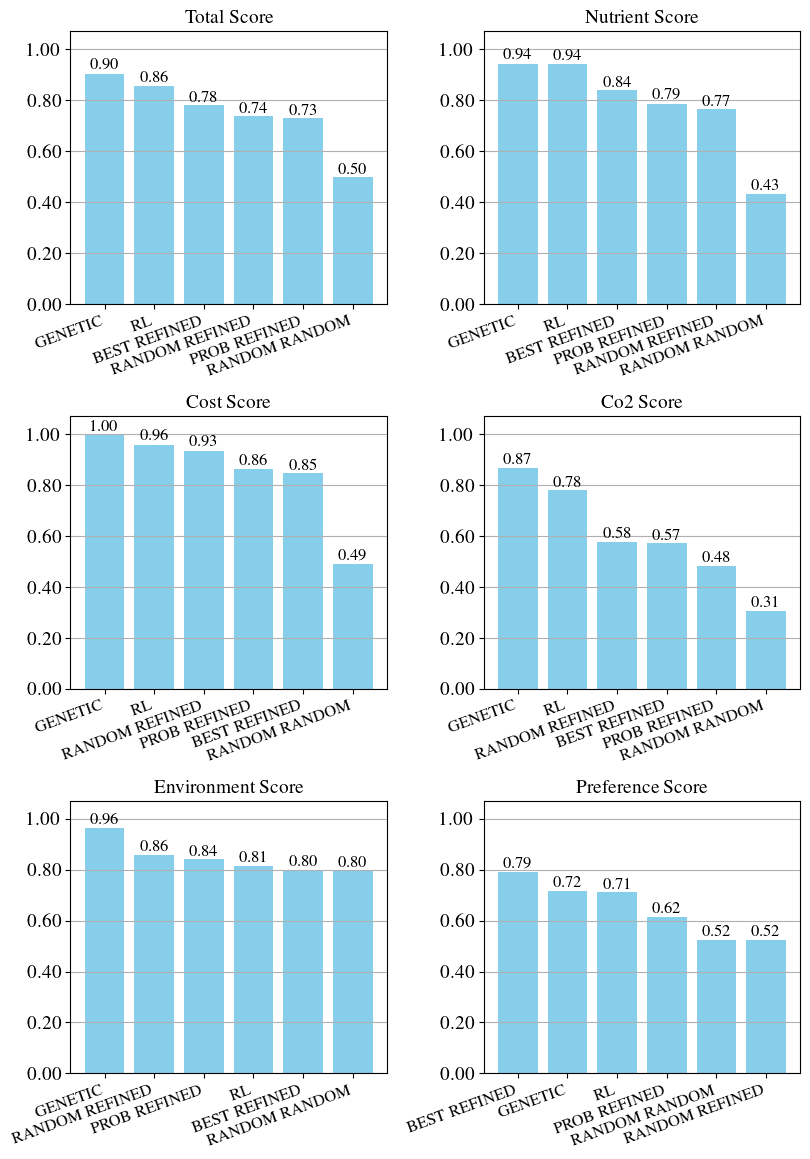

In [302]:
import matplotlib.pyplot as plt
import numpy as np

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

# Assuming the `key_averages` dictionary is already calculated as provided
# Define the score metrics
score_metrics = ['reward', 'nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']

# Number of keys (used to determine the x-ticks)
keys = list(key_averages.keys())
num_keys = len(keys)

# Create subplots for each metric
fig, axs = plt.subplots(3, 2, figsize=(8.27, 11.69))  # A4 page size in inches
axs = axs.flatten()

for i, metric in enumerate(score_metrics):
    ax = axs[i]
    averages = [key_averages[key][metric] for key in keys]
    
    # Sort keys and averages based on the averages in descending order
    sorted_keys_averages = sorted(zip(keys, averages), key=lambda x: x[1], reverse=True)
    sorted_keys, sorted_averages = zip(*sorted_keys_averages)
    shortened_keys = [key.replace('_', ' ').upper()[:20] for key in sorted_keys]
    
    # Bar chart for the current metric
    bars = ax.bar(sorted_keys, sorted_averages, color='skyblue')
    
    if metric != 'reward':
        ax.set_title(metric.replace("_", " ").title(), fontsize=14)
    else:
        ax.set_title(f'Total Score', fontsize=14)
    
    ax.set_xticks(np.arange(len(sorted_keys)))  # Set x-tick positions
    ax.set_xticklabels(shortened_keys, rotation=20, ha='right', fontsize=12)  # Set x-tick label font size
    ax.tick_params(axis='y', labelsize=14)  # Set y-tick label font size
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Format y-ticks to 2 decimal places
    ax.grid(True, axis='y')
    
    ax.set_ylim(0, 1.07)

    # Add text labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=12)

# Hide the last subplot if there are fewer than 6 metrics
if len(score_metrics) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a separate bar chart for 'time_taken'
fig_time, ax_time = plt.subplots(figsize=(8, 4))  # A4 width, half height
time_averages = [key_averages[key]['time_taken'] / 60 for key in keys]  # Convert seconds to minutes

# Sort keys and time_taken based on the values in descending order
sorted_keys_time = sorted(zip(keys, time_averages), key=lambda x: x[1], reverse=True)
sorted_keys, sorted_time = zip(*sorted_keys_time)

shortened_keys = [key.replace('_', ' ').upper()[:20] for key in sorted_keys]

# Create the bar chart
bars = ax_time.bar(sorted_keys, sorted_time, color='skyblue')

# Set the y-axis label to "Average Time (minutes)"
ax_time.set_ylabel('Average Time (min)', fontsize=14)

# Set x-ticks and labels
ax_time.set_xticks(np.arange(len(sorted_keys)))  # Set x-tick positions
ax_time.set_xticklabels(shortened_keys, rotation=15, ha='right', fontsize=14)  # Set x-tick label font size
ax_time.tick_params(axis='y', labelsize=14)  # Set y-tick label font size
ax_time.grid(True, axis='y')

# Add text labels on top of each bar, showing the time in minutes to two decimal places
for bar in bars:
    height = bar.get_height()
    ax_time.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom', fontsize=13)

ax_time.set_ylim(0, 1.07 * max(sorted_time))  # Set the y-axis
# Adjust layout and show the plot
fig_time.tight_layout()
plt.show()


In [ ]:
import numpy as np

average_across_runs = {}

for metric in ['reward', 'nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']:
    # Initialize the dictionary for each metric
    if metric not in average_across_runs:
        average_across_runs[metric] = {}

    for method in ['RL', 'genetic', 'random_random', 'random_refined', 'prob_refined', 'best_refined']:
        average = {}
        
        for i in range(10):
            average[str(i)] = []
            
        for index in range(len(load_data())):
            for i in range(10):
                if metric != 'reward':
                    average[str(i)].append(data[index][str(i)][method]['info']['reward'][metric])
                else:
                    average[str(i)].append(data[index][str(i)][method]['reward'])

        for index, val in average.items():
            if method not in average_across_runs[metric]:
                average_across_runs[metric][method] = {}
            average_across_runs[metric][method][index] = np.mean(val)
        
# Printing the final dictionary
print(average_across_runs)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

metrics = ['reward', 'nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']
methods = ['RL', 'genetic', 'random_random', 'random_refined', 'prob_refined', 'best_refined']

# Define academic colors (using a colormap for differentiation)
# colors = cm.tab10.colors
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Set font sizes
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 14

# Create subplots with more square-like dimensions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8.3, 12))  # Adjusted to make figures more square

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through metrics and plot without markers
for ax, metric in zip(axes, metrics):
    for i, method in enumerate(methods):
        if method in average_across_runs[metric]:
            x = list(map(int, average_across_runs[metric][method].keys()))  # Convert the keys to integers for x-axis
            y = list(average_across_runs[metric][method].values())          # Get the corresponding average rewards for y-axis
            
            ax.plot(x, y, color=colors[i], label=method)  # Plot each method with a different line and color
            ax.set_ylim(0, 1.05)  
    ax.grid(True, axis = 'y')
    
    # Set titles and labels with specified font sizes
    title = metric.replace('_', ' ').title()
    if 'Reward' in title:
        title = 'Total Score'
        
    ylabel = 'Score'
    ax.set_title(f'{title}', fontsize=title_fontsize)
    ax.set_xlabel('Meal Plan Number', fontsize=label_fontsize)
    
    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Remove individual legends and create a single legend higher up
handles, labels = ax.get_legend_handles_labels()
shortened_labels = [key.replace('_', ' ').upper()[:20] for key in labels]
fig.legend(handles, shortened_labels, loc='lower center', fontsize=14, ncol=3, bbox_to_anchor=(0.5, .03))

# Adjust layout to fit nicely on A4
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Display the plot
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from utils.process_data import get_data
# from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
# from models.preferences.prediction import PreferenceModel
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.pipeline import Pipeline
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

# import os
# from utils.process_data import get_data
# from models.preferences.preference_utils import print_preference_difference_and_accuracy
# from models.preferences.preference_utils import get_child_data, initialize_child_preference_data

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier

# models = [
#     "MLP Classifier"
# ]

# # Define scorers with `average='macro'` set only for the appropriate metrics
# scorers = {
# 'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
# 'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
# 'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
# 'accuracy': make_scorer(accuracy_score)  # No `average` parameter here
# }

# child_feature_data = get_child_data()
# ingredient_df = get_data("data.csv")

# # Initial prediction of preferences
# file_path = os.path.join('', "preferences_visualization.png")



# # Assuming all imports and other necessary function definitions have been done as in the provided code.
# import random
# def evaluate_models():
#     # Evaluate models using cross-validation
#     results = []
    
#     for iter in range(10):
#         for split in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
#             initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = split, seed=random.randint(0, 1e36), plot_graphs=False)
#             for name in models:
#                 predictor = PreferenceModel(
#                     ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, file_path=file_path, seed=None
#                 )
#                 updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
#                 accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)
#                 del updated_preferences
#                 # Calculate accuracy
#                 accuracy = accuracy_score(true_labels, predicted_labels)

#                 # # Print the model, accuracy, and iteration
#                 # print(f"Iteration: {iter + 1}, Model: {name}, Accuracy: {accuracy:.4f}, Total Accuracy: {accuracy_total:.4f}")

#                 # # Loop over each scorer
#                 # for scorer_name, scorer in scorers.items():
#                 #     # Calculate the score using the scorer
#                 #     if scorer_name in ['precision_macro', 'recall_macro', 'f1_macro']:
#                 #         score = scorer._score_func(true_labels, predicted_labels, average='macro')
#                 #     else:
#                 #         score = scorer._score_func(true_labels, predicted_labels)
                    
#                 results.append({
#                     "Iteration": iter,
#                     "Split": split,
#                     "Model": name,
#                     "Metric": 'accuracy',
#                     "Score": accuracy_total
#                 })

#     # Convert results to DataFrame for easy comparison
#     results_df = pd.DataFrame(results)
    
#     return results_df


# def get_ranked_models(results_df):
#     # Rank models for each metric
#     ranked_results = results_df.copy()
#     ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

#     # Convert results to DataFrame for easy comparison
#     results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

#     print(results_df_sorted)
#     return results_df_sorted


# # Example usage:

# results_df = evaluate_models()
# sorted_results_df = get_ranked_models(results_df)

    

In [ ]:
# grouped = sorted_results_df.groupby(['Model', 'Split', 'Metric']).agg({'Score': ['mean', 'std', 'count']}).reset_index()


# # Sort by the mean score (descending) to find the best model
# grouped_avg = grouped.sort_values(by=('Score', 'mean'), ascending=False)


# # Display the top 10 models
# top_10_models = grouped_avg.head(20)

# # Display the results
# print(top_10_models)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Configure Matplotlib to use LaTeX for rendering
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",  # Use serif font in conjunction with LaTeX
#     "text.latex.preamble": r"\usepackage{times}",
# })

# # Assuming `models`, `grouped` DataFrame, and colors are defined
# colors = ['red', 'red', 'gray', 'magenta']
# model_colors = {model: colors[i % len(colors)] for i, model in enumerate(models)}

# # Plotting the data
# plt.figure(figsize=(10, 4))
# for model in models:
#     filtered1 = grouped[grouped['Model'] == model]  # Filter data for the model
#     model_data = filtered1[filtered1['Metric'] == 'accuracy']  # Filter data for the accuracy metric
    
#     # Sort data by Split to ensure lines connect properly
#     model_data = model_data.sort_values(by='Split')
    
#     # Plotting lines between points
#     plt.plot(model_data['Split'], model_data['Score']['mean'],
#              color=model_colors[model],
#              linestyle='-',  # Line style for connecting points
#              label=model)
    
#     # Plotting the scatter points with crosses
#     plt.scatter(model_data['Split'], model_data['Score']['mean'],
#                 color=model_colors[model],
#                 marker='x')  # Cross marker for scatter points
    
#     # Adding dotted lines to the plot and y-axis
#     for x, y in zip(model_data['Split'], model_data['Score']['mean']):
#         plt.plot([x, 0], [y, y], color='black', linestyle=':', alpha=0.5)  # Line to y-axis
#         plt.plot([x, x], [y, 0], color='black', linestyle=':', alpha=0.5)  # Vertical line to point

# # Adding labels and title with custom font size
# plt.xlabel(r'Training Split', fontsize=17)
# plt.ylabel(r'Accuracy', fontsize=17)
# plt.tick_params(axis='both', labelsize=15)

# # Adjust y-ticks to show values to two decimal places
# yticks = np.arange(0, 1.01, 0.05)  # Customize this range as needed

# # Creating a legend outside the plot, on the right
# plt.xlim([0, 0.85])
# plt.ylim([0.65, 1])

# plt.show()


# Exp3 

Successfully read 136 lines from the file. Loaded 135 ingredients.
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


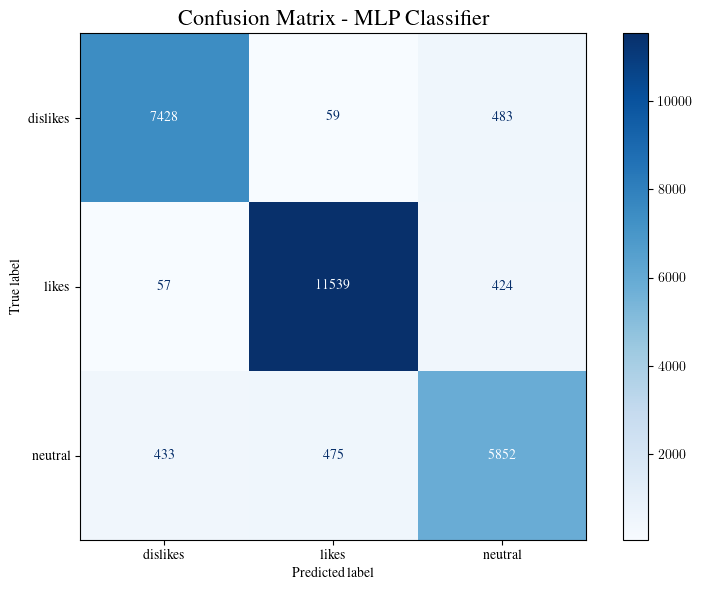

In [3]:


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data
from models.preferences.prediction import PreferenceModel
import random

# Initialize empty lists to accumulate true and predicted labels for MLP Classifier
mlp_true_labels = []
mlp_predicted_labels = []

# Get the data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")

# Run the loop 10 times
for i in range(10):
    print(f"Iteration {i+1}")
    
    # Reinitialize preferences
    initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=random.randint(0, 1e36), plot_graphs=False)
    
    # Initialize the predictor with the MLP Classifier
    predictor = PreferenceModel(
        ingredient_df, child_feature_data, initial_preference, model_name="MLP Classifier", visualize_data=False, file_path=None, seed=None
    )
    
    # Run the pipeline to get updated preferences, true_labels, and predicted_labels
    updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
    
    # Accumulate the true and predicted labels
    mlp_true_labels.extend(true_labels)
    mlp_predicted_labels.extend(predicted_labels)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(mlp_true_labels, mlp_predicted_labels)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the title
ax.set_title('Confusion Matrix - MLP Classifier', fontsize=16)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [18]:
list(label_encoder.classes_)

['dislikes', 'likes', 'neutral']

In [36]:
label_encoder._classes

AttributeError: 'LabelEncoder' object has no attribute '_classes'

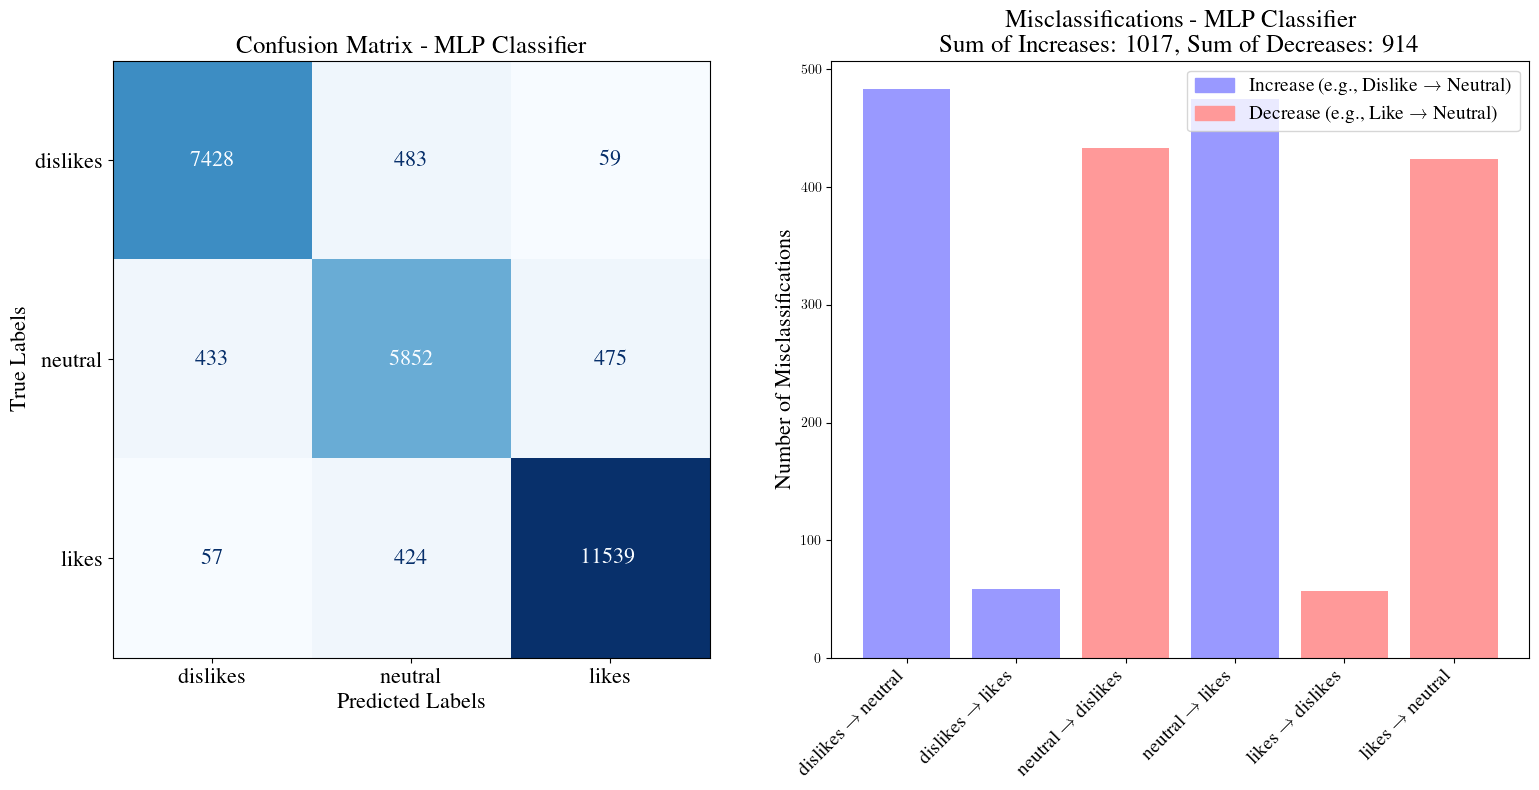

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Define the correct order of labels as they should appear
ordered_labels = ["dislikes", "neutral", "likes"]

# Initialize the label encoder and fit it to the correct order
label_encoder = LabelEncoder()
label_encoder.fit(ordered_labels)

# Transform the true and predicted labels using the label encoder
encoded_true_labels = label_encoder.inverse_transform(mlp_true_labels)
encoded_predicted_labels = label_encoder.inverse_transform(mlp_predicted_labels)

# Generate the confusion matrix with the specified order of labels
conf_matrix = confusion_matrix(encoded_true_labels, encoded_predicted_labels, labels=ordered_labels)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ordered_labels)

# Plotting the confusion matrix and misclassifications side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Increase figure size for better readability

# Plot the confusion matrix without the color bar and adjust font size
disp.plot(cmap=plt.cm.Blues, ax=ax[0], colorbar=False)
ax[0].set_title('Confusion Matrix - MLP Classifier', fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=16)  # Increase label font size
ax[0].set_xlabel('Predicted Labels', fontsize=16)
ax[0].set_ylabel('True Labels', fontsize=16)

# Increase the font size of the values inside the confusion matrix
for text in disp.text_.ravel():
    text.set_fontsize(16)

# Initialize lists to hold the misclassification information
misclassifications = []
increase_sum = 0  # Sum of increases
decrease_sum = 0  # Sum of decreases

# Iterate through the confusion matrix to gather misclassifications
for i, true_label in enumerate(ordered_labels):
    for j, pred_label in enumerate(ordered_labels):
        if i != j:  # We are only interested in misclassifications (off-diagonal elements)
            count = conf_matrix[i, j]
            if count > 0:
                misclassifications.append((true_label, pred_label, count))
                # Define increases and decreases based on label names
                if (true_label == "dislikes" and pred_label in ["neutral", "likes"]) or \
                   (true_label == "neutral" and pred_label == "likes"):
                    increase_sum += count
                elif (true_label == "likes" and pred_label in ["neutral", "dislikes"]) or \
                     (true_label == "neutral" and pred_label == "dislikes"):
                    decrease_sum += count

# Plotting the misclassifications with color highlighting for increases and decreases
colors = ['#9999ff' if (true_label == "dislikes" and pred_label in ["neutral", "likes"]) or 
                       (true_label == "neutral" and pred_label == "likes")
          else '#ff9999' 
          for true_label, pred_label, _ in misclassifications]

bars = ax[1].bar(
    [f"{true_label} → {pred_label}" for true_label, pred_label, _ in misclassifications],
    [count for _, _, count in misclassifications],
    color=colors
)

# Add labels, title, and customize x-axis for the misclassification plot
ax[1].set_ylabel('Number of Misclassifications', fontsize=16)
ax[1].set_title(f'Misclassifications - MLP Classifier\nSum of Increases: {increase_sum}, Sum of Decreases: {decrease_sum}', fontsize=18)
ax[1].set_xticks(range(len(misclassifications)))
ax[1].set_xticklabels([f"{true_label} → {pred_label}" for true_label, pred_label, _ in misclassifications], rotation=45, ha='right', fontsize=14)

# Create a custom legend
increase_patch = plt.Rectangle((0, 0), 1, 1, color='#9999ff', label='Increase (e.g., Dislike → Neutral)')
decrease_patch = plt.Rectangle((0, 0), 1, 1, color='#ff9999', label='Decrease (e.g., Like → Neutral)')
ax[1].legend(handles=[increase_patch, decrease_patch], fontsize=14)

# Ensure both plots have the same width by adjusting the layout
plt.tight_layout()
plt.show()


In [24]:
import os
import json

# Define the folder path
folder_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp3/menu_util'

# Initialize an empty dictionary to store data
data_1 = {}

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and load the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
            
            # Use the filename (without .json) as the key
            dict_key = os.path.splitext(filename)[0]
            
            # Store the data in the dictionary
            data_1[dict_key] = data

# Now data_1 contains all the JSON data with filenames as keys
keys = list(data_1.keys())

print(keys)

# Initialize the main dictionary to store data by method and split_ratio
data_dict = {}

for key in keys:
    strings = key.split("_")
    try:
        # Attempt to extract the 6th element (index 5)
        extracted_value_split = strings[6]
        
        # Try to convert the extracted value to a float
        split_ratio = float(extracted_value_split)
    
    except (ValueError, IndexError):
        try:
            # Attempt to extract the 7th element (index 6)
            extracted_value_split = strings[7]
            
            # Try to convert the extracted value to a float
            split_ratio = float(extracted_value_split)
            
        except (ValueError, IndexError):
            print(f"Could not extract a valid float value from key: {key}")
            continue  # Skip to the next iteration if extraction fails

    method = strings[4]
    
    # Handle the special case where both method strings are 'random'
    if strings[5] == 'random' and strings[4] == 'random':
        method = 'random_random'
    
    # Ensure the method exists in data_dict
    if method not in data_dict:
        data_dict[method] = {}
    
    # Store the data under the method and split_ratio
    data_dict[method][split_ratio] = data_1[key]


['menu_utilities_simple_generator_random_refined_split_1_seed_568026', 'menu_utilities_simple_generator_genetic_split_1_seed_568026', 'menu_utilities_simple_generator_RL_split_0.15_seed_568026', 'menu_utilities_simple_generator_random_random_split_1_seed_568026', 'menu_utilities_simple_generator_RL_split_0.3_seed_568026', 'menu_utilities_simple_generator_RL_split_1_seed_568026', 'menu_utilities_simple_generator_RL_split_0.05_seed_568026', 'menu_utilities_simple_generator_random_refined_split_0.3_seed_568026', 'menu_utilities_simple_generator_random_refined_split_0.05_seed_568026', 'menu_utilities_simple_generator_genetic_split_0.05_seed_568026', 'menu_utilities_simple_generator_random_random_split_0.05_seed_568026', 'menu_utilities_simple_generator_random_random_split_0.3_seed_568026', 'menu_utilities_simple_generator_random_refined_split_0.15_seed_568026', 'menu_utilities_simple_generator_genetic_split_0.15_seed_568026', 'menu_utilities_simple_generator_random_random_split_0.15_seed_5

In [285]:
data_dict.keys()

dict_keys(['random', 'genetic', 'RL', 'random_random'])

In [25]:
import numpy as np

for method in data_dict.keys():
    for split_ratio in data_dict[method].keys():

        # Initialize the dictionary outside the loop to accumulate results
        day_utility_sums = {day: [] for day in range(1, 6)}

        # Assuming data_dict has the expected structure from the previous code:
        for iteration in range(10):
            for day in range(1, 6):
                # Assuming index and i are defined somewhere in your code
                i = day    # Replace with actual logic if different
                
                predicted_utility = data_dict[method][split_ratio][iteration]['predicted_utility'][str(i)].values()
                
                # Calculate the sum of predicted utility for the current day
                day_sum = np.sum(list(predicted_utility))
                
                # Append the sum to the list corresponding to the current day
                day_utility_sums[day].append(day_sum)
                

        # Initialize a dictionary to store the average utility for each day
        average_utility_per_day = {}

        # Calculate the average utility for each day across all iterations
        for day in day_utility_sums.keys():
            if day_utility_sums[day]:  # Check if there are values to average
                average_utility_per_day[day] = np.mean(day_utility_sums[day])
            else:
                average_utility_per_day[day] = None  # Handle cases where no data was found

        # Print the average utility per day across all iterations
        print(average_utility_per_day)


{1: 227.6, 2: 101.2, 3: 370.5, 4: 146.6, 5: 183.3}
{1: 256.0, 2: 81.5, 3: 322.3, 4: 132.4, 5: 244.8}
{1: 296.0, 2: 142.2, 3: 332.4, 4: 225.7, 5: 296.8}
{1: 189.0, 2: 98.2, 3: 369.8, 4: 84.8, 5: 271.0}
{1: 608.0, 2: 487.1, 3: 414.2, 4: 433.4, 5: 370.0}
{1: 629.2, 2: 539.6, 3: 523.9, 4: 417.5, 5: 378.4}
{1: 611.5, 2: 552.1, 3: 457.5, 4: 390.4, 5: 356.7}
{1: 606.5, 2: 507.9, 3: 458.5, 4: 381.6, 5: 355.0}
{1: 557.0, 2: 455.1, 3: 377.6, 4: 393.1, 5: 348.1}
{1: 470.6, 2: 383.6, 3: 432.4, 4: 403.5, 5: 429.9}
{1: 452.1, 2: 454.3, 3: 438.9, 4: 365.5, 5: 352.8}
{1: 558.1, 2: 462.6, 3: 414.5, 4: 444.7, 5: 404.5}
{1: 227.6, 2: 101.2, 3: 370.5, 4: 146.6, 5: 183.3}
{1: 296.0, 2: 142.2, 3: 332.4, 4: 225.7, 5: 296.8}
{1: 256.0, 2: 81.5, 3: 322.3, 4: 132.4, 5: 244.8}
{1: 189.0, 2: 98.2, 3: 369.8, 4: 84.8, 5: 271.0}


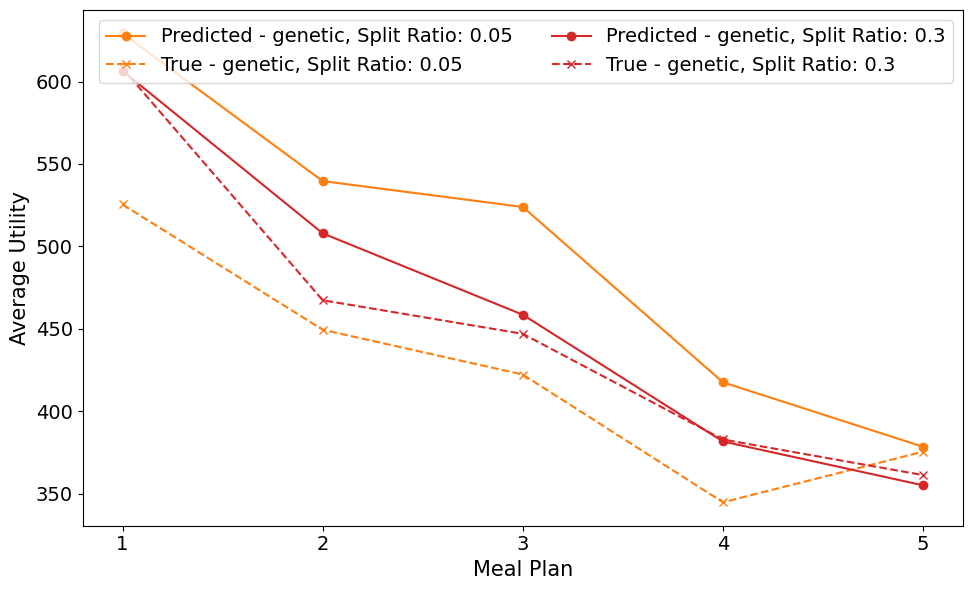

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['RL', 'random', 'random_random']:
        continue

    # Create a color cycle for split ratios
    color_cycle = plt.cm.tab10.colors  # This provides a set of 10 distinct colors

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):
        
        if split_ratio not in [0.05, 0.3]:
            continue
        # Initialize the dictionaries to accumulate results
        day_predicted_utility_sums = {day: [] for day in range(1, 6)}
        day_true_utility_sums = {day: [] for day in range(1, 6)}

        # Iterate through iterations and days
        for iteration in range(10):
            for day in range(1, 6):

                # Extract and sum the predicted utility
                predicted_utility = data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)].values()
                predicted_day_sum = np.sum(list(predicted_utility))
                day_predicted_utility_sums[day].append(predicted_day_sum)
                
                # Extract and sum the true utility
                true_utility = data_dict[method][split_ratio][iteration]['true_utility'][str(day)].values()
                true_day_sum = np.sum(list(true_utility))
                day_true_utility_sums[day].append(true_day_sum)


        # Initialize lists to store the average utilities per day
        average_predicted_utility_per_day = []
        average_true_utility_per_day = []

        # Calculate the average predicted and true utilities for each day across all iterations
        for day in sorted(day_predicted_utility_sums.keys()):
            if day_predicted_utility_sums[day]:
                average_predicted_utility_per_day.append(np.mean(day_predicted_utility_sums[day]))
            else:
                average_predicted_utility_per_day.append(None)
                
            if day_true_utility_sums[day]:
                average_true_utility_per_day.append(np.mean(day_true_utility_sums[day]))
            else:
                average_true_utility_per_day.append(None)

        # Assign color based on the split ratio index
        color = color_cycle[split_ratio_index % len(color_cycle)]

        # Plotting the predicted utility curve with solid line
        plt.plot(range(1, 6), average_predicted_utility_per_day, marker='o', linestyle='-', color=color, label=f'Predicted - {method}, Split Ratio: {split_ratio}')
        
        # Plotting the true utility curve with dashed line
        plt.plot(range(1, 6), average_true_utility_per_day, marker='x', linestyle='--', color=color, label=f'True - {method}, Split Ratio: {split_ratio}')

# Final plot adjustments
plt.xlabel('Meal Plan', fontsize=15)
plt.ylabel('Average Utility', fontsize=15)

# Set x-ticks explicitly to 1, 2, 3, 4, 5
plt.xticks(ticks=[1, 2, 3, 4, 5], fontsize=14)
plt.yticks(fontsize=14)

# Set the figure size (make the plot larger but suitable for A4 report)
plt.gcf().set_size_inches(10, 6)  # Width, Height

# Place the legend on the plot with two columns
plt.legend(loc='upper right', ncol=2, fontsize=14, frameon=True)

# Adjust the layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()


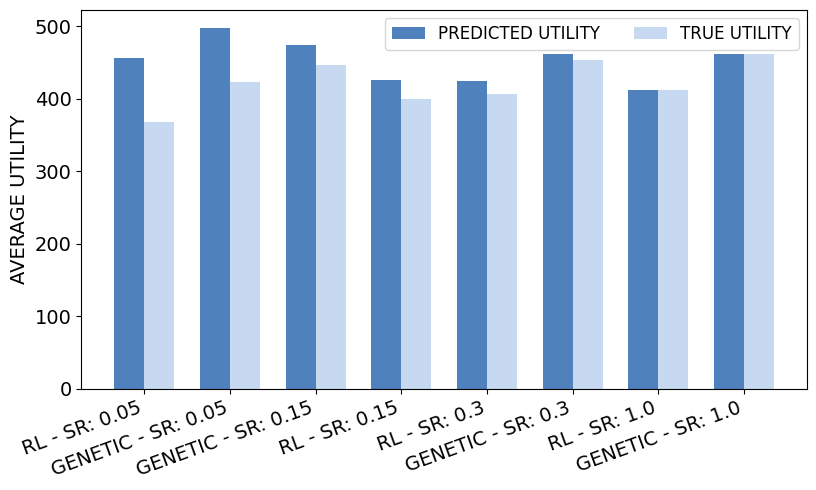

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the academic color palette: light blue and dark blue
colors = ['#4f81bd', '#c6d9f0']  # Dark blue and light blue

# Prepare data for bar chart
methods = []
split_ratios = []
average_predicted_utilities = []
average_true_utilities = []

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['random', 'random_random']:
        continue

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):

        # Initialize the dictionaries to accumulate results
        day_predicted_utility_sums = {day: [] for day in range(1, 6)}
        day_true_utility_sums = {day: [] for day in range(1, 6)}

        # Iterate through iterations and days
        for iteration in range(10):
            for day in range(1, 6):
                # Extract and sum the predicted utility
                predicted_utility = data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)].values()
                predicted_day_sum = np.sum(list(predicted_utility))
                day_predicted_utility_sums[day].append(predicted_day_sum)
                
                # Extract and sum the true utility
                true_utility = data_dict[method][split_ratio][iteration]['true_utility'][str(day)].values()
                true_day_sum = np.sum(list(true_utility))
                day_true_utility_sums[day].append(true_day_sum)
                    

        # Calculate the average predicted and true utilities across all 5 days
        avg_predicted_utility = np.mean([np.mean(day_predicted_utility_sums[day]) for day in range(1, 6) if day_predicted_utility_sums[day]])
        avg_true_utility = np.mean([np.mean(day_true_utility_sums[day]) for day in range(1, 6) if day_true_utility_sums[day]])

        # Store the results
        methods.append(method.upper())  # Capitalize the method names
        split_ratios.append(f"SR: {split_ratio}")  # Format split ratios with "SR: "
        average_predicted_utilities.append(avg_predicted_utility)
        average_true_utilities.append(avg_true_utility)

# Calculate the gap between predicted and true utilities and sort the data
gaps = np.abs(np.array(average_predicted_utilities) - np.array(average_true_utilities))
sorted_indices = np.argsort(gaps)[::-1]

methods = np.array(methods)[sorted_indices]
split_ratios = np.array(split_ratios)[sorted_indices]
average_predicted_utilities = np.array(average_predicted_utilities)[sorted_indices]
average_true_utilities = np.array(average_true_utilities)[sorted_indices]

# Plotting the bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(split_ratios))  # The label locations

fig, ax = plt.subplots(figsize=(8.27, 5))  # A4 size in inches: 8.27x11.69

# Plot bars for predicted and true utilities
bars_predicted = ax.bar(index, average_predicted_utilities, bar_width, label='PREDICTED UTILITY', color=colors[0])
bars_true = ax.bar(index + bar_width, average_true_utilities, bar_width, label='TRUE UTILITY', color=colors[1])

# Add labels, title, and legend
ax.set_ylabel('AVERAGE UTILITY', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticklabels([f'{m} - {sr}' for m, sr in zip(methods, split_ratios)], rotation=20, ha='right', fontsize=14)
ax.legend(fontsize=12, ncols=2)

# Adjust the layout to make space for the x-labels and legend
plt.tight_layout()

# Show the plot
plt.show()



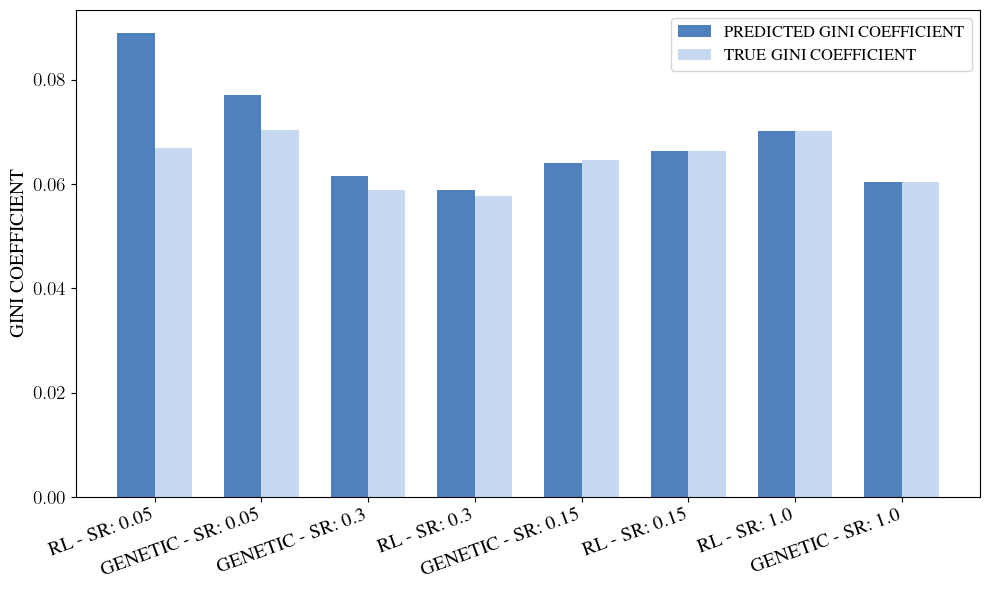

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

import numpy as np
import matplotlib.pyplot as plt

def normalize(values, min_value=-30, max_value=30, new_min=1, new_max=10):
    # Normalize the values to the range [new_min, new_max]
    normalized_values = [new_min + (new_max - new_min) * (x - min_value) / (max_value - min_value) for x in values]
    return normalized_values

def gini_coefficient(values):
    # Sort the values
    sorted_values = sorted(values)
    n = len(values)
    
    # Calculate the Gini coefficient using the formula
    cumulative_sum = np.cumsum(sorted_values)
    sum_of_values = cumulative_sum[-1]
    
    gini = (2 / n) * sum((i + 1) * sorted_values[i] for i in range(n)) / sum_of_values - (n + 1) / n
    
    return gini

# Prepare data for bar chart
methods = []
split_ratios = []
predicted_gini_coefficients = []
true_gini_coefficients = []

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['random', 'random_random']:
        continue

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):

        predicted_gini_per_day = []
        true_gini_per_day = []

        # Iterate through iterations and days
        for iteration in range(10):
            for day in range(1, 6):
                # Extract the predicted utility
                predicted_utility = list(data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)].values())
                # Extract the true utility
                true_utility = list(data_dict[method][split_ratio][iteration]['true_utility'][str(day)].values())

                # Calculate Gini coefficients for this day and iteration
                gini_predicted = gini_coefficient(normalize(predicted_utility))
                gini_true = gini_coefficient(normalize(true_utility))

                # Store these Gini coefficients
                predicted_gini_per_day.append(gini_predicted)
                true_gini_per_day.append(gini_true)

        # Calculate the average Gini coefficients over all iterations and days
        avg_gini_predicted = np.mean(predicted_gini_per_day)
        avg_gini_true = np.mean(true_gini_per_day)

        # Store the results
        methods.append(method.upper())  # Capitalize the method names
        split_ratios.append(f"SR: {split_ratio}")  # Format split ratios with "SR: "
        predicted_gini_coefficients.append(avg_gini_predicted)
        true_gini_coefficients.append(avg_gini_true)

# Convert lists to numpy arrays
methods = np.array(methods)
split_ratios = np.array(split_ratios)
predicted_gini_coefficients = np.array(predicted_gini_coefficients)
true_gini_coefficients = np.array(true_gini_coefficients)

# Calculate the absolute differences between predicted and true Gini coefficients
absolute_differences = np.abs(predicted_gini_coefficients - true_gini_coefficients)

# Sort the data based on the absolute differences
sorted_indices_by_gap = np.argsort(absolute_differences)[::-1]

# Reorder the arrays based on the sorted indices
methods = methods[sorted_indices_by_gap]
split_ratios = split_ratios[sorted_indices_by_gap]
predicted_gini_coefficients = predicted_gini_coefficients[sorted_indices_by_gap]
true_gini_coefficients = true_gini_coefficients[sorted_indices_by_gap]

# Plotting the bar chart for Gini coefficients
bar_width = 0.35  # Width of the bars
index = np.arange(len(split_ratios))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted size for better visualization

# Plot bars for predicted and true Gini coefficients
bars_predicted_gini = ax.bar(index, predicted_gini_coefficients, bar_width, label='PREDICTED GINI COEFFICIENT', color='#4f81bd')
bars_true_gini = ax.bar(index + bar_width, true_gini_coefficients, bar_width, label='TRUE GINI COEFFICIENT', color='#c6d9f0')

# Add labels, title, and legend
ax.set_ylabel('GINI COEFFICIENT', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticklabels([f'{m} - {sr}' for m, sr in zip(methods, split_ratios)], rotation=20, ha='right', fontsize=14)
ax.legend(fontsize=12, loc='upper right')

# Adjust the layout to make space for the x-labels and legend
plt.tight_layout()

# Show the plot
plt.show()



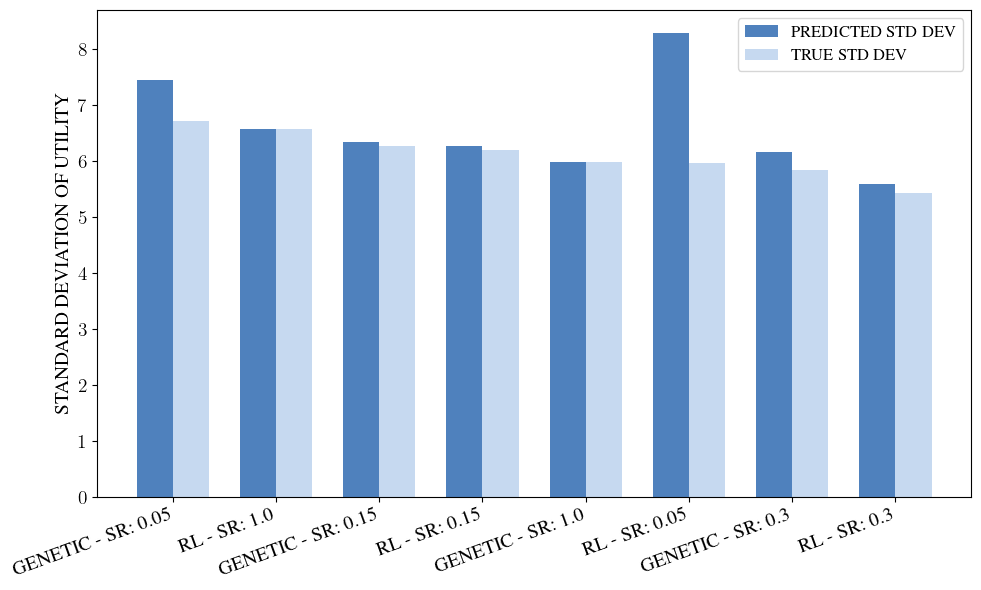

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def normalize(values, min_value=-30, max_value=30, new_min=1, new_max=10):
    # Normalize the values to the range [new_min, new_max]
    normalized_values = [new_min + (new_max - new_min) * (x - min_value) / (max_value - min_value) for x in values]
    return values

# Prepare data for bar chart
methods = []
split_ratios = []
predicted_std_devs = []
true_std_devs = []

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['random', 'random_random']:
        continue

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):

        predicted_std_per_day = []
        true_std_per_day = []

        # Iterate through iterations and days
        for iteration in range(10):
            for day in range(1, 6):
                # Extract the predicted utility
                predicted_utility = list(data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)].values())
                # Extract the true utility
                true_utility = list(data_dict[method][split_ratio][iteration]['true_utility'][str(day)].values())

                # Normalize the utility values
                normalized_predicted_utility = normalize(predicted_utility)
                normalized_true_utility = normalize(true_utility)

                # Calculate standard deviations for this day and iteration
                std_predicted = np.std(normalized_predicted_utility)
                std_true = np.std(normalized_true_utility)

                # Store these standard deviations
                predicted_std_per_day.append(std_predicted)
                true_std_per_day.append(std_true)

        # Calculate the average standard deviations over all iterations and days
        avg_std_predicted = np.mean(predicted_std_per_day)
        avg_std_true = np.mean(true_std_per_day)

        # Store the results
        methods.append(method.upper())  # Capitalize the method names
        split_ratios.append(f"SR: {split_ratio}")  # Format split ratios with "SR: "
        predicted_std_devs.append(avg_std_predicted)
        true_std_devs.append(avg_std_true)

# Convert lists to numpy arrays
methods = np.array(methods)
split_ratios = np.array(split_ratios)
predicted_std_devs = np.array(predicted_std_devs)
true_std_devs = np.array(true_std_devs)

# Sort the data based on the true standard deviations
sorted_indices_by_true_std = np.argsort(true_std_devs)[::-1]

# Reorder the arrays based on the sorted indices
methods = methods[sorted_indices_by_true_std]
split_ratios = split_ratios[sorted_indices_by_true_std]
predicted_std_devs = predicted_std_devs[sorted_indices_by_true_std]
true_std_devs = true_std_devs[sorted_indices_by_true_std]

# Plotting the bar chart for standard deviations
bar_width = 0.35  # Width of the bars
index = np.arange(len(split_ratios))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted size for better visualization

# Plot bars for predicted and true standard deviations
bars_predicted_std = ax.bar(index, predicted_std_devs, bar_width, label='PREDICTED STD DEV', color='#4f81bd')
bars_true_std = ax.bar(index + bar_width, true_std_devs, bar_width, label='TRUE STD DEV', color='#c6d9f0')

# Add labels, title, and legend
ax.set_ylabel('STANDARD DEVIATION OF UTILITY', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticklabels([f'{m} - {sr}' for m, sr in zip(methods, split_ratios)], rotation=20, ha='right', fontsize=14)
ax.legend(fontsize=12, loc='upper right')

# Adjust the layout to make space for the x-labels and legend
plt.tight_layout()

# Show the plot
plt.show()


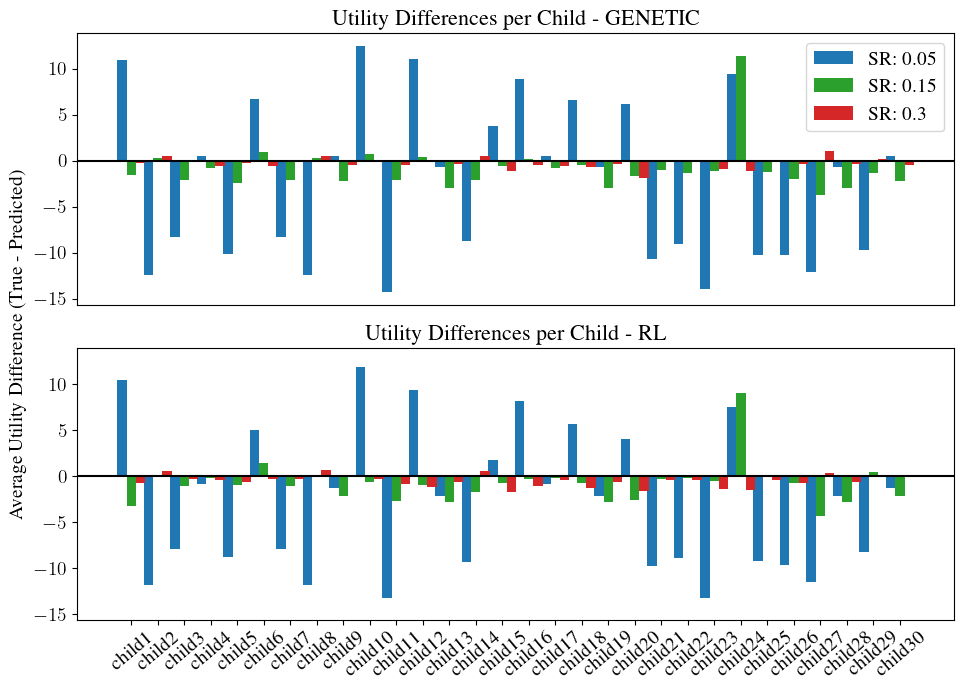

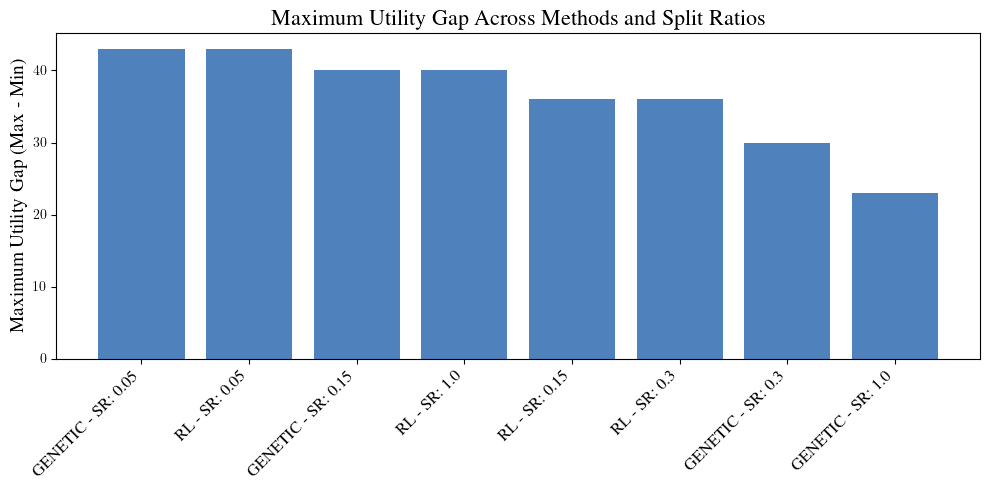

In [305]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data structures to store the utilities
children_ids = None
true_utilities_dict = {}
predicted_utilities_dict = {}

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['random', 'random_random']:
        continue

    true_utilities_dict[method] = {}
    predicted_utilities_dict[method] = {}

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):
        if split_ratio in [1.0]:
            continue
        true_utilities_dict[method][split_ratio] = {}
        predicted_utilities_dict[method][split_ratio] = {}

        # Initialize sums for true and predicted utilities
        for iteration in range(10):
            for day in range(1, 6):
                # Extract the child IDs
                if children_ids is None:
                    children_ids = list(data_dict[method][split_ratio][iteration]['true_utility'][str(day)].keys())

                # Aggregate utilities for each child
                for child_id in children_ids:
                    true_utility = data_dict[method][split_ratio][iteration]['true_utility'][str(day)].get(child_id, 0)
                    predicted_utility = data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)].get(child_id, 0)

                    if child_id not in true_utilities_dict[method][split_ratio]:
                        true_utilities_dict[method][split_ratio][child_id] = []
                        predicted_utilities_dict[method][split_ratio][child_id] = []

                    true_utilities_dict[method][split_ratio][child_id].append(true_utility)
                    predicted_utilities_dict[method][split_ratio][child_id].append(predicted_utility)

# Calculate the average utilities and the difference
average_differences = {method: {} for method in true_utilities_dict.keys()}

for method in true_utilities_dict.keys():
    for split_ratio in true_utilities_dict[method].keys():
        average_differences[method][split_ratio] = []

        for child_id in children_ids:
            true_avg = np.mean(true_utilities_dict[method][split_ratio][child_id])
            predicted_avg = np.mean(predicted_utilities_dict[method][split_ratio][child_id])
            difference = true_avg - predicted_avg

            average_differences[method][split_ratio].append(difference)

# Define a professional color map for split ratios
color_map = {
    '0.05': '#1f77b4',  # muted blue
    '0.15': '#2ca02c',  # muted green
    '0.3': '#d62728',  # muted red
    '1.0': '#7f7f7f'   # muted gray
}

# Set up the subplot
fig, axs = plt.subplots(len(average_differences), 1, figsize=(10, 7), sharey=True)
bar_width = 0.35

for ax, method in zip(axs, average_differences.keys()):
    split_ratios = sorted(average_differences[method].keys(), key=float)  # Sort split ratios numerically
    index = np.arange(len(children_ids))

    for i, split_ratio in enumerate(split_ratios):
        differences = average_differences[method][split_ratio]
        ax.bar(index + i * bar_width, differences, bar_width, label=f"SR: {split_ratio}", color=color_map[str(split_ratio)])

    # Add a horizontal line at y=0
    ax.axhline(0, color='black', linewidth=1.5, linestyle='-')

    # Turn off x-ticks for all but the last plot
    if ax != axs[-1]:
        ax.set_xticks([])
    else:
        ax.set_xticks(index + bar_width * (len(split_ratios) - 1) / 2)
        ax.set_xticklabels(children_ids, rotation=40, fontsize=14)
    
    ax.tick_params(axis='y', labelsize=14)  # Set y-tick label size
    
    ax.set_title(f'Utility Differences per Child - {method.upper()}', fontsize=16)

    if method == 'genetic':
        # Sort legend entries by split ratio value
        handles, labels = ax.get_legend_handles_labels()
        sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: float(x[1].split(": ")[1]))
        sorted_handles, sorted_labels = zip(*sorted_handles_labels)
        ax.legend(sorted_handles, sorted_labels, fontsize=14, loc='upper right')

# Add a common y-label to the entire figure
fig.text(0.05, 0.5, 'Average Utility Difference (True - Predicted)', va='center', ha='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.05, 0, 1, 1])  # Adjust the layout to make room for the common y-label
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Prepare data structures to store the utilities
children_ids = None
utilities_dict = {}

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['random', 'random_random']:
        continue

    utilities_dict[method] = {}

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):

        utilities_dict[method][split_ratio] = {}

        # Initialize sums for true and predicted utilities
        for iteration in range(10):
            for day in range(1, 6):
                # Extract the child IDs
                if children_ids is None:
                    children_ids = list(data_dict[method][split_ratio][iteration]['true_utility'][str(day)].keys())

                # Aggregate utilities for each child
                for child_id in children_ids:
                    true_utility = data_dict[method][split_ratio][iteration]['true_utility'][str(day)].get(child_id, 0)
                    predicted_utility = data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)].get(child_id, 0)

                    if child_id not in utilities_dict[method][split_ratio]:
                        utilities_dict[method][split_ratio][child_id] = []

                    utilities_dict[method][split_ratio][child_id].append(true_utility)
                    utilities_dict[method][split_ratio][child_id].append(predicted_utility)

# Calculate the maximum gap between min and max utility for each method and split ratio
max_gaps = {method: {} for method in utilities_dict.keys()}

for method in utilities_dict.keys():
    for split_ratio in utilities_dict[method].keys():
        max_gaps[method][split_ratio] = []

        for child_id in children_ids:
            min_utility = np.min(utilities_dict[method][split_ratio][child_id])
            max_utility = np.max(utilities_dict[method][split_ratio][child_id])
            gap = max_utility - min_utility

            max_gaps[method][split_ratio].append(gap)

# Calculate the maximum gap across all children for each method and split ratio
max_gap_summary = {method: {sr: max(gaps) for sr, gaps in sr_gaps.items()} for method, sr_gaps in max_gaps.items()}

# Flatten the data to sort and plot
flat_data = [(method, sr, gap) for method, sr_gaps in max_gap_summary.items() for sr, gap in sr_gaps.items()]
flat_data.sort(key=lambda x: x[2], reverse=True)

# Plot the maximum gaps ordered from highest to lowest
plt.figure(figsize=(10, 5))

methods_srs = [f'{item[0].upper()} - SR: {item[1]}' for item in flat_data]
max_gap_values = [item[2] for item in flat_data]

plt.bar(methods_srs, max_gap_values, color='#4f81bd')

plt.ylabel('Maximum Utility Gap (Max - Min)', fontsize=14)
plt.title('Maximum Utility Gap Across Methods and Split Ratios', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()



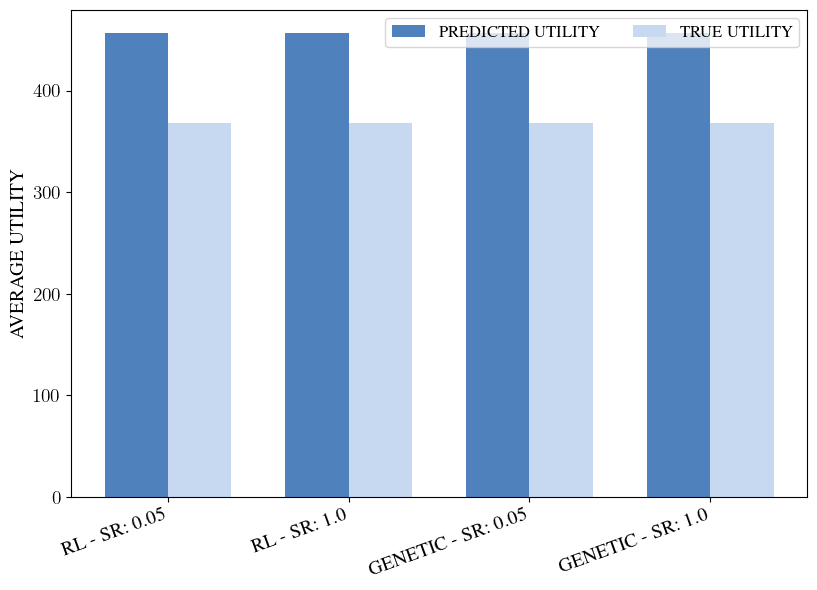

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the academic color palette: light blue and dark blue
colors = ['#4f81bd', '#c6d9f0']  # Dark blue and light blue

# Prepare data for bar chart
methods = []
split_ratios = []
average_predicted_utilities = []
average_true_utilities = []

# Loop through each method
for method_index, method in enumerate(data_dict.keys()):
    if method in ['random', 'random_random']:
        continue

    for split_ratio_index, split_ratio in enumerate(data_dict[method].keys()):
        
        if split_ratio not in [0.05, 1]:
            continue

        # Iterate through iterations and days
        for iteration in range(10):
            for day in range(1, 6):
                # Extract and sum the predicted utility
                predicted_utility = data_dict[method][split_ratio][iteration]['predicted_utility'][str(day)]
                # Extract and sum the true utility
                true_utility = data_dict[method][split_ratio][iteration]['true_utility'][str(day)]
                    

        # Store the results
        methods.append(method.upper())  # Capitalize the method names
        split_ratios.append(f"SR: {split_ratio}")  # Format split ratios with "SR: "
        average_predicted_utilities.append(avg_predicted_utility)
        average_true_utilities.append(avg_true_utility)

# Calculate the gap between predicted and true utilities and sort the data
gaps = np.abs(np.array(average_predicted_utilities) - np.array(average_true_utilities))
sorted_indices = np.argsort(gaps)[::-1]

methods = np.array(methods)[sorted_indices]
split_ratios = np.array(split_ratios)[sorted_indices]
average_predicted_utilities = np.array(average_predicted_utilities)[sorted_indices]
average_true_utilities = np.array(average_true_utilities)[sorted_indices]

# Plotting the bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(split_ratios))  # The label locations

fig, ax = plt.subplots(figsize=(8.27, 6))  # A4 size in inches: 8.27x11.69

# Plot bars for predicted and true utilities
bars_predicted = ax.bar(index, average_predicted_utilities, bar_width, label='PREDICTED UTILITY', color=colors[0])
bars_true = ax.bar(index + bar_width, average_true_utilities, bar_width, label='TRUE UTILITY', color=colors[1])

# Add labels, title, and legend
ax.set_ylabel('AVERAGE UTILITY', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticklabels([f'{m} - {sr}' for m, sr in zip(methods, split_ratios)], rotation=20, ha='right', fontsize=14)
ax.legend(fontsize=12, ncols=2)

# Adjust the layout to make space for the x-labels and legend
plt.tight_layout()

# Show the plot
plt.show()


In [296]:
import os
import json

def load_exp3():
    # Define the folder path
    file_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp3/all_results.json'

    # Initialize an empty dictionary to store data
    data_dict = {}

    # Open and load the JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data
    


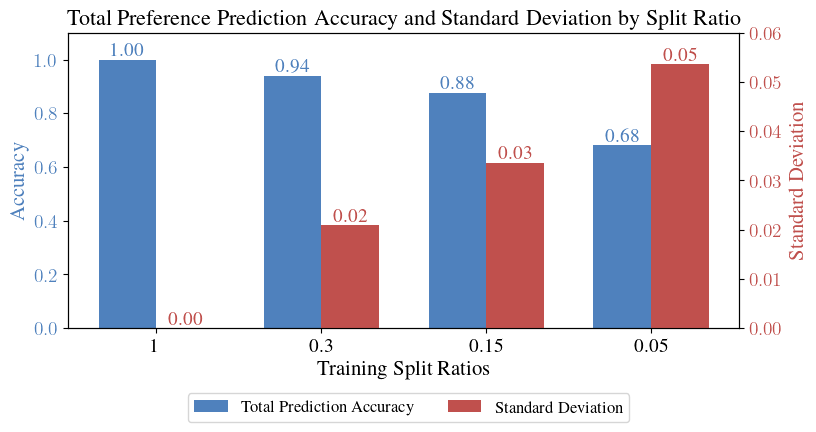

In [298]:
import matplotlib.pyplot as plt
import numpy as np
data = load_exp3()
# Initialize lists to store total prediction accuracies and standard deviations
total_accuracies = []
std_devs = []
splits = ['1', '0.3', '0.15', '0.05']

# Extract the data from the dictionary
for split in splits:
    accuracy_sum = 0
    std_sum = 0
    for index in range(10):
        accuracy_sum += data[index][split]['prediction_accuracies_std_total'][0]
        std_sum += data[index][split]['prediction_accuracies_std_total'][1]
    # Calculate the average over the 10 iterations
    total_accuracies.append(accuracy_sum / 10)
    std_devs.append(std_sum / 10)

# Define the x locations for the groups
x = np.arange(len(splits))

# Define the width of the bars
width = 0.35

# Create the figure and axis with twin y-axes
fig, ax1 = plt.subplots(figsize=(8.27, 4))  # A4 size in inches: 8.27 x 11.69

# Plot Total Prediction Accuracy on the left y-axis
bars1 = ax1.bar(x - width/2, total_accuracies, width, label='Total Prediction Accuracy', color="#4f81bd")
ax1.set_xlabel('Training Split Ratios', fontsize=15)
ax1.set_ylabel('Accuracy', fontsize=15, color="#4f81bd")
ax1.tick_params(axis='y', labelcolor="#4f81bd", labelsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(splits, fontsize=14)
ax1.set_title('Total Preference Prediction Accuracy and Standard Deviation by Split Ratio', fontsize=16)
# Add text labels on the Total Prediction Accuracy bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14, color="#4f81bd")

# Create a second y-axis for Standard Deviation
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, std_devs, width, label='Standard Deviation', color="#c0504d")
ax2.set_ylabel('Standard Deviation', fontsize=15, color="#c0504d")
ax2.tick_params(axis='y', labelcolor="#c0504d", labelsize=14)

# Add text labels on the Standard Deviation bars
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14, color="#c0504d")

ax2.set_ylim(0, 0.06)  # Set the y-axis limit for Standard Deviation
ax1.set_ylim(0, 1.1)  # Set the y-axis limit for Accuracy

# Add a legend to the plot, centered at the bottom
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.09), ncol=2, fontsize=12)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


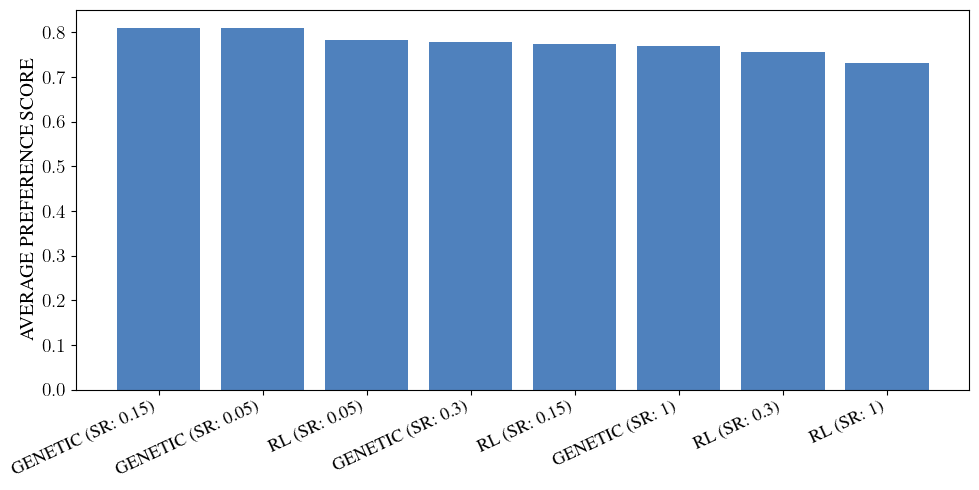

In [310]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store total rewards across all days and counts
total_rewards = {method: {split: 0 for split in ['1', '0.3', '0.15', '0.05']} for method in ['RL', 'genetic', 'random_random']}
meal_counts = {method: {split: 0 for split in ['1', '0.3', '0.15', '0.05']} for method in ['RL', 'genetic', 'random_random']}

# Aggregate the reward data across all indices and days
for index in range(10):
    for method in ['RL', 'genetic']:
        for split in ['1', '0.3', '0.15', '0.05']:
            for meal in range(0, 5):
                # Sum rewards for the current meal
                score = data[index][split][method][str(meal)]['info']['preference_score']
                total_rewards[method][split] += score
                meal_counts[method][split] += 1

# Compute the average reward across all days and indices
average_rewards = []
labels = []
for method in ['RL', 'genetic', 'random_random']:
    for split in ['1', '0.3', '0.15', '0.05']:
        if meal_counts[method][split] > 0:
            average_reward = total_rewards[method][split] / meal_counts[method][split]
            average_rewards.append(average_reward)
            labels.append(f'{method.upper()} (SR: {split})')

# Sort the average rewards and corresponding labels
sorted_indices = np.argsort(average_rewards)[::-1]
average_rewards_sorted = np.array(average_rewards)[sorted_indices]
labels_sorted = np.array(labels)[sorted_indices]

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(labels_sorted, average_rewards_sorted, color="#4f81bd")
plt.yticks(fontsize=14)
plt.ylabel('AVERAGE PREFERENCE SCORE', fontsize=14)
plt.xticks(rotation=25, ha='right', fontsize=13)
plt.tight_layout()

# Show the plot
plt.show()


# Exp 2

In [254]:
import os
import json

# Define the folder path
file_path = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp2/all_results.json"

# Initialize an empty dictionary to store data
data_dict = {}

# Open and load the JSON file
with open(file_path, 'r') as f:
    data = json.load(f)
    
    


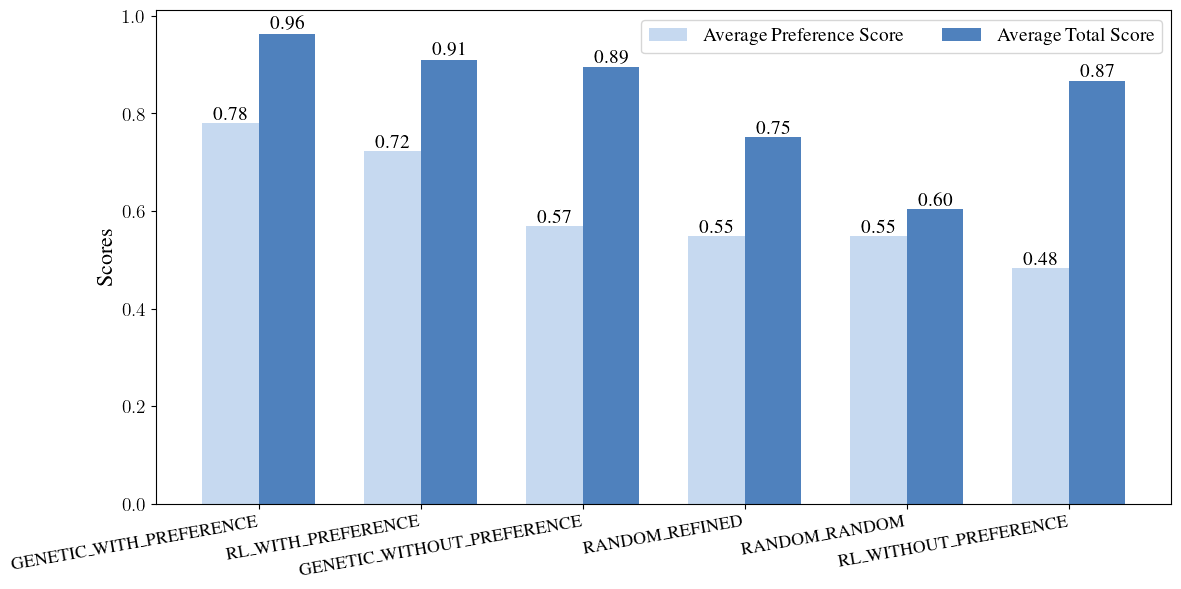

In [255]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['random_random', 'random_refined', 'genetic_with_preference', 'genetic_without_preference', 'RL_with_preference', 'RL_without_preference']

# Initialize dictionaries to store total rewards and total preference scores across all days and counts
total_rewards = {method: 0 for method in methods}
total_scores = {method: 0 for method in methods}
meal_counts = {method: 0 for method in methods}

# Aggregate the reward and preference score data across all indices and days
for index in range(10):
    for method in methods:
        for meal in range(5):
            # Sum rewards and preference scores for the current meal
            score = data[index][method][str(meal)]['info']['preference_score']
            reward = data[index][method][str(meal)]['reward']
            total_scores[method] += score
            total_rewards[method] += reward
            meal_counts[method] += 1

# Compute the average rewards and preference scores across all days and indices
average_rewards = []
average_scores = []
labels = []
for method in methods:
    if meal_counts[method] > 0:
        average_reward = total_rewards[method] / meal_counts[method]
        average_score = total_scores[method] / meal_counts[method]
        average_rewards.append(average_reward)
        average_scores.append(average_score)
        labels.append(f'{method.upper()}')

# Convert lists to numpy arrays for easier manipulation
average_rewards = np.array(average_rewards)
average_scores = np.array(average_scores)

# Sort the methods by average preference score
sorted_indices = np.argsort(average_scores)[::-1]
average_rewards_sorted = average_rewards[sorted_indices]
average_scores_sorted = average_scores[sorted_indices]
labels_sorted = np.array(labels)[sorted_indices]

# Plot the results
x = np.arange(len(labels_sorted))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, average_scores_sorted, width, label='Average Preference Score', color='#c6d9f0')
bars2 = plt.bar(x + width/2, average_rewards_sorted, width, label='Average Total Score', color="#4f81bd")

# Add values on top of each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14)


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Scores', fontsize=16)
# plt.title('Average Preference Score and Reward by Method', fontsize=16)
plt.xticks(x, labels_sorted, rotation=10, ha='right', fontsize=13)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, ncol = 2)

plt.tight_layout()
plt.show()


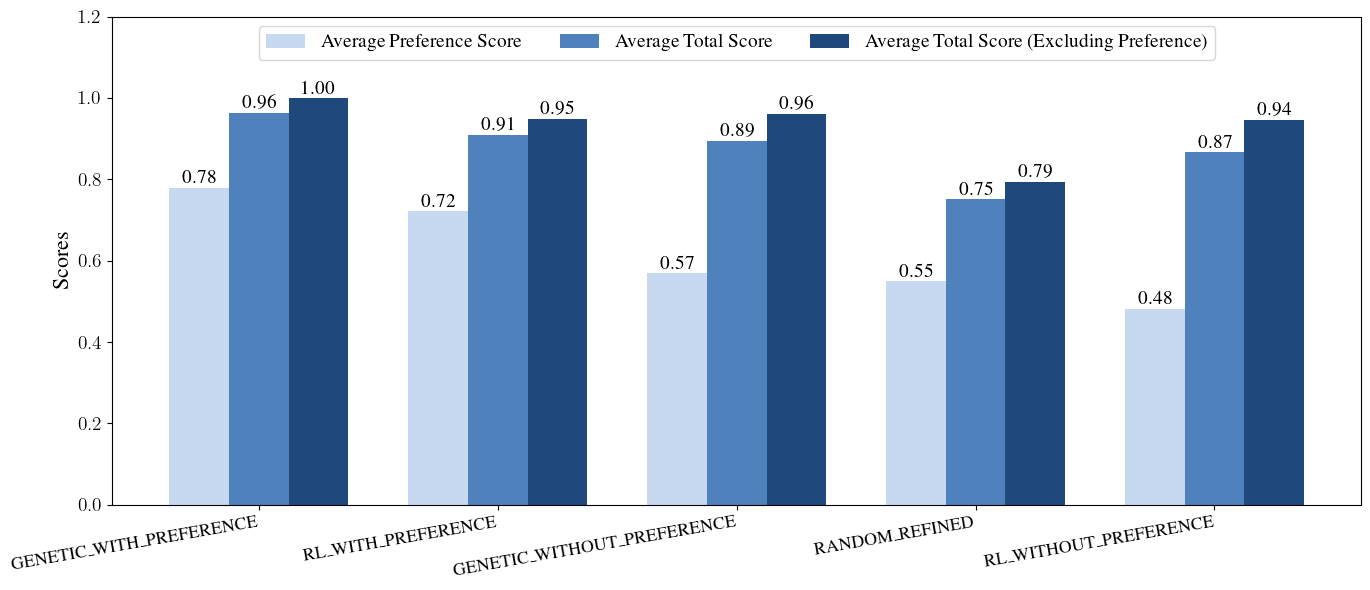

In [256]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['random_refined', 'genetic_with_preference', 'genetic_without_preference', 'RL_with_preference', 'RL_without_preference']
score_methods = ['nutrient_score', 'cost_score', 'co2_score', 'environment_score']

weights = {'nutrient_score': 2,
           'cost_score': 1,
           'co2_score': 1,
           'environment_score': 1}

# Initialize dictionaries to store total rewards and total preference scores across all days and counts
total_rewards = {method: 0 for method in methods}
total_scores = {method: 0 for method in methods}
total_scores_no_preference = {method: 0 for method in methods}
meal_counts = {method: 0 for method in methods}

# Aggregate the reward and preference score data across all indices and days
for index in range(10):
    for method in methods:
        for meal in range(5):
            # Sum rewards and preference scores for the current meal
            score = data[index][method][str(meal)]['info']['preference_score']
            reward = data[index][method][str(meal)]['reward']
            scores_no_preference = 0
            for score_method in score_methods:
                scores_no_preference += data[index][method][str(meal)]['info']['reward'][score_method] * weights[score_method] /5

            total_scores[method] += score
            total_rewards[method] += reward
            meal_counts[method] += 1
            total_scores_no_preference[method] += scores_no_preference
            
# Compute the average rewards and preference scores across all days and indices
average_rewards = []
average_scores = []
average_scores_no_preference = []
labels = []

for method in methods:
    if meal_counts[method] > 0:
        average_reward = total_rewards[method] / meal_counts[method]
        average_score = total_scores[method] / meal_counts[method]
        average_score_no_preference = total_scores_no_preference[method] / meal_counts[method]
        
        average_rewards.append(average_reward)
        average_scores.append(average_score)
        average_scores_no_preference.append(average_score_no_preference)
        
        labels.append(f'{method.upper()}')

# Convert lists to numpy arrays for easier manipulation
average_rewards = np.array(average_rewards)
average_scores = np.array(average_scores)
average_scores_no_preference = np.array(average_scores_no_preference)

# Sort the methods by average preference score
sorted_indices = np.argsort(average_scores)[::-1]
average_rewards_sorted = average_rewards[sorted_indices]
average_scores_sorted = average_scores[sorted_indices]
average_scores_no_preference_sorted = average_scores_no_preference[sorted_indices]
labels_sorted = np.array(labels)[sorted_indices]

# Plot the results
x = np.arange(len(labels_sorted))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width, average_scores_sorted, width, label='Average Preference Score', color='#c6d9f0')
bars2 = plt.bar(x, average_rewards_sorted, width, label='Average Total Score', color="#4f81bd")
bars3 = plt.bar(x + width, average_scores_no_preference_sorted, width, label='Average Total Score (Excluding Preference)', color="#1f497d")

# Add values on top of each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14)

for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=14)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Scores', fontsize=16)
# plt.title('Average Preference Score, Total Score, and No Preference Score by Method', fontsize=16)
plt.xticks(x, labels_sorted, rotation=10, ha='right', fontsize=13)
plt.yticks(fontsize=14)
# Modify the legend to appear at the bottom center with 3 columns
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=True)
plt.ylim(0, 1.2)  # Set the y-axis limit for Accuracy
plt.tight_layout()
plt.show()

{'genetic_with_preference': array([1., 1., 1., 1., 1.]), 'genetic_without_preference': array([0.95, 0.95, 0.95, 1.  , 0.95]), 'RL_with_preference': array([0.93244605, 0.9707475 , 0.94564024, 0.94011169, 0.94768912]), 'RL_without_preference': array([0.9436725 , 0.94604437, 0.96682157, 0.93959807, 0.92681101]), 'random_random': array([0.311692  , 0.6454359 , 0.88817418, 0.34263558, 0.88673118])}


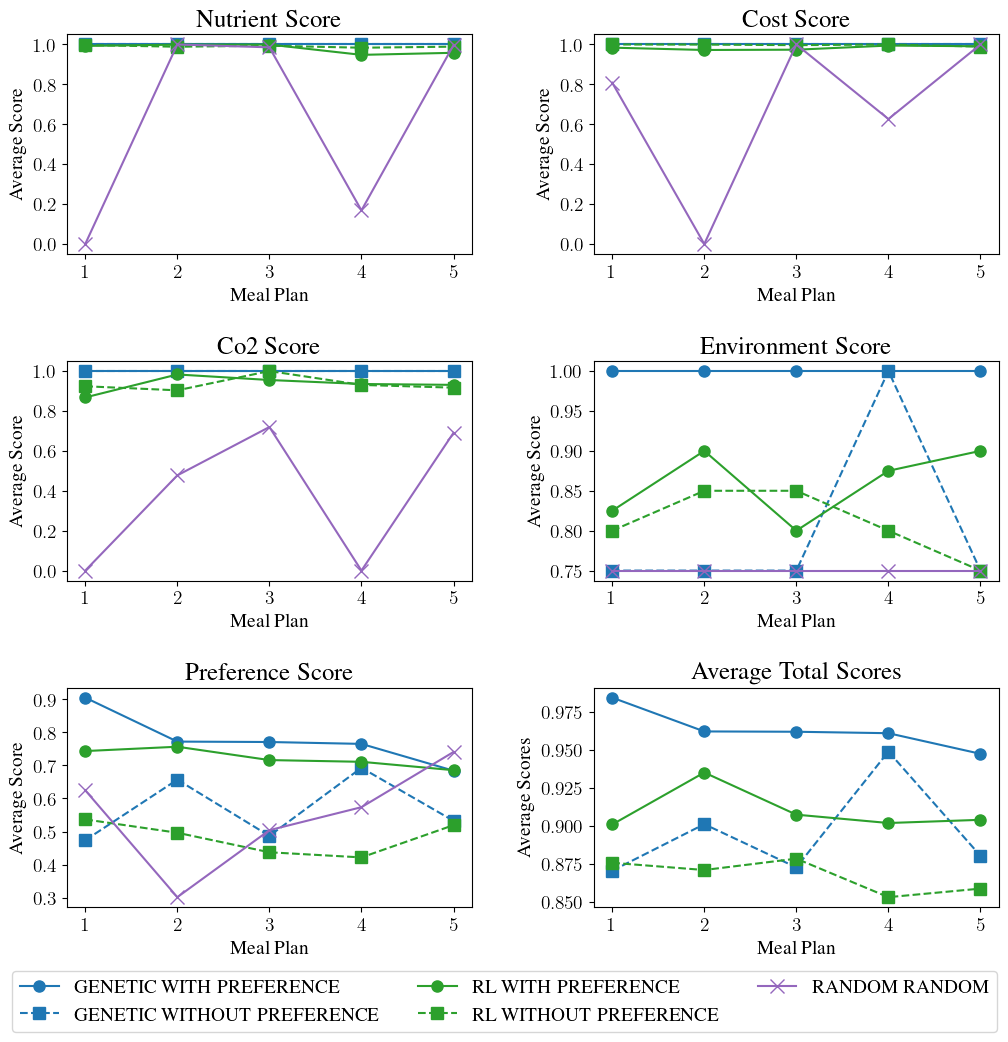

In [258]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['genetic_with_preference', 'genetic_without_preference', 'RL_with_preference', 'RL_without_preference', 'random_random']
score_methods = ['nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']

weights = {'nutrient_score': 2,
           'cost_score': 1,
           'co2_score': 1,
           'environment_score': 1}

# Initialize dictionaries to store individual scores for each meal and each method
individual_scores = {method: {score_method: np.zeros(5) for score_method in score_methods} for method in methods}

# Aggregate the score data across all indices for each meal
for index in range(10):  # Assuming 10 iterations
    for method in methods:
        for meal in range(5):  # Assuming 5 meals in rotation
            for score_method in score_methods:
                individual_scores[method][score_method][meal] += data[index][method][str(meal)]['info']['reward'][score_method]

# Calculate the averages by dividing by the number of iterations (10 in this case)
for method in methods:
    for score_method in score_methods:
        for meal in range(5):  # Assuming 5 meals in rotation
            individual_scores[method][score_method][meal] /= 10  # Averaging over 10 iterations

# Increase figure size for better readability
plt.figure(figsize=(11, 16))
# , figsize=(8.3, 12)
# Define a set of professional colors
colors = {
    'genetic': '#1f77b4',  # muted blue for genetic
    'RL': '#2ca02c',  # muted green for RL
    'random_random': '#9467bd'  # muted purple for random
}

# Define markers and line styles
styles = {
    'with_preference': {'marker': 'o', 'linestyle': '-'},
    'without_preference': {'marker': 's', 'linestyle': '--'}
}


# Create a dictionary to store handles for legend
handles = []

for i, score_method in enumerate(score_methods):
    plt.subplot(4, 2, i + 1)  # Change to 4x2 grid to fit 6 plots including total scores
    
    # Plot the scores for genetic_with_preference
    avg_scores_with_preference_genetic = individual_scores['genetic_with_preference'][score_method]
    handle, = plt.plot(range(1, 6), avg_scores_with_preference_genetic, marker=styles['with_preference']['marker'], linestyle=styles['with_preference']['linestyle'], label='GENETIC WITH PREFERENCE', color=colors['genetic'], markersize=8)
    if i == 0: handles.append(handle)
    
    # Plot the scores for genetic_without_preference
    avg_scores_without_preference_genetic = individual_scores['genetic_without_preference'][score_method]
    handle, = plt.plot(range(1, 6), avg_scores_without_preference_genetic, marker=styles['without_preference']['marker'], linestyle=styles['without_preference']['linestyle'], label='GENETIC WITHOUT PREFERENCE', color=colors['genetic'], markersize=8)
    if i == 0: handles.append(handle)
    
    # Plot the scores for RL_with_preference
    avg_scores_with_preference_rl = individual_scores['RL_with_preference'][score_method]
    handle, = plt.plot(range(1, 6), avg_scores_with_preference_rl, marker=styles['with_preference']['marker'], linestyle=styles['with_preference']['linestyle'], label='RL WITH PREFERENCE', color=colors['RL'], markersize=8)
    if i == 0: handles.append(handle)
    
    # Plot the scores for RL_without_preference
    avg_scores_without_preference_rl = individual_scores['RL_without_preference'][score_method]
    handle, = plt.plot(range(1, 6), avg_scores_without_preference_rl, marker=styles['without_preference']['marker'], linestyle=styles['without_preference']['linestyle'], label='RL WITHOUT PREFERENCE', color=colors['RL'], markersize=8)
    if i == 0: handles.append(handle)
    
    # Plot the scores for random_random
    avg_scores_random_random = individual_scores['random_random'][score_method]
    handle, = plt.plot(range(1, 6), avg_scores_random_random, marker='x', linestyle='-', label='RANDOM RANDOM', color=colors['random_random'], markersize=10)
    if i == 0: handles.append(handle)
    
    plt.title(f'{score_method.replace("_", " ").title()}', fontsize=18)
    plt.xlabel('Meal Plan', fontsize=14)
    plt.ylabel('Average Score', fontsize=14)
    plt.xticks(range(1, 6), fontsize=14)
    plt.yticks(fontsize=14)

# Calculate total scores with and without preference
total_scores_with_preference = {method: np.zeros(5) for method in methods}
total_scores_without_preference = {method: np.zeros(5) for method in methods}

for method in methods:
    for meal in range(5):
        total_scores_with_preference[method][meal] = sum(
            weights.get(score_method, 1) * individual_scores[method][score_method][meal] / 6
            for score_method in score_methods
        )
        total_scores_without_preference[method][meal] = sum(
            weights.get(score_method, 1) * individual_scores[method][score_method][meal] / 5
            for score_method in score_methods if score_method != 'preference_score'
        )

print(total_scores_without_preference)
# Plot total scores with and without preference, and preference score
plt.subplot(4, 2, 6)  # Total scores plot (6th position)
# 'random_random'
for method in ['genetic_with_preference', 'genetic_without_preference', 'RL_with_preference', 'RL_without_preference']:
    color = colors['genetic'] if 'genetic' in method else colors['RL'] if 'RL' in method else colors['random_random']
    if 'with_preference' in method:
        label = f'{method.replace("_", " ").upper()} - TOTAL WITH PREFERENCE'
        plt.plot(range(1, 6), total_scores_with_preference[method], marker=styles['with_preference']['marker'], linestyle=styles['with_preference']['linestyle'], label=label, color=color, markersize=8)
    elif 'without_preference' in method:
        label = f'{method.replace("_", " ").upper()} - TOTAL WITHOUT PREFERENCE'
        plt.plot(range(1, 6), total_scores_with_preference[method], marker=styles['without_preference']['marker'], linestyle=styles['without_preference']['linestyle'], label=label, color=color, markersize=8)
    else:  # For random_random
        label = f'{method.replace("_", " ").upper()} - TOTAL'
        plt.plot(range(1, 6), total_scores_with_preference[method], marker='x', linestyle='-', label=label, color=color, markersize=10)

plt.title('Average Total Scores', fontsize=18)
plt.xlabel('Meal Plan', fontsize=14)
plt.ylabel('Average Scores', fontsize=14)
plt.xticks(range(1, 6), fontsize=14)
plt.yticks(fontsize=14)

# Add a single legend at the bottom of the plot, closer to the plot
plt.figlegend(handles, [
    'GENETIC WITH PREFERENCE', 
    'GENETIC WITHOUT PREFERENCE', 
    'RL WITH PREFERENCE', 
    'RL WITHOUT PREFERENCE', 
    'RANDOM RANDOM'
], loc='lower center', bbox_to_anchor=(0.5, 0.32), ncol=3, fontsize=14)

# Adjust the layout to prevent overlap and improve the spacing
plt.tight_layout(pad=4.0)
plt.subplots_adjust(bottom=0.2)  # Adjust bottom to make room for the legend

plt.show()


In [9]:
import os
import json
from collections import defaultdict

# Define the folder path
folder_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp2/menu_util'

# Initialize a nested dictionary to store grouped data
data_dict = {}

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and load the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
            
            # Parse the filename to extract the method and split ratio
            strings = filename.split("_")
            method = strings[4]
            if strings[5] == 'random':
                method = "random_random"
            if strings[5] == 'with':
                method = method + "_with_preference"
            if strings[5] == 'without':
                method = method + "_without_preference"
            
            # Group data by method and split ratio
            data_dict[method] = data


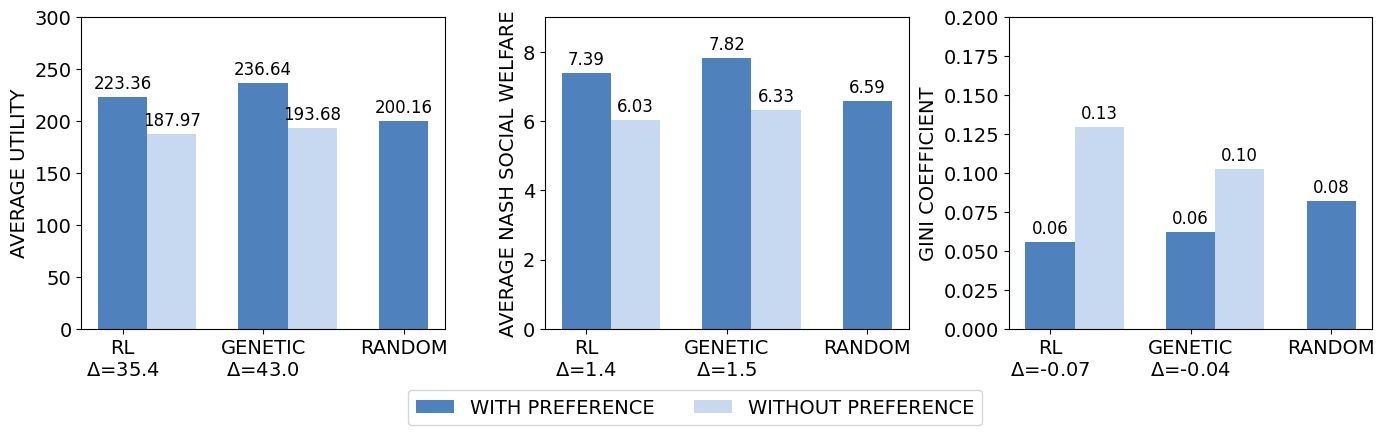

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def add_value_labels(bars, ax):
    """
    Add value labels on top of the bars in a bar plot.

    Parameters:
    - bars: The bars of the plot (as returned by the bar() function).
    - ax: The axis on which the bars are plotted.
    """
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

def normalize(values, min_value=-30, max_value=30, new_min=1, new_max=10):
    # Normalize the values to the range [new_min, new_max]
    normalized_values = [new_min + (new_max - new_min) * (x - min_value) / (max_value - min_value) for x in values]
    return normalized_values

# Need to adjust values to acocunt for neutral being incorrectly set to 1 here. This converts neutral ratings back to 2.
def adjust_values(values):
    adjusted_values = []
    for value in values:
        if value >= 0:
            # Handle positive values
            remainder = value % 5
            if remainder != 0:
                # If the value isn't divisible by 5, adjust it
                value = value - remainder + remainder * 2
            adjusted_values.append(value)
        else:
            # Handle negative values
            remainder = abs(value) % 5
            if remainder != 0:
                # If there's a remainder, adjust by adding the positive remainder
                value = value + (5 - remainder)
            adjusted_values.append(value)
    return adjusted_values

def normalize(values, min_value=-30, max_value=30, new_min=1, new_max=10):
    # Normalize the values to the range [new_min, new_max]
    normalized_values = [new_min + (new_max - new_min) * (x - min_value) / (max_value - min_value) for x in values]
    return normalized_values

def gini_coefficient(values):
    
    # Sort the values
    sorted_values = sorted(values)
    n = len(values)
    
    # Calculate the Gini coefficient using the formula
    cumulative_sum = np.cumsum(sorted_values)
    sum_of_values = cumulative_sum[-1]
    
    gini = (2 / n) * sum((i + 1) * sorted_values[i] for i in range(n)) / sum_of_values - (n + 1) / n
    
    return gini


# Set the academic color palette: light blue and dark blue
colors = ['#4f81bd', '#c6d9f0', 'grey']  # Dark blue, light blue, and grey for random

# Initialize lists for storing the data
rl_with = []
rl_without = []
genetic_with = []
genetic_without = []
gini_with = []
gini_without = []
random = None

# Loop through each method in the data
for method in data_dict.keys():
    total_predicted_utility = 0
    total_nash_social_welfare = 0
    total_gini_coefficient = 0
    count = 0

    # Sum the predicted utility, Nash Social Welfare, and Gini coefficient across iterations and days
    for iteration in range(10):
        for day in range(1, 6):
            utilities = [u for u in normalize(adjust_values(data_dict[method][iteration]['predicted_utility'][str(day)].values()))]
            predicted_utility = sum(utilities)
            product = math.prod(utilities)
            n = len(utilities)
            
            # Calculate Nash Social Welfare (geometric mean)
            if n > 0:
                nash_social_welfare = product ** (1 / n)
            else:
                nash_social_welfare = 0

            # Calculate Gini coefficient
            gini = gini_coefficient(utilities)
            
            total_predicted_utility += predicted_utility
            total_nash_social_welfare += nash_social_welfare
            total_gini_coefficient += gini
            count += 1

    avg_predicted_utility = total_predicted_utility / count
    avg_nash_social_welfare = total_nash_social_welfare / count
    avg_gini_coefficient = total_gini_coefficient / count

    # Assign the calculated averages to the appropriate list
    if 'random' in method:
        random = (avg_predicted_utility, avg_nash_social_welfare, avg_gini_coefficient)
    elif 'rl' in method.lower():
        if 'with_preference' in method:
            rl_with.append((avg_predicted_utility, avg_nash_social_welfare, avg_gini_coefficient))
        elif 'without_preference' in method:
            rl_without.append((avg_predicted_utility, avg_nash_social_welfare, avg_gini_coefficient))
    elif 'genetic' in method.lower():
        if 'with_preference' in method:
            genetic_with.append((avg_predicted_utility, avg_nash_social_welfare, avg_gini_coefficient))
        elif 'without_preference' in method:
            genetic_without.append((avg_predicted_utility, avg_nash_social_welfare, avg_gini_coefficient))

# Average the results for methods that might have multiple entries
rl_with = np.mean(rl_with, axis=0) if rl_with else (None, None, None)
rl_without = np.mean(rl_without, axis=0) if rl_without else (None, None, None)
genetic_with = np.mean(genetic_with, axis=0) if genetic_with else (None, None, None)
genetic_without = np.mean(genetic_without, axis=0) if genetic_without else (None, None, None)

# Prepare the data for plotting
methods = ['RL', 'Genetic', 'Random']
with_preferences = [rl_with[0], genetic_with[0], random[0]]
without_preferences = [rl_without[0], genetic_without[0]]  # Exclude "None" for random
with_nash = [rl_with[1], genetic_with[1], random[1]]
without_nash = [rl_without[1], genetic_without[1]]  # Exclude "None" for random
with_gini = [rl_with[2], genetic_with[2], random[2]]
without_gini = [rl_without[2], genetic_without[2]]  # Exclude "None" for random

# Calculate the deltas (differences) between with and without preferences
delta_utility = [with_preferences[i] - without_preferences[i] for i in range(2)]
delta_nash = [with_nash[i] - without_nash[i] for i in range(2)]
delta_gini = [with_gini[i] - without_gini[i] for i in range(2)]

# Adjust indices for plotting
index = np.arange(len(methods))
bar_width = 0.35  # Set the width of the bars

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))  # Create 3 subplots side by side

# Plot average utility on the first subplot
ax1 = axes[0]
bars_with = ax1.bar(index, with_preferences, bar_width, label='WITH PREFERENCE', color=colors[0])
bars_without = ax1.bar(index[:2] + bar_width, without_preferences, bar_width, label='WITHOUT PREFERENCE', color=colors[1])  # Only plot RL and Genetic

# Add value labels, considering the scale of the y-axis
add_value_labels(bars_with, ax1)
add_value_labels(bars_without, ax1)

# Set labels, title, and legend for the first subplot
ax1.set_ylabel('AVERAGE UTILITY', fontsize=14)
ax1.set_xticks(index)
ax1.set_xticklabels([f"{method.upper()}\n$\Delta$={delta:.1f}" for method, delta in zip(methods[:2], delta_utility)] + ["RANDOM"], rotation=0, fontsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plot Nash Social Welfare on the second subplot
ax2 = axes[1]
bars_with_nash = ax2.bar(index, with_nash, bar_width, label='WITH PREFERENCE', color=colors[0])
bars_without_nash = ax2.bar(index[:2] + bar_width, without_nash, bar_width, label='WITHOUT PREFERENCE', color=colors[1])  # Only plot RL and Genetic

# Add value labels, considering the scale of the y-axis
add_value_labels(bars_with_nash, ax2)
add_value_labels(bars_without_nash, ax2)

# Set labels, title, and legend for the second subplot
ax2.set_ylabel('AVERAGE NASH SOCIAL WELFARE', fontsize=14)
ax2.set_xticks(index)
ax2.set_xticklabels([f"{method.upper()}\n$\Delta$={delta:.1f}" for method, delta in zip(methods[:2], delta_nash)] + ["RANDOM"], rotation=0, fontsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Plot Gini coefficient on the third subplot
ax3 = axes[2]
bars_with_gini = ax3.bar(index, with_gini, bar_width, label='WITH PREFERENCE', color=colors[0])
bars_without_gini = ax3.bar(index[:2] + bar_width, without_gini, bar_width, label='WITHOUT PREFERENCE', color=colors[1])  # Only plot RL and Genetic

# Add value labels, considering the scale of the y-axis
add_value_labels(bars_with_gini, ax3)
add_value_labels(bars_without_gini, ax3)

# Set labels, title, and legend for the third subplot
ax3.set_ylabel('GINI COEFFICIENT', fontsize=14)
ax3.set_xticks(index)
ax3.set_xticklabels([f"{method.upper()}\n$\Delta$={delta:.2f}" for method, delta in zip(methods[:2], delta_gini)] + ["RANDOM"], rotation=0, fontsize=14)
ax3.tick_params(axis='y', labelsize=14)

# Get handles and labels from the first subplot
handles, labels = ax1.get_legend_handles_labels()

# Create a single legend for the entire figure
fig.legend(handles, labels, fontsize=14, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.set_ylim(0, 300)
ax2.set_ylim(0, 9)
ax3.set_ylim(0, 0.2)

# Adjust the layout to make space for the x-labels and legend
plt.tight_layout()

# Show the combined plot
plt.show()


# Exp 6

In [1]:
import json 
import matplotlib.pyplot as plt
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

file_path = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp6/all_results_genetic.json"
file_path1 = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp6/all_results_prob.json"
file_path2 = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp6/all_results_RL.json"

with open(file_path, 'r') as f:
    data_path = json.load(f)
    
with open(file_path1, 'r') as f:
    data_path1 = json.load(f)

with open(file_path2, 'r') as f:
    data_path2 = json.load(f)


# Alternatively, using dictionary unpacking (works in Python 3.5+)
data = {**data_path, **data_path1, **data_path2}



In [16]:
def normalize(values, min_value=-30, max_value=30, new_min=1, new_max=10):
    # Normalize the values to the range [new_min, new_max]
    normalized_values = [new_min + (new_max - new_min) * (x - min_value) / (max_value - min_value) for x in values]
    return normalized_values

def calculate_gini_coefficient(values):
    
    values =normalize(values)
    
    # Sort the values
    sorted_values = sorted(values)
    n = len(values)
    
    # Calculate the Gini coefficient using the formula
    cumulative_sum = np.cumsum(sorted_values)
    sum_of_values = cumulative_sum[-1]
    
    gini = (2 / n) * sum((i + 1) * sorted_values[i] for i in range(n)) / sum_of_values - (n + 1) / n
    
    return gini

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the Gini coefficient
def c(utilities):
    sorted_utilities = sorted(utilities)
    n = len(utilities)
    cumulative_sum = np.cumsum(sorted_utilities)
    gini = 1 - (2 * np.sum(cumulative_sum) / (n * np.sum(sorted_utilities))) + (1 / n)
    return gini

# Define colors and line styles for different method types
colors = {'simple': 'green', 'complex': 'blue'}
line_styles = {'predicted': '--'}

# Create a plot for each method and its method types
for method in methods:
    if method not in ['genetic', 'RL']:
        continue
    
    # Create a figure with three subplots: utility, Gini coefficient, and preference score
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    for method_type in ['simple', 'complex']:
        # Extract predicted utility data over menus for the current method and method_type
        menu_keys = sorted(data[method][method_type].keys(), key=int)
        predicted_utilities = [list(data[method][method_type][menu_key]['predicted_utility'].values()) for menu_key in menu_keys]
        preference_score = [data[method][method_type][menu_key]['info']['reward']['preference_score'] for menu_key in menu_keys]
        
        # Calculate the Gini coefficient for predicted utilities for each day
        daily_gini_predicted = []
        for utilities in predicted_utilities:
            gini_predicted = calculate_gini_coefficient(utilities)
            daily_gini_predicted.append(gini_predicted)

        # Generate x-axis labels representing days
        days = [f"Day {i+1}" for i in range(len(predicted_utilities))]

        # Plot the predicted utility for each day on the first subplot (ax1)
        ax1.plot(days, [np.sum(utilities) for utilities in predicted_utilities], marker='o', linestyle='-', 
                 color=colors[method_type], label=f'{method_type.capitalize()} Predicted Utility')

        # Plot the Gini coefficient for each day on the second subplot (ax2)
        ax2.plot(days, daily_gini_predicted, marker='x', linestyle=line_styles['predicted'], 
                 color=colors[method_type], label=f'{method_type.capitalize()} Predicted Gini')

        # Plot the preference score for each day on the third subplot (ax3)
        ax3.plot(days, preference_score, marker='s', linestyle='-', 
                 color=colors[method_type], label=f'{method_type.capitalize()} Preference Score')

    # Set labels and titles for each subplot
    ax1.set_xlabel('Day', fontsize=14)
    ax1.set_ylabel('Predicted Utility', fontsize=14)
    ax1.set_title(f'Daily Predicted Utility for Method: {method}', fontsize=16)
    ax1.legend(title='Utility Type', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)

    ax2.set_xlabel('Day', fontsize=14)
    ax2.set_ylabel('Gini Coefficient', fontsize=14)
    ax2.set_title(f'Gini Coefficient Evolution for Method: {method}', fontsize=16)
    ax2.legend(title='Gini Type', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)

    ax3.set_xlabel('Day', fontsize=14)
    ax3.set_ylabel('Preference Score', fontsize=14)
    ax3.set_title(f'Daily Preference Score for Method: {method}', fontsize=16)
    ax3.legend(title='Preference Type', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout for tight fitting
    plt.tight_layout()

    # Display the plot
    plt.show()


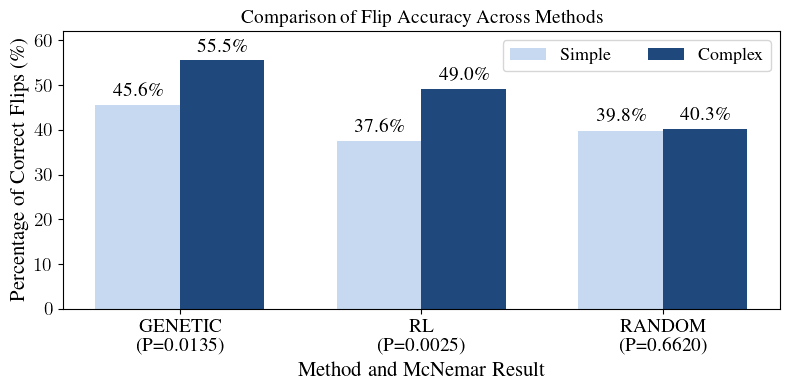

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

# Function to categorize based on whether a child's utility flips relative to the mean between two days
def categorize_utilities(predicted_utilities):
    flip_counts = {'Flipped': 0, 'Not Flipped': 0}
    flip_table = {'flipped_to_not': 0, 'not_to_flipped': 0}  # Needed for McNemar's test

    # Find the minimum length of utilities to avoid IndexError
    min_length = min(len(utilities) for utilities in predicted_utilities)

    for i in range(1, min_length):  # Start from day 1 to compare with day 0
        # Calculate the mean utility of all children on the previous and current days
        previous_day_mean = np.mean([utilities[i - 1] for utilities in predicted_utilities])
        current_day_mean = np.mean([utilities[i] for utilities in predicted_utilities])

        for utilities in predicted_utilities:
            previous_day_util = utilities[i - 1]
            current_day_util = utilities[i]

            if (previous_day_util > previous_day_mean and current_day_util < current_day_mean):
                # Flip from above to below mean
                flip_counts['Flipped'] += 1
                flip_table['flipped_to_not'] += 1
            elif (previous_day_util < previous_day_mean and current_day_util > current_day_mean):
                # Flip from below to above mean
                flip_counts['Flipped'] += 1
                flip_table['not_to_flipped'] += 1
            else:
                # The status did not flip
                flip_counts['Not Flipped'] += 1

    return flip_counts, flip_table

# Initialize lists to store the results for plotting
methods = ['genetic', 'RL', 'random']  # 'random' is the new method
method_labels = []
simple_percentages = []
complex_percentages = []
mcnemar_results = []

# Loop over methods
for method in methods:
    flip_results = {'simple': {'Flipped': 0, 'Not Flipped': 0},
                    'complex': {'Flipped': 0, 'Not Flipped': 0}}
    mcnemar_tables = {'simple': {'flipped_to_not': 0, 'not_to_flipped': 0},
                      'complex': {'flipped_to_not': 0, 'not_to_flipped': 0}}

    for method_type in ['simple', 'complex']:
        # Extract predicted utility data
        menu_keys = sorted(data[method][method_type].keys(), key=int)
        predicted_utilities = [list(data[method][method_type][menu_key]['predicted_utility'].values()) for menu_key in menu_keys]

        # Categorize based on whether the status flipped and prepare the McNemar's test table
        flip_counts, flip_table = categorize_utilities(predicted_utilities)

        # Store the flip counts
        flip_results[method_type]['Flipped'] += flip_counts['Flipped']
        flip_results[method_type]['Not Flipped'] += flip_counts['Not Flipped']

        # Store the data needed for McNemar's test
        mcnemar_tables[method_type]['flipped_to_not'] += flip_table['flipped_to_not']
        mcnemar_tables[method_type]['not_to_flipped'] += flip_table['not_to_flipped']

    # Calculate the percentages correctly
    total_simple = flip_results['simple']['Flipped'] + flip_results['simple']['Not Flipped']
    total_complex = flip_results['complex']['Flipped'] + flip_results['complex']['Not Flipped']
    
    simple_percentage_flipped = (flip_results['simple']['Flipped'] / total_simple) * 100
    simple_percentage_not_flipped = (flip_results['simple']['Not Flipped'] / total_simple) * 100
    complex_percentage_flipped = (flip_results['complex']['Flipped'] / total_complex) * 100
    complex_percentage_not_flipped = (flip_results['complex']['Not Flipped'] / total_complex) * 100

    # Perform McNemar's test and store the result
    table = np.array([[mcnemar_tables['simple']['not_to_flipped'], mcnemar_tables['simple']['flipped_to_not']],
                      [mcnemar_tables['complex']['not_to_flipped'], mcnemar_tables['complex']['flipped_to_not']]])

    mcnemar_result = mcnemar(table, exact=True)
    mcnemar_results.append(mcnemar_result.pvalue)
    
    # Store the results for plotting
    method_labels.append(f'{method.capitalize()}\n(p={mcnemar_result.pvalue:.4f})')
    simple_percentages.append(simple_percentage_flipped)
    complex_percentages.append(complex_percentage_flipped)

# Plotting
x = np.arange(len(methods))  # the label locations
width = 0.35  # the width of the bars

# Adjusting the figure size to fit well on an A4 page without taking up the entire page
fig, ax = plt.subplots(figsize=(8, 4))  # Slightly smaller than full A4 to fit nicely

rects1 = ax.bar(x - width/2, simple_percentages, width, label='Simple', color="#c6d9f0")
rects2 = ax.bar(x + width/2, complex_percentages, width, label='Complex', color="#1f497d")

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Method and McNemar Result', fontsize=15)
ax.set_ylabel('Percentage of Correct Flips (\\%)', fontsize=15)
ax.set_title('Comparison of Flip Accuracy Across Methods', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([label.upper() for label in method_labels], fontsize=14)
ax.legend(fontsize=13, ncol =2)

# Adjust tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the percentage above each bar with correct formatting
for i, v in enumerate(simple_percentages):
    ax.text(i - width/2, v + 1, f"{v:.1f}\\%", ha='center', va='bottom', fontsize=14)

for i, v in enumerate(complex_percentages):
    ax.text(i + width/2, v + 1, f"{v:.1f}\\%", ha='center', va='bottom', fontsize=14)
plt.ylim(0, 62)
fig.tight_layout()
plt.show()


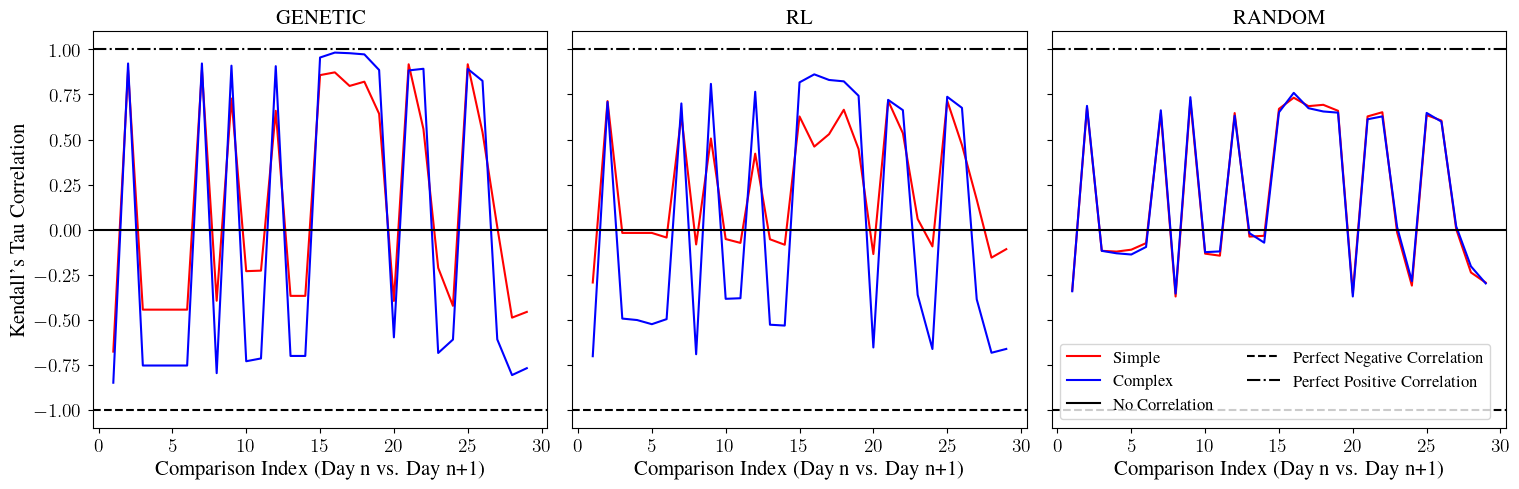

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

# Function to rank utilities and compare ranks between two days using Kendall's Tau
def calculate_kendall_tau(predicted_utilities):
    kendall_taus = []

    # Find the minimum length of utilities to avoid IndexError
    min_length = min(len(utilities) for utilities in predicted_utilities)

    for i in range(1, min_length):  # Start from day 1 to compare with day 0
        # Rank utilities for previous and current day
        previous_day_utilities = np.array([utilities[i - 1] for utilities in predicted_utilities])
        current_day_utilities = np.array([utilities[i] for utilities in predicted_utilities])

        # Calculate Kendall's Tau correlation
        kendall_tau, _ = kendalltau(previous_day_utilities, current_day_utilities)
        kendall_taus.append(kendall_tau)

    return kendall_taus

# List of methods
methods = ['genetic', 'RL', 'random']

# Create subplots
fig, axs = plt.subplots(1, len(methods), figsize=(16, 5), sharey=True)

# Loop over methods (genetic, RL, random)
for idx, method in enumerate(methods):
    axs[idx].set_title(f'{method.upper()}', fontsize=15)  # Capitalize the method name
    
    for method_type, color in zip(['simple', 'complex'], ['red', 'blue']):
        # Extract predicted utility data
        menu_keys = sorted(data[method][method_type].keys(), key=int)
        predicted_utilities = [list(data[method][method_type][menu_key]['predicted_utility'].values()) for menu_key in menu_keys]

        # Calculate Kendall's Tau over days
        kendall_taus = calculate_kendall_tau(predicted_utilities)

        # Plot Kendall's Tau over comparisons
        axs[idx].plot(range(1, len(kendall_taus) + 1), kendall_taus, label=f'{method_type.capitalize()}', color=color)
    
    axs[idx].set_xlabel('Comparison Index (Day n vs. Day n+1)', fontsize=15)
    axs[idx].tick_params(axis='x', labelsize=14)
    axs[idx].tick_params(axis='y', labelsize=14)
    
    # Add horizontal lines for reference
    axs[idx].axhline(0, color='black', linestyle='-', label='No Correlation')
    axs[idx].axhline(-1, color='black', linestyle='--', label='Perfect Negative Correlation')
    axs[idx].axhline(1, color='black', linestyle='-.', label='Perfect Positive Correlation')

# Set y-axis label
axs[0].set_ylabel('Kendall\'s Tau Correlation', fontsize=15)

# Add legend to the last subplot
axs[-1].legend(fontsize=12,loc='best', ncols=2)

# Adjust layout to prevent overlap
fig.tight_layout()

plt.show()





Lower Average Rank: Indicates that a child consistently ranks higher across the menus (closer to 1st place). This is generally considered better since it means the child often had a higher utility.
Higher Average Rank: Indicates that a child consistently ranks lower across the menus (closer to the last place). This suggests the child often had a lower utility.

Gini Coefficient for Genetic - Simple: 0.1790
Gini Coefficient for Genetic - Complex: 0.0846
Gini Coefficient for Rl - Simple: 0.1178
Gini Coefficient for Rl - Complex: 0.0883
Gini Coefficient for Random - Simple: 0.1628
Gini Coefficient for Random - Complex: 0.1608


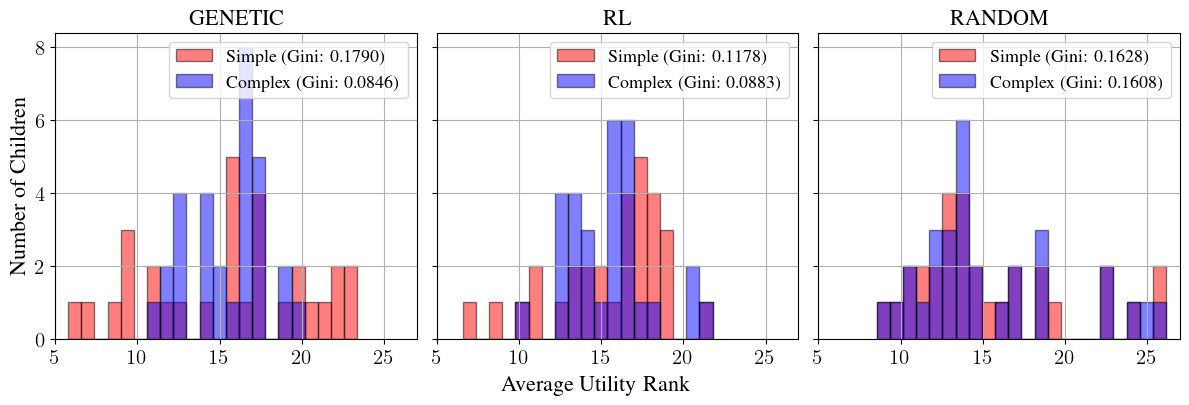

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the average rank position for each child over the period
def calculate_average_ranks(predicted_utilities):
    num_menus = len(predicted_utilities)  # Number of days or menus
    num_children = len(predicted_utilities[0])  # Number of children

    total_ranks = np.zeros(num_children)  # Initialize an array to hold the sum of ranks for each child

    # Rank children for each menu and sum their ranks
    for i in range(num_menus):  
        # Rank the utilities for the current menu
        current_day_utilities = np.array(predicted_utilities[i])
        current_day_ranks = np.argsort(np.argsort(current_day_utilities)) + 1  # Rank the children
        total_ranks += current_day_ranks  # Sum the ranks over all menus

    # Calculate the average rank per child
    average_ranks = total_ranks / num_menus
    return average_ranks

def normalize(values, min_value=-30, max_value=30, new_min=1, new_max=10):
    # Normalize the values to the range [new_min, new_max]
    normalized_values = [new_min + (new_max - new_min) * (x - min_value) / (max_value - min_value) for x in values]
    return normalized_values

def gini_coefficient(values):
    
    # Sort the values
    sorted_values = sorted(values)
    n = len(values)
    
    # Calculate the Gini coefficient using the formula
    cumulative_sum = np.cumsum(sorted_values)
    sum_of_values = cumulative_sum[-1]
    
    gini = (2 / n) * sum((i + 1) * sorted_values[i] for i in range(n)) / sum_of_values - (n + 1) / n
    
    return gini

# Define colors for simple and complex
colors = {'simple': 'red', 'complex': 'blue'}

methods = ['genetic', 'RL', 'random']
method_types = ['simple', 'complex']

# Create subplots
fig, axs = plt.subplots(1, len(methods), figsize=(12, 4), sharey=True)

for idx, method in enumerate(methods):
    all_average_ranks = []

    # Collect average ranks for both simple and complex to determine common bins
    for method_type in method_types:
        # Extract predicted utility data
        menu_keys = sorted(data[method][method_type].keys(), key=int)
        predicted_utilities = [
            list(data[method][method_type][menu_key]['predicted_utility'].values()) 
            for menu_key in menu_keys
        ]

        # Calculate average ranks
        average_ranks = calculate_average_ranks(predicted_utilities)
        all_average_ranks.append(average_ranks)

    # Determine common bin edges based on combined data
    combined_ranks = np.concatenate(all_average_ranks)
    bin_width = 0.8  # Slightly narrower bars
    bins = np.arange(combined_ranks.min(), combined_ranks.max() + bin_width, bin_width)

    # Plot histograms for simple and complex
    for method_type in method_types:
        average_ranks = all_average_ranks[method_types.index(method_type)]
        
        # Compute Gini coefficient
        gini = gini_coefficient(average_ranks)
        print(f"Gini Coefficient for {method.capitalize()} - {method_type.capitalize()}: {gini:.4f}")
        
        # Plot histogram
        axs[idx].hist(
            average_ranks, 
            bins=bins, 
            edgecolor='black', 
            alpha=0.5, 
            color=colors[method_type], 
            label=f'{method_type.capitalize()} (Gini: {gini:.4f})'
        )
    
    # Set titles, labels, and limits
    axs[idx].set_title(f'{method.upper()}', fontsize=16)
    axs[idx].tick_params(axis='x', labelsize=15)
    axs[idx].tick_params(axis='y', labelsize=15)
    axs[idx].set_xlim(5, 27)  # Set x-axis limits
    axs[idx].grid(True)

    # Add legend to the last subplot
    axs[idx].legend(fontsize=13, loc='best')

# Set y-axis label
axs[0].set_ylabel('Number of Children', fontsize=16)

# Add a shared x-axis label
fig.text(0.5, 0.01, 'Average Utility Rank', ha='center', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust rect to accommodate the x-label

# Display the plot
plt.show()




# Exp5 Feedback Utility Mechanism

In [202]:
import json 
import matplotlib.pyplot as plt
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

# file_path = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp5/all_results_genetic.json"
# file_path1 = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp5/all_results_prob.json"
# file_path2 = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp5/all_results_RL.json"

# with open(file_path, 'r') as f:
#     data_path = json.load(f)
    
# with open(file_path1, 'r') as f:
#     data_path1 = json.load(f)

# with open(file_path2, 'r') as f:
#     data_path2 = json.load(f)


# # Alternatively, using dictionary unpacking (works in Python 3.5+)
# data = {**data_path, **data_path1, **data_path2}

file = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/saved_data/data/run_165_reward_test/all_results.json"

with open(file, 'r') as f:
    data = json.load(f)
    


In [206]:
from collections import Counter

# Assuming you have your child_list as defined
child_list = []
for i in range(1, 30):
    child_list.append("child" + str(i))

# Initialize preference_type_counter for each child and overall
preference_type_counter = {child: Counter() for child in child_list}
preference_type_counter["overall"] = Counter()

for method in data.keys():
    for method_type in data[method].keys():
        for menu in range(len(data[method][method_type])):  # Adjust the range based on your actual data
            menu_key = str(menu)
            
            for child in child_list:
                if child not in data[method][method_type][menu_key]['feedback'].keys():
                    continue
                correct_action = data[method][method_type][menu_key]['feedback'][child]['correct_action'].values()
                
                # Update the Counter for the specific child with the iterable (correct_action is a list or similar)
                preference_type_counter[child].update(correct_action)
                
                # Also update the overall Counter
                preference_type_counter["overall"].update(correct_action)

# Convert the counts to percentages
preference_percentage_counter = {}

for child, counter in preference_type_counter.items():
    total = sum(counter.values())
    percentage_counter = Counter({key: (value / total) * 100 for key, value in counter.items()})
    preference_percentage_counter[child] = percentage_counter

# Now, preference_percentage_counter contains a Counter for each child and overall with percentages
# Example usage: print the percentage Counter for a specific child
for child, counter in preference_percentage_counter.items():
    print(f"{child}: {counter}")


child1: Counter({'likes': 48.333333333333336, 'dislikes': 35.0, 'neutral': 16.666666666666664})
child2: Counter({'likes': 53.333333333333336, 'dislikes': 28.888888888888886, 'neutral': 17.77777777777778})
child3: Counter({'likes': 46.22641509433962, 'dislikes': 31.132075471698112, 'neutral': 22.641509433962266})
child4: Counter({'likes': 48.97959183673469, 'dislikes': 33.6734693877551, 'neutral': 17.346938775510203})
child5: Counter({'likes': 42.66666666666667, 'dislikes': 32.0, 'neutral': 25.333333333333336})
child6: Counter({'likes': 45.83333333333333, 'dislikes': 30.833333333333336, 'neutral': 23.333333333333332})
child7: Counter({'likes': 49.18032786885246, 'dislikes': 32.78688524590164, 'neutral': 18.0327868852459})
child8: Counter({'likes': 58.333333333333336, 'dislikes': 21.666666666666668, 'neutral': 20.0})
child9: Counter({'likes': 43.22033898305085, 'dislikes': 40.67796610169492, 'neutral': 16.101694915254235})
child10: Counter({'likes': 40.0, 'dislikes': 37.77777777777778, '

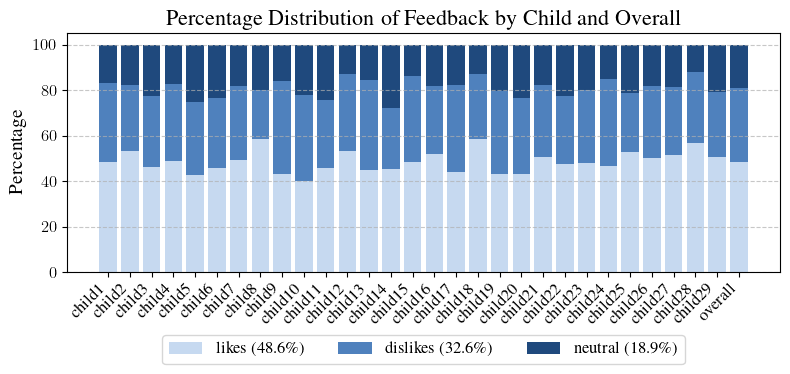

In [207]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Prepare the data for plotting
labels = child_list + ['overall']
actions = list(preference_percentage_counter["overall"].keys())

# Create a matrix to store percentages for each child and action
percentage_matrix = np.zeros((len(labels), len(actions)))

for i, child in enumerate(labels):
    for j, action in enumerate(actions):
        percentage_matrix[i, j] = preference_percentage_counter[child][action]

# Sort actions and percentage_matrix based on the "overall" percentages
overall_percentages = percentage_matrix[-1, :]  # The last row corresponds to 'overall'
sorted_indices = np.argsort(overall_percentages)[::-1]  # Sort indices by overall percentage in descending order

# Reorder actions and percentage_matrix based on sorted_indices
sorted_actions = [actions[i] for i in sorted_indices]
sorted_percentage_matrix = percentage_matrix[:, sorted_indices]

# Specify colors for the bars (adjust if more actions are present)
colors = ["#c6d9f0", "#4f81bd", "#1f497d"]  # Light blue, medium blue, dark blue

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))  # Adjusted size to be suitable for a report

# Create a stacked bar chart
bottom = np.zeros(len(labels))
for j, action in enumerate(sorted_actions):
    ax.bar(labels, sorted_percentage_matrix[:, j], bottom=bottom, label=f"{action} ({preference_percentage_counter['overall'][action]:.1f}\\%)", color=colors[j])
    bottom += sorted_percentage_matrix[:, j]

# Add labels, title, and legend
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Percentage Distribution of Feedback by Child and Overall', fontsize=16)
ax.legend(
          bbox_to_anchor=(0.5, -0.23), loc='upper center', fontsize=12, ncol=3)

# Ensure all x-ticks are plotted
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)

# Increase the fontsize of y-ticks
ax.tick_params(axis='y', labelsize=12)

# Display gridlines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for tight fitting
plt.tight_layout()

# Display the plot
plt.show()


In [208]:
# Initialize dictionaries for each feedback group
child_no_feedback, child_all_feedback, child_half_feedback = {}, {}, {}

# Iterate through the data
for method in data.keys():
    if method not in child_no_feedback:
        child_no_feedback[method] = {}
        child_all_feedback[method] = {}
        child_half_feedback[method] = {}
    
    for method_type in data[method].keys():
        if method_type not in child_no_feedback[method]:
            child_no_feedback[method][method_type] = {}
            child_all_feedback[method][method_type] = {}
            child_half_feedback[method][method_type] = {}
        
        for menu in range(len(data[method][method_type])):  # Adjust the range based on your actual data
            menu_key = str(menu)
            
            if menu_key not in child_no_feedback[method][method_type]:
                child_no_feedback[method][method_type][menu_key] = []
                child_all_feedback[method][method_type][menu_key] = []
                child_half_feedback[method][method_type][menu_key] = []
            for child in data[method][method_type][menu_key]['child_feedback_dict'].keys():
                values = data[method][method_type][menu_key]['child_feedback_dict'][child]
                
                # Append children to the respective feedback list based on the feedback value
                if values == 0:
                    child_no_feedback[method][method_type][menu_key].append(child)
                elif values == 1:
                    child_all_feedback[method][method_type][menu_key].append(child)
                elif values == 0.5:
                    child_half_feedback[method][method_type][menu_key].append(child)


In [218]:
# Initialize a dictionary to track feedback group assignments for each child
child_feedback_summary = {}

# Iterate through the data
for method in data.keys():
    if method not in child_feedback_summary:
        child_feedback_summary[method] = {}
    
    for method_type in data[method].keys():
        if method_type not in child_feedback_summary[method]:
            child_feedback_summary[method][method_type] = {}
        
        for menu in range(len(data[method][method_type])):  # Adjust the range based on your actual data
            menu_key = str(menu)
            
            for child in data[method][method_type][menu_key]['child_feedback_dict'].keys():
                values = data[method][method_type][menu_key]['child_feedback_dict'][child]
                
                # Initialize the child's record if it doesn't exist
                if child not in child_feedback_summary[method][method_type]:
                    child_feedback_summary[method][method_type][child] = {
                        'no_feedback': 0,
                        'all_feedback': 0,
                        'half_feedback': 0
                    }
                
                # Increment the appropriate counter based on the feedback value
                if values == 0:
                    child_feedback_summary[method][method_type][child]['no_feedback'] += 1
                elif values == 1:
                    child_feedback_summary[method][method_type][child]['all_feedback'] += 1
                elif values == 0.5:
                    child_feedback_summary[method][method_type][child]['half_feedback'] += 1

# Print the summary of feedback groups for each child
for method, method_types in child_feedback_summary.items():
    print(f"\nMethod: {method}")
    for method_type, children in method_types.items():
        print(f"  Method Type: {method_type}")
        for child, feedback_counts in children.items():
            print(f"    Child: {child}, Feedback Summary: {feedback_counts}")



Method: random
  Method Type: simple
    Child: child9, Feedback Summary: {'no_feedback': 14, 'all_feedback': 17, 'half_feedback': 19}
    Child: child7, Feedback Summary: {'no_feedback': 15, 'all_feedback': 25, 'half_feedback': 10}
    Child: child23, Feedback Summary: {'no_feedback': 16, 'all_feedback': 16, 'half_feedback': 18}
    Child: child2, Feedback Summary: {'no_feedback': 15, 'all_feedback': 14, 'half_feedback': 21}
    Child: child25, Feedback Summary: {'no_feedback': 18, 'all_feedback': 11, 'half_feedback': 21}
    Child: child1, Feedback Summary: {'no_feedback': 18, 'all_feedback': 15, 'half_feedback': 17}
    Child: child27, Feedback Summary: {'no_feedback': 22, 'all_feedback': 8, 'half_feedback': 20}
    Child: child8, Feedback Summary: {'no_feedback': 18, 'all_feedback': 13, 'half_feedback': 19}
    Child: child20, Feedback Summary: {'no_feedback': 16, 'all_feedback': 14, 'half_feedback': 20}
    Child: child11, Feedback Summary: {'no_feedback': 15, 'all_feedback': 15,

For updated data with child feedback chance changing per round

In [210]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_weekly_averages(utilities, menus_per_week=5):
    weekly_averages = [np.mean(utilities[i:i + menus_per_week]) for i in range(0, len(utilities), menus_per_week)]
    return weekly_averages

def calculate_gini_coefficient(utilities):
    utilities = np.array(utilities)
    n = len(utilities)
    mean_absolute_utility = np.mean(np.abs(utilities))
    absolute_differences_sum = np.sum(np.abs(np.subtract.outer(utilities, utilities)))
    gini = absolute_differences_sum / (2 * n**2 * mean_absolute_utility)
    return gini


colors = {'simple': 'green', 'complex': 'blue'}
line_styles = {'No Feedback': ':', 'All Feedback': '-', 'Half Feedback': '-.'}

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

for method in data.keys():
    if method not in ['genetic', 'best']:
        continue
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    for group_name, group_children in child_groups.items():
        for method_type in ['simple', 'complex']:
            menu_keys = sorted(data[method][method_type].keys(), key=int)
            group_predicted_utilities = []

            for menu_key in menu_keys:
                menu_utilities = [
                    data[method][method_type][menu_key]['predicted_utility'][child] 
                    for child in group_children[method][method_type][menu_key] 
                    if child in data[method][method_type][menu_key]['predicted_utility']
                ]
                group_predicted_utilities.append(np.mean(menu_utilities))

            predicted_utilities_weekly = calculate_weekly_averages(group_predicted_utilities)
            weeks = [f"Week {i+1}" for i in range(len(predicted_utilities_weekly))]
            ax1.plot(weeks, predicted_utilities_weekly, marker='o', linestyle=line_styles[group_name], 
                     color=colors[method_type], label=f'{group_name} {method_type.capitalize()}')

    # for method_type in ['simple', 'complex']:
    #     all_predicted_utilities = []
    #     for menu_key in menu_keys:
    #         menu_utilities = list(data[method][method_type][menu_key]['predicted_utility'].values())
    #         all_predicted_utilities.extend(menu_utilities)
        
    #     weekly_gini_predicted = [calculate_gini_coefficient(all_predicted_utilities[i:i + 5]) 
    #                              for i in range(0, len(all_predicted_utilities), 5)]

    #     ax2.plot(weeks, weekly_gini_predicted, marker='x', linestyle='-', 
    #              color=colors[method_type], label=f'{method_type.capitalize()} Gini Coefficient')

    for method_type in ['simple', 'complex']:
        preference_scores = [
            data[method][method_type][menu_key]['info']['reward']['preference_score']
            for menu_key in menu_keys
        ]
        
        preference_scores_weekly = calculate_weekly_averages(preference_scores)
        ax3.plot(weeks, preference_scores_weekly, marker='s', linestyle='-', 
                 color=colors[method_type], label=f'{method_type.capitalize()} Preference Score')

    ax1.set_xlabel('Week', fontsize=14)
    ax1.set_ylabel('Predicted Utility', fontsize=14)
    ax1.set_title(f'Weekly Average Predicted Utility for Method: {method}', fontsize=16)
    ax1.legend(title='Group and Method', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)

    ax2.set_xlabel('Week', fontsize=14)
    ax2.set_ylabel('Gini Coefficient', fontsize=14)
    ax2.set_title(f'Gini Coefficient Evolution for Method: {method}', fontsize=16)
    ax2.legend(title='Method', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)

    ax3.set_xlabel('Week', fontsize=14)
    ax3.set_ylabel('Preference Score', fontsize=14)
    ax3.set_title(f'Weekly Average Preference Score for Method: {method}', fontsize=16)
    ax3.legend(title='Method', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


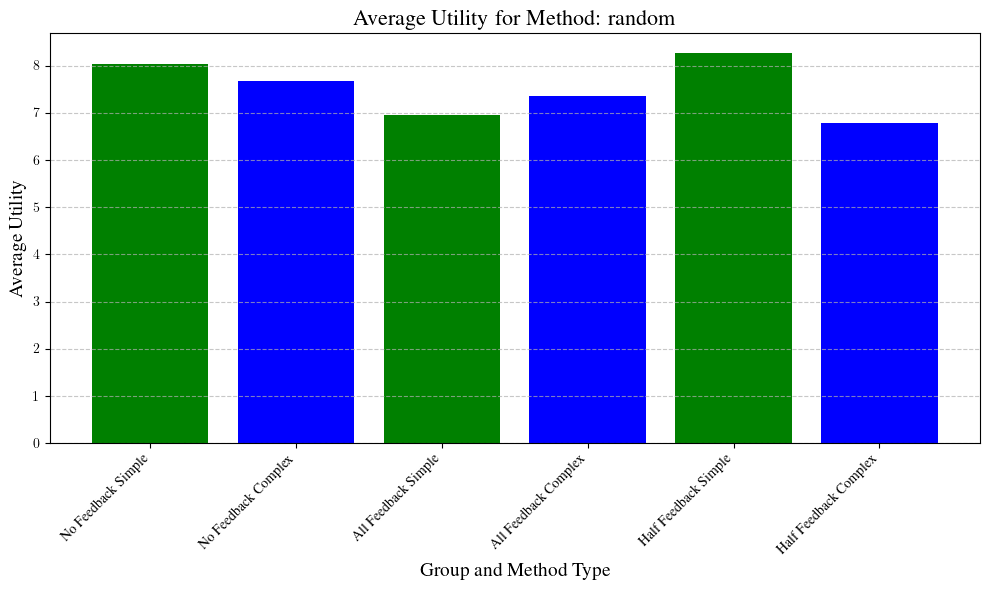

In [213]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_utility(utilities):
    return np.mean(utilities)

colors = {'simple': 'green', 'complex': 'blue'}

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

# methods = ['genetic', 'RL', 'random']

for method in data.keys():
    # if method not in ['genetic']:
    #     continue
    avg_utilities = {}

    for group_name, group_children in child_groups.items():
        for method_type in ['simple', 'complex']:
            menu_keys = sorted(data[method][method_type].keys(), key=int)
            group_predicted_utilities = []

            for menu_key in menu_keys:
                menu_utilities = [
                    data[method][method_type][menu_key]['predicted_utility'][child]
                    for child in group_children[method][method_type][menu_key] 
                    if child in data[method][method_type][menu_key]['predicted_utility']
                ]
                if menu_utilities:
                    group_predicted_utilities.append(np.mean(menu_utilities))

            avg_utility = calculate_average_utility(group_predicted_utilities)
            avg_utilities[f'{group_name} {method_type.capitalize()}'] = avg_utility

    # Plotting the average utilities as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(
        avg_utilities.keys(),
        avg_utilities.values(),
        color=[colors['simple'] if 'Simple' in k else colors['complex'] for k in avg_utilities.keys()]
    )
    
    plt.xlabel('Group and Method Type', fontsize=14)
    plt.ylabel('Average Utility', fontsize=14)
    plt.title(f'Average Utility for Method: {method}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [186]:
import time

def generate_feedback_chance(num_children=30):
    random.seed(time.time())
    feedback_values = [0, 0.5, 1]
    
    # Create a list of all children
    children = [f'child{index + 1}' for index in range(num_children)]
    
    # Shuffle the list of children
    random.shuffle(children)
    
    # Calculate how many children per feedback value
    group_size = num_children // len(feedback_values)
    remainder = num_children % len(feedback_values)

    child_feedback_dict = {}
    start_index = 0

    for i, value in enumerate(feedback_values):
        end_index = start_index + group_size + (1 if i < remainder else 0)
        selected_children = children[start_index:end_index]
        for child in selected_children:
            child_feedback_dict[child] = value
        start_index = end_index
    
    return child_feedback_dict

In [187]:
import random
from collections import Counter
import time 

def generate_balanced_feedback_chance(num_children=30, num_trials=1000):
    
    random.seed(time.time())
    # Define the feedback values
    feedback_values = [0, 0.5, 1]
    
    # Initialize a dictionary to store feedback for all trials
    feedback_dicts = []

    for _ in range(num_trials):
        
        feedback_dicts.append(generate_feedback_chance())

    return feedback_dicts

def test_feedback_distribution(num_trials=10000, num_children=30):
    feedback_counts = {f'child{index + 1}': Counter() for index in range(num_children)}
    
    feedback_dicts = generate_balanced_feedback_chance(num_children, num_trials)
    
    for feedback in feedback_dicts:
        for child, value in feedback.items():
            feedback_counts[child][value] += 1
    
    return feedback_counts

# Run the test
feedback_distribution = test_feedback_distribution(num_trials=50)

# Print the distribution for each child
for child, counts in feedback_distribution.items():
    print(f"{child}: {counts}")
    
# Optionally, calculate and print the average occurrences per feedback value
avg_occurrences = {value: 0 for value in [0, 0.5, 1]}
for counts in feedback_distribution.values():
    for value, count in counts.items():
        avg_occurrences[value] += count

avg_occurrences = {k: v / len(feedback_distribution) for k, v in avg_occurrences.items()}

print("\nAverage occurrences per feedback value across all children:")
for value, avg in avg_occurrences.items():
    print(f"Value {value}: {avg}")


child1: Counter({0.5: 18, 1: 16, 0: 16})
child2: Counter({0.5: 22, 1: 15, 0: 13})
child3: Counter({1: 18, 0: 16, 0.5: 16})
child4: Counter({0.5: 18, 1: 17, 0: 15})
child5: Counter({1: 21, 0.5: 17, 0: 12})
child6: Counter({0.5: 18, 0: 17, 1: 15})
child7: Counter({1: 18, 0.5: 17, 0: 15})
child8: Counter({1: 23, 0.5: 17, 0: 10})
child9: Counter({0.5: 19, 1: 18, 0: 13})
child10: Counter({0: 21, 0.5: 18, 1: 11})
child11: Counter({0.5: 17, 0: 17, 1: 16})
child12: Counter({1: 19, 0.5: 16, 0: 15})
child13: Counter({0: 20, 1: 17, 0.5: 13})
child14: Counter({0: 19, 0.5: 16, 1: 15})
child15: Counter({0: 25, 0.5: 13, 1: 12})
child16: Counter({1: 18, 0: 16, 0.5: 16})
child17: Counter({0: 21, 1: 16, 0.5: 13})
child18: Counter({0: 21, 1: 17, 0.5: 12})
child19: Counter({0: 20, 0.5: 20, 1: 10})
child20: Counter({0.5: 21, 0: 15, 1: 14})
child21: Counter({0: 20, 1: 18, 0.5: 12})
child22: Counter({0.5: 18, 1: 18, 0: 14})
child23: Counter({0: 20, 1: 18, 0.5: 12})
child24: Counter({1: 21, 0.5: 17, 0: 12})
c

In [125]:
from collections import Counter
import numpy as np

def count_child_occurrences(group_data):
    child_occurrences = Counter()

    # Iterate over all methods and types
    for method in group_data.keys():
        for method_type in group_data[method].keys():
            for menu_key, children in group_data[method][method_type].items():
                # Update the Counter with the children for each menu
                child_occurrences.update(children)

    return child_occurrences

# Get the child occurrences in the 'No Feedback' group
child_no_feedback_occurrences = count_child_occurrences(child_no_feedback)
child_all_feedback_occurrences = count_child_occurrences(child_all_feedback)
child_half_feedback_occurences = count_child_occurrences(child_half_feedback)
# Sort and print the occurrences from high to low
print("Child No Feedback Occurrences (High to Low):")
print(child_no_feedback_occurrences.most_common())

print("\nChild All Feedback Occurrences (High to Low):")
print(child_all_feedback_occurrences.most_common())

print("\nChild Half Feedback Occurrences (High to Low):")
print(child_half_feedback_occurences.most_common())
# # To check if the occurrences are approximately the same across all methods and types:
# all_occurrences = list(child_no_feedback_occurrences.values())

# # Calculate the mean and standard deviation of the occurrences
# mean_occurrences = np.mean(all_occurrences)
# std_dev_occurrences = np.std(all_occurrences)

# print(f"Mean occurrences of children in 'No Feedback' group: {mean_occurrences}")
# print(f"Standard deviation of occurrences: {std_dev_occurrences}")

# # Optional: Check the range of occurrences to see if they are approximately the same
# min_occurrences = min(all_occurrences)
# max_occurrences = max(all_occurrences)
# range_occurrences = max_occurrences - min_occurrences

# print(f"Minimum occurrences: {min_occurrences}")
# print(f"Maximum occurrences: {max_occurrences}")
# print(f"Range of occurrences: {range_occurrences}")



Child No Feedback Occurrences (High to Low):
[('child5', 49), ('child4', 45), ('child6', 42), ('child30', 39), ('child13', 38), ('child8', 37), ('child28', 37), ('child9', 36), ('child16', 36), ('child26', 36), ('child7', 35), ('child1', 35), ('child18', 34), ('child20', 34), ('child22', 34), ('child25', 34), ('child14', 34), ('child17', 34), ('child2', 33), ('child27', 33), ('child12', 33), ('child21', 32), ('child11', 31), ('child29', 31), ('child3', 30), ('child19', 28), ('child15', 28), ('child23', 27), ('child24', 26), ('child10', 23)]

Child All Feedback Occurrences (High to Low):
[('child19', 46), ('child15', 40), ('child22', 38), ('child26', 37), ('child14', 37), ('child27', 37), ('child13', 36), ('child11', 36), ('child12', 34), ('child29', 34), ('child7', 34), ('child20', 34), ('child3', 33), ('child28', 33), ('child1', 31), ('child17', 31), ('child10', 31), ('child30', 31), ('child16', 30), ('child5', 30), ('child24', 30), ('child25', 30), ('child9', 29), ('child2', 29), ('c

Old Data

In [47]:
from models.preferences.preference_utils import get_child_data

# Get children categorized by feedback chance
child_no_feedback = []
child_all_feedback = []
child_half_feedback = []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

# Define colors and line styles for different method types
colors = {'simple': 'green', 'complex': 'blue'}
child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

/tmp/ipykernel_513648/1771206887.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  gini = absolute_differences_sum / (2 * n**2 * mean_absolute_utility)
/tmp/ipykernel_513648/1771206887.py:13: RuntimeWarning: invalid value encountered in scalar divide
  gini = absolute_differences_sum / (2 * n**2 * mean_absolute_utility)


ValueError: x and y must have same first dimension, but have shapes (10,) and (300,)

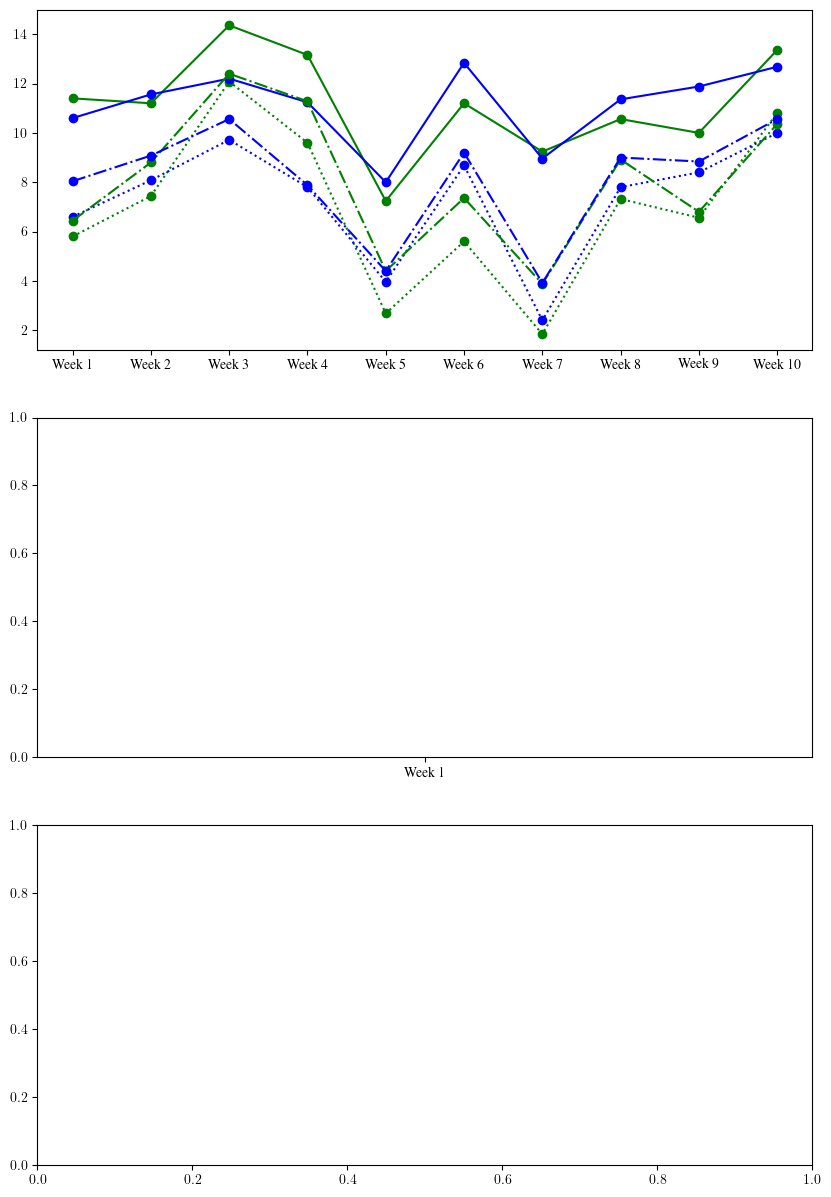

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_weekly_averages(utilities, menus_per_week=5):
    weekly_averages = [np.mean(utilities[i:i + menus_per_week]) for i in range(0, len(utilities), menus_per_week)]
    return weekly_averages

def calculate_gini_coefficient(utilities):
    utilities = np.array(utilities)
    n = len(utilities)
    mean_absolute_utility = np.mean(np.abs(utilities))
    absolute_differences_sum = np.sum(np.abs(np.subtract.outer(utilities, utilities)))
    gini = absolute_differences_sum / (2 * n**2 * mean_absolute_utility)
    return gini

colors = {'simple': 'green', 'complex': 'blue'}
line_styles = {'No Feedback': ':', 'All Feedback': '-', 'Half Feedback': '-.'}

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

# methods = ['genetic', 'RL', 'random']

for method in data.keys():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    for group_name, group_children in child_groups.items():
        for method_type in ['simple', 'complex']:
            menu_keys = sorted(data[method][method_type].keys(), key=int)
            predicted_utilities = [
                sum(data[method][method_type][menu_key]['predicted_utility'][child] 
                    for child in group_children if child in data[method][method_type][menu_key]['predicted_utility'])
                for menu_key in menu_keys
            ]
            
            predicted_utilities_weekly = calculate_weekly_averages(predicted_utilities)
            weeks = [f"Week {i+1}" for i in range(len(predicted_utilities_weekly))]
            ax1.plot(weeks, predicted_utilities_weekly, marker='o', linestyle=line_styles[group_name], 
                     color=colors[method_type], label=f'{group_name} {method_type.capitalize()}')

    for method_type in ['simple', 'complex']:
        menu_keys = sorted(data[method][method_type].keys(), key=int)
        all_predicted_utilities = [
            sum(data[method][method_type][menu_key]['predicted_utility'].values()) 
            for menu_key in menu_keys
        ]
        
        weekly_gini_predicted = [calculate_gini_coefficient(all_predicted_utilities[i:i + 5]) 
                                 for i in range(0, len(all_predicted_utilities), 5)]

        ax2.plot(weeks, weekly_gini_predicted, marker='x', linestyle='-', 
                 color=colors[method_type], label=f'{method_type.capitalize()} Gini Coefficient')

    for method_type in ['simple', 'complex']:
        preference_scores = [
            data[method][method_type][menu_key]['info']['reward']['preference_score']
            for menu_key in menu_keys
        ]
        
        preference_scores_weekly = calculate_weekly_averages(preference_scores)
        ax3.plot(weeks, preference_scores_weekly, marker='s', linestyle='-', 
                 color=colors[method_type], label=f'{method_type.capitalize()} Preference Score')

    ax1.set_xlabel('Week', fontsize=14)
    ax1.set_ylabel('Predicted Utility', fontsize=14)
    ax1.set_title(f'Weekly Average Predicted Utility for Method: {method}', fontsize=16)
    ax1.legend(title='Group and Method', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)

    ax2.set_xlabel('Week', fontsize=14)
    ax2.set_ylabel('Gini Coefficient', fontsize=14)
    ax2.set_title(f'Gini Coefficient Evolution for Method: {method}', fontsize=16)
    ax2.legend(title='Method', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)

    ax3.set_xlabel('Week', fontsize=14)
    ax3.set_ylabel('Preference Score', fontsize=14)
    ax3.set_title(f'Weekly Average Preference Score for Method: {method}', fontsize=16)
    ax3.legend(title='Method', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


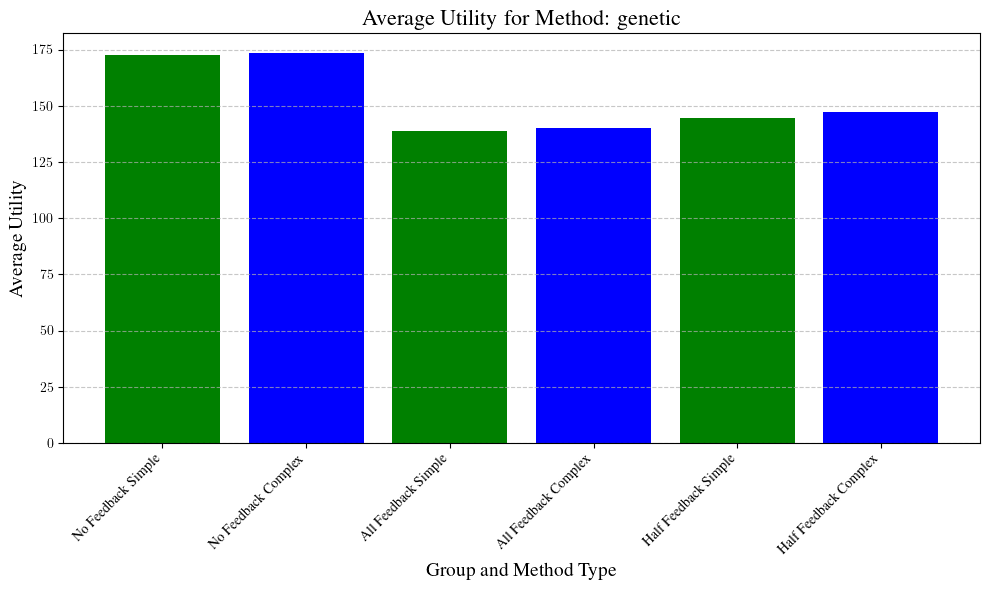

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_utility(utilities):
    return np.mean(utilities)

from models.preferences.preference_utils import get_child_data

child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

colors = {'simple': 'green', 'complex': 'blue'}
child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

methods = ['genetic', 'RL', 'random']

for method in methods:
    if method not in ['genetic']:
        continue
    avg_utilities = {}

    for group_name, group_children in child_groups.items():
        for method_type in ['simple', 'complex']:
            menu_keys = sorted(data[method][method_type].keys(), key=int)
            predicted_utilities = [
                sum(data[method][method_type][menu_key]['predicted_utility'][child] 
                    for child in group_children if child in data[method][method_type][menu_key]['predicted_utility'])
                for menu_key in menu_keys
            ]

            avg_utility = calculate_average_utility(predicted_utilities)
            avg_utilities[f'{group_name} {method_type.capitalize()}'] = avg_utility

    # Plotting the average utilities as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(avg_utilities.keys(), avg_utilities.values(), color=[colors['simple'] if 'Simple' in k else colors['complex'] for k in avg_utilities.keys()])
    
    plt.xlabel('Group and Method Type', fontsize=14)
    plt.ylabel('Average Utility', fontsize=14)
    plt.title(f'Average Utility for Method: {method}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


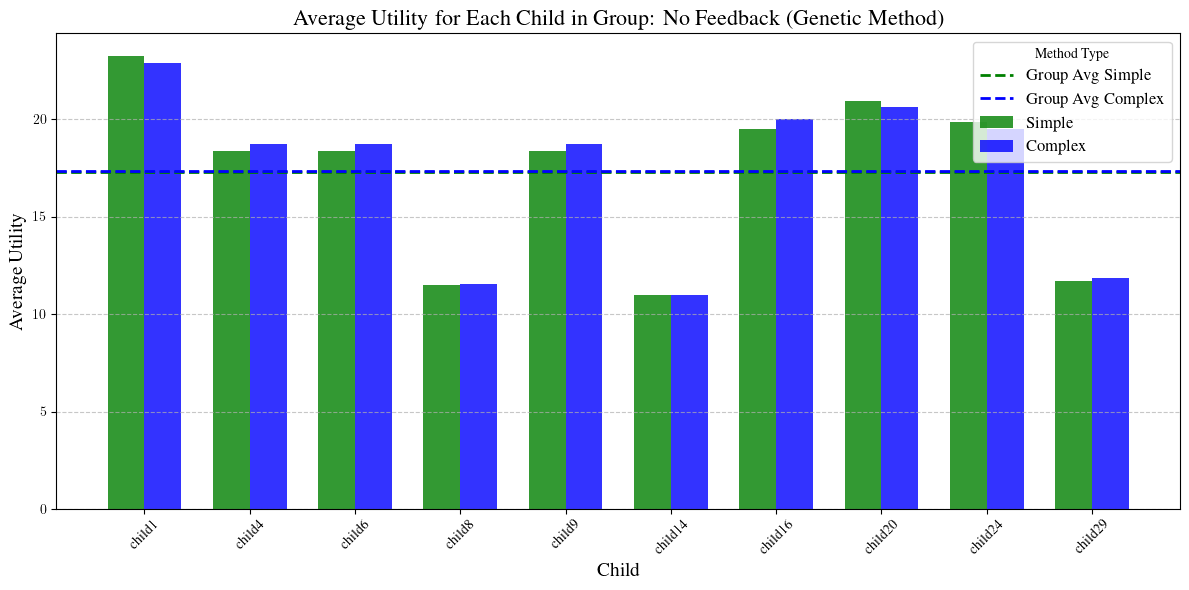

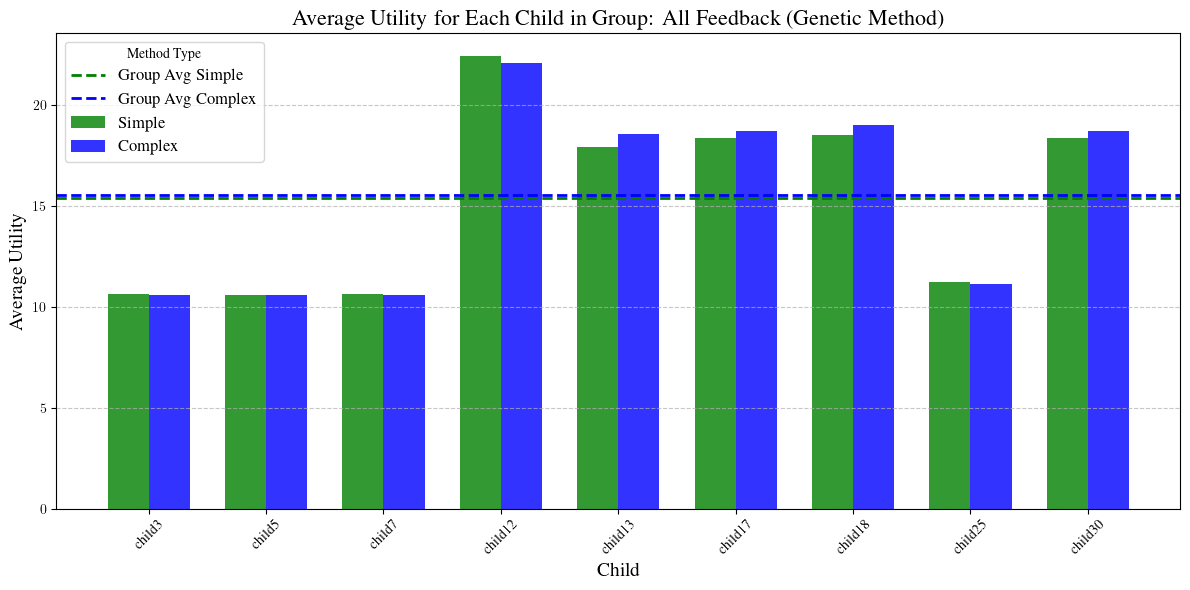

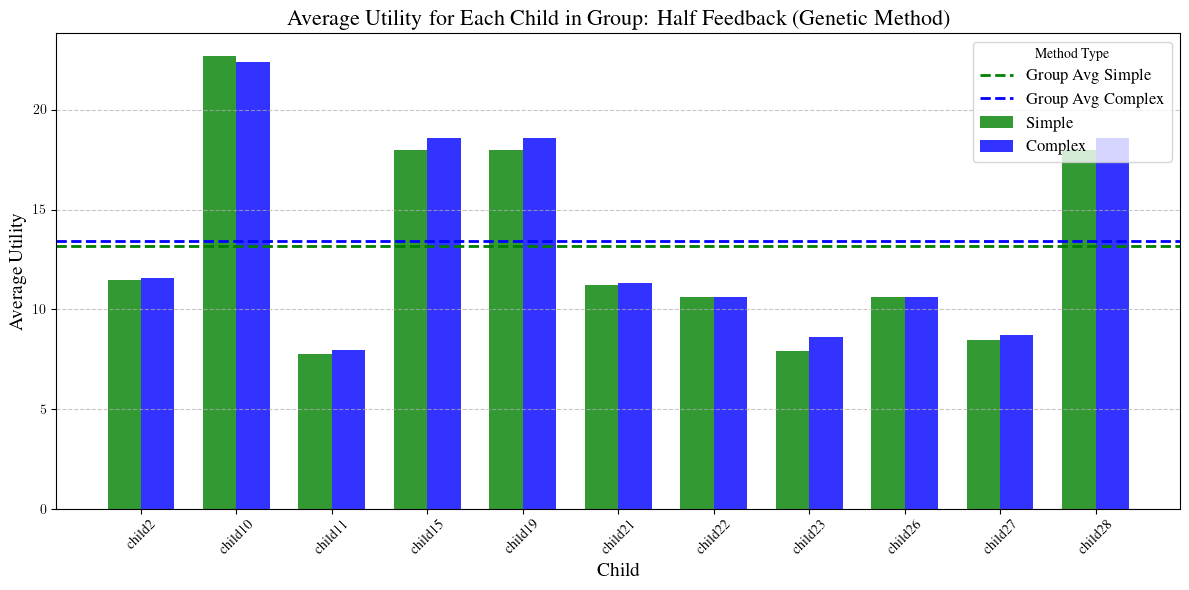

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_utility(utilities):
    return np.mean(utilities)

from models.preferences.preference_utils import get_child_data

child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

method = 'genetic'
colors = {'simple': 'green', 'complex': 'blue'}

for group_name, group_children in child_groups.items():
    avg_utilities_simple = []
    avg_utilities_complex = []

    for child in group_children:
        menu_keys = sorted(data[method]['simple'].keys(), key=int)
        predicted_utilities_simple = [
            data[method]['simple'][menu_key]['predicted_utility'].get(child, 0)
            for menu_key in menu_keys
        ]
        avg_utility_simple = calculate_average_utility(predicted_utilities_simple)
        avg_utilities_simple.append(avg_utility_simple)

        predicted_utilities_complex = [
            data[method]['complex'][menu_key]['predicted_utility'].get(child, 0)
            for menu_key in menu_keys
        ]
        avg_utility_complex = calculate_average_utility(predicted_utilities_complex)
        avg_utilities_complex.append(avg_utility_complex)

    # Calculate the overall average for the group
    overall_avg_simple = np.mean(avg_utilities_simple)
    overall_avg_complex = np.mean(avg_utilities_complex)

    # Plotting the average utilities as bar charts
    fig, ax = plt.subplots(figsize=(12, 6))
    index = np.arange(len(group_children))
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, avg_utilities_simple, bar_width,
                     alpha=opacity, color=colors['simple'],
                     label='Simple')

    rects2 = plt.bar(index + bar_width, avg_utilities_complex, bar_width,
                     alpha=opacity, color=colors['complex'],
                     label='Complex')

    # Plotting the overall average lines
    plt.axhline(y=overall_avg_simple, color=colors['simple'], linestyle='--', linewidth=2, label='Group Avg Simple')
    plt.axhline(y=overall_avg_complex, color=colors['complex'], linestyle='--', linewidth=2, label='Group Avg Complex')

    plt.xlabel('Child', fontsize=14)
    plt.ylabel('Average Utility', fontsize=14)
    plt.title(f'Average Utility for Each Child in Group: {group_name} (Genetic Method)', fontsize=16)
    plt.xticks(index + bar_width / 2, group_children, rotation=45)
    plt.legend(title='Method Type', fontsize=12)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


In [89]:
import os
import json
from collections import defaultdict

# Define the folder path
folder_path = '/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp5/menu_util'

# Initialize a nested dictionary to store grouped data
data_dict = defaultdict(lambda: defaultdict(dict))

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and load the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
            
            # Parse the filename to extract the method and split ratio
            strings = filename.split("_")
            method = strings[10]
            method_type = strings[6]
            
            # Group data by method and split ratio
            data_dict[method][method_type] = data


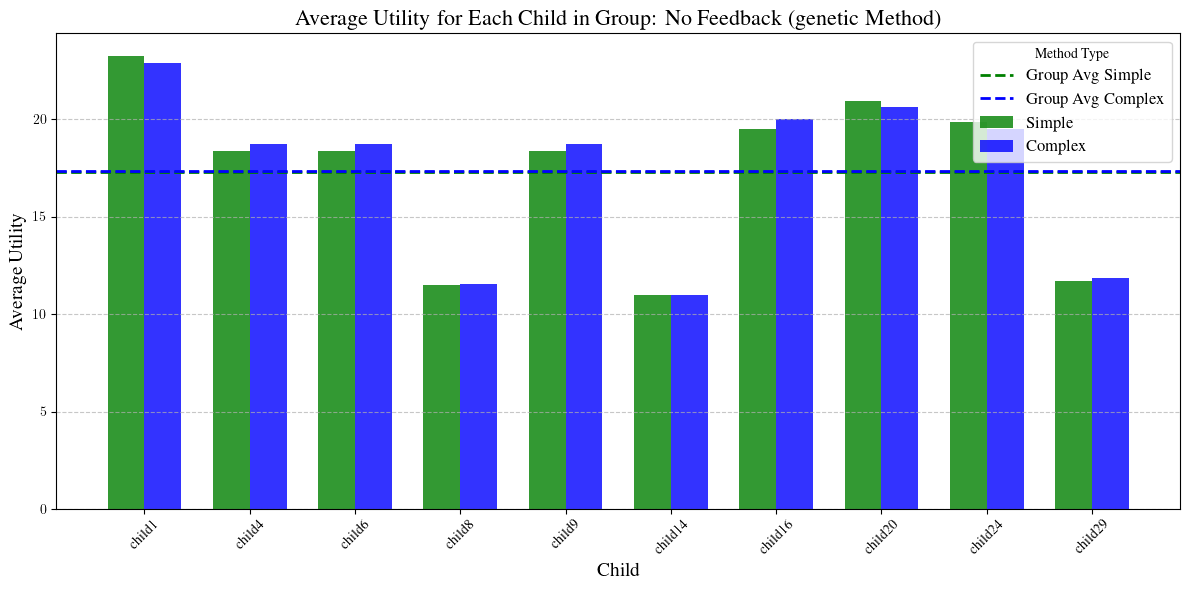

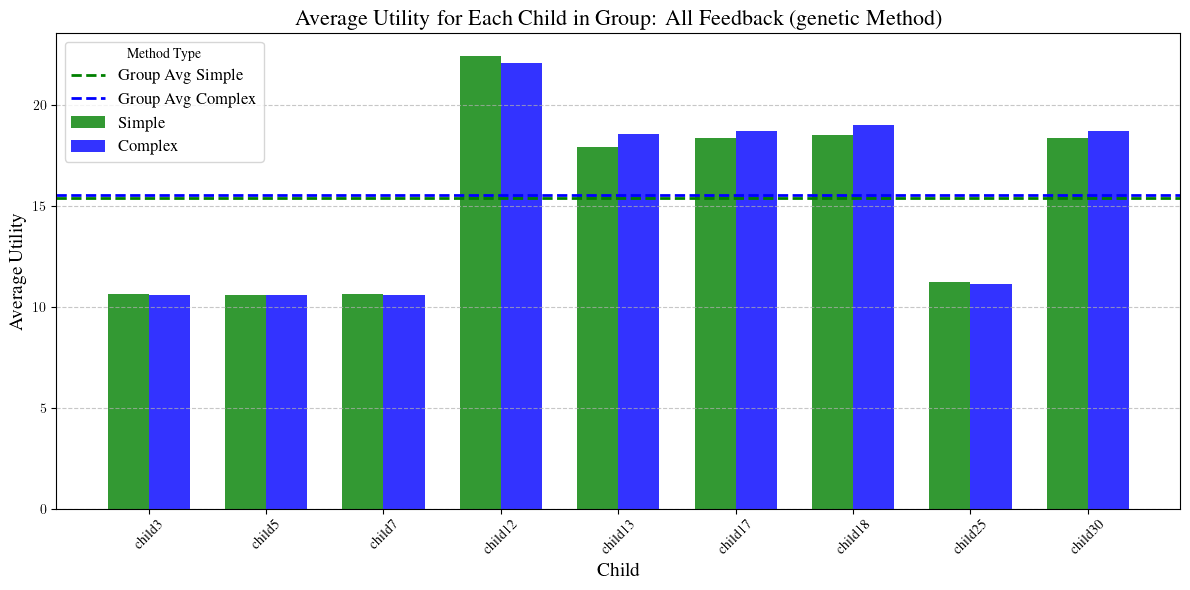

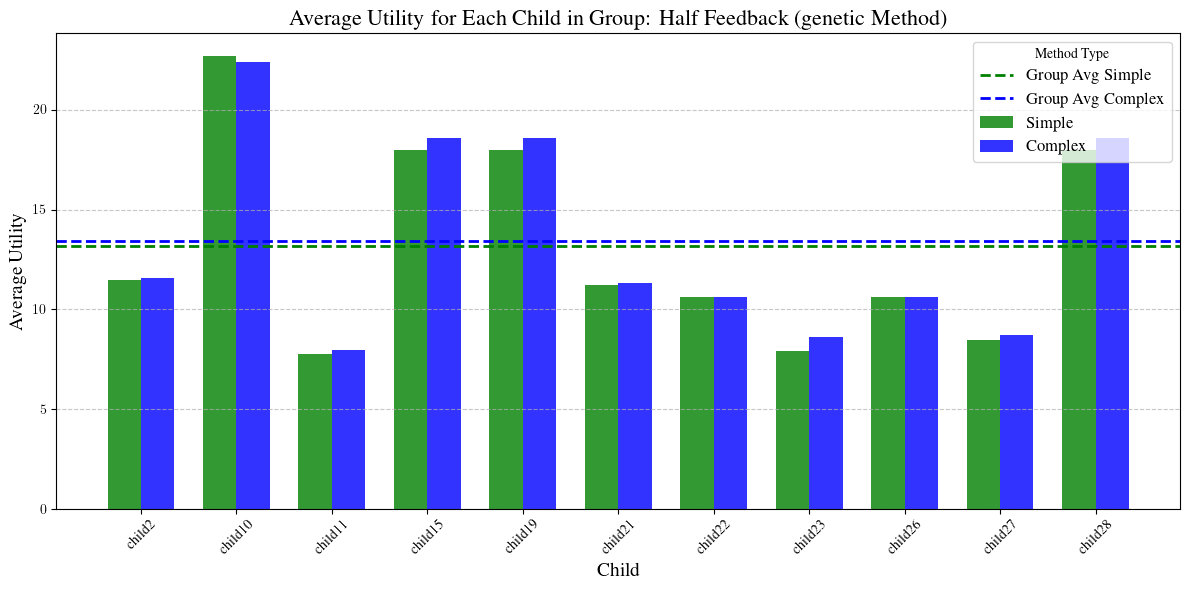

In [115]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_utility(utilities):
    return np.mean(utilities) if utilities else 0

# Assuming the data_dict is populated with the method data from the previous step
method = 'genetic'
colors = {'simple': 'green', 'complex': 'blue'}

# Assuming get_child_data() returns a dictionary of child data like:
# { 'child1': {'feedback_chance': 0.5}, 'child2': {'feedback_chance': 1}, ... }
child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

for group_name, group_children in child_groups.items():
    avg_utilities_simple = []
    avg_utilities_complex = []

    for child in group_children:
        predicted_utilities_simple = []

        # Loop through each week
        for week in range(10):  # Assuming weeks range from 0 to 9
            # Loop through each day (1 to 5 as strings)
            for day in range(5):
                utility = list(data_dict[method]['simple'][week]['predicted_utility'].values())[day][child]
                predicted_utilities_simple.append(utility)

        avg_utility_simple = calculate_average_utility(predicted_utilities_simple)
        avg_utilities_simple.append(avg_utility_simple)

        predicted_utilities_complex = []

        # Loop through each week
        for week in range(10):  # Assuming weeks range from 0 to 9
            # Loop through each day (1 to 50 as strings)
            for day in range(5):
                utility = list(data_dict[method]['complex'][week]['predicted_utility'].values())[day][child]
                predicted_utilities_complex.append(utility)

        avg_utility_complex = calculate_average_utility(predicted_utilities_complex)
        avg_utilities_complex.append(avg_utility_complex)

    # Calculate the overall average for the group
    overall_avg_simple = np.mean(avg_utilities_simple)
    overall_avg_complex = np.mean(avg_utilities_complex)

    # Plotting the average utilities as bar charts
    fig, ax = plt.subplots(figsize=(12, 6))
    index = np.arange(len(group_children))
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, avg_utilities_simple, bar_width,
                     alpha=opacity, color=colors['simple'],
                     label='Simple')

    rects2 = plt.bar(index + bar_width, avg_utilities_complex, bar_width,
                     alpha=opacity, color=colors['complex'],
                     label='Complex')

    # Plotting the overall average lines
    plt.axhline(y=overall_avg_simple, color=colors['simple'], linestyle='--', linewidth=2, label='Group Avg Simple')
    plt.axhline(y=overall_avg_complex, color=colors['complex'], linestyle='--', linewidth=2, label='Group Avg Complex')

    plt.xlabel('Child', fontsize=14)
    plt.ylabel('Average Utility', fontsize=14)
    plt.title(f'Average Utility for Each Child in Group: {group_name} ({method} Method)', fontsize=16)
    plt.xticks(index + bar_width / 2, group_children, rotation=45)
    plt.legend(title='Method Type', fontsize=12)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

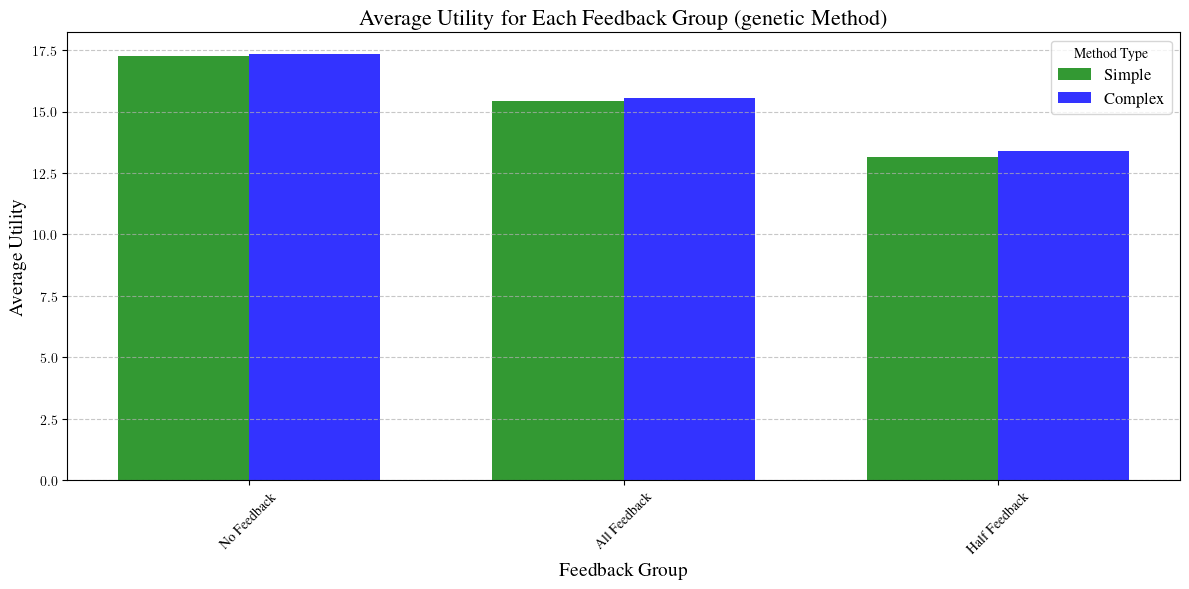

In [117]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_utility(utilities):
    return np.mean(utilities) if utilities else 0

# Assuming the data_dict is populated with the method data from the previous step
method = 'genetic'
colors = {'simple': 'green', 'complex': 'blue'}

# Assuming get_child_data() returns a dictionary of child data like:
# { 'child1': {'feedback_chance': 0.5}, 'child2': {'feedback_chance': 1}, ... }
child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

# Initialize lists to store overall averages for each feedback group
group_avg_simple = []
group_avg_complex = []

# Iterate over each feedback group
for group_name, group_children in child_groups.items():
    avg_utilities_simple = []
    avg_utilities_complex = []

    for child in group_children:
        predicted_utilities_simple = []

        # Loop through each week
        for week in range(10):  # Assuming weeks range from 0 to 9
            # Loop through each day (1 to 50 as strings)
            for day in range(5):  # Adjust this if days are actually from 1 to 50
                utility = list(data_dict[method]['simple'][week]['predicted_utility'].values())[day][child]
                predicted_utilities_simple.append(utility)

        avg_utility_simple = calculate_average_utility(predicted_utilities_simple)
        avg_utilities_simple.append(avg_utility_simple)

        predicted_utilities_complex = []

        # Loop through each week
        for week in range(10):  # Assuming weeks range from 0 to 9
            # Loop through each day (1 to 50 as strings)
            for day in range(5):  # Adjust this if days are actually from 1 to 50
                utility = list(data_dict[method]['complex'][week]['predicted_utility'].values())[day][child]
                predicted_utilities_complex.append(utility)

        avg_utility_complex = calculate_average_utility(predicted_utilities_complex)
        avg_utilities_complex.append(avg_utility_complex)

    # Calculate the overall average for the group and append to the lists
    overall_avg_simple = np.mean(avg_utilities_simple)
    overall_avg_complex = np.mean(avg_utilities_complex)
    
    group_avg_simple.append(overall_avg_simple)
    group_avg_complex.append(overall_avg_complex)

# Plotting the overall average utilities for each group
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(child_groups))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, group_avg_simple, bar_width,
                 alpha=opacity, color=colors['simple'],
                 label='Simple')

rects2 = plt.bar(index + bar_width, group_avg_complex, bar_width,
                 alpha=opacity, color=colors['complex'],
                 label='Complex')

plt.xlabel('Feedback Group', fontsize=14)
plt.ylabel('Average Utility', fontsize=14)
plt.title(f'Average Utility for Each Feedback Group ({method} Method)', fontsize=16)
plt.xticks(index + bar_width / 2, child_groups.keys(), rotation=45)
plt.legend(title='Method Type', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


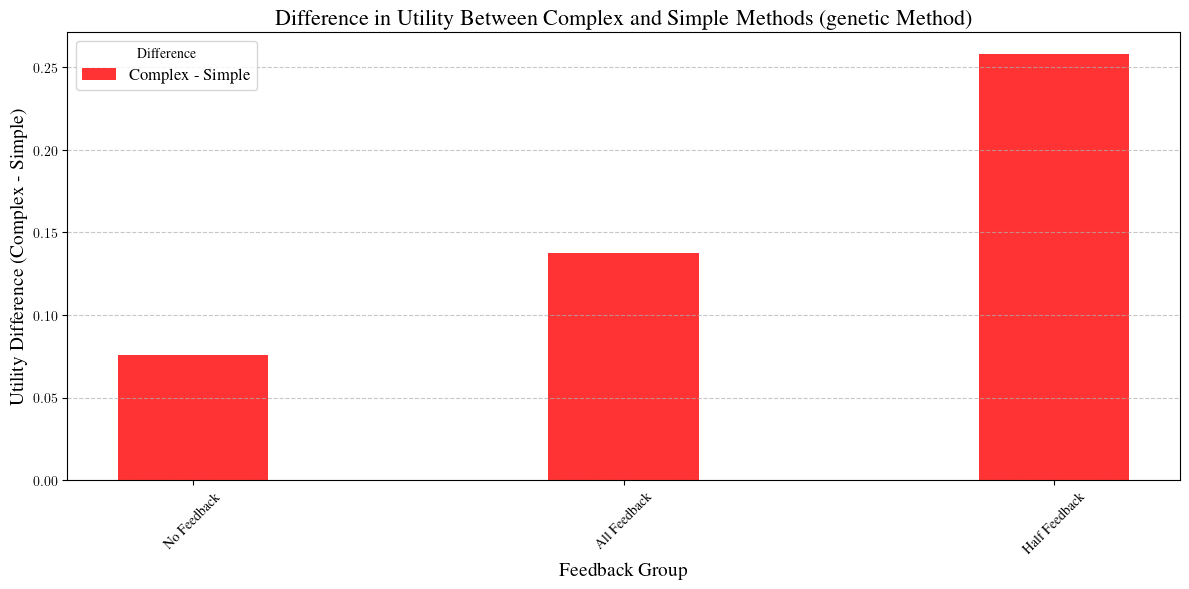

In [139]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_utility(utilities):
    return np.mean(utilities) if utilities else 0

# Assuming the data_dict is populated with the method data from the previous step
method = 'genetic'
colors = {'simple': 'green', 'complex': 'blue', 'difference': 'red'}

# Assuming get_child_data() returns a dictionary of child data like:
# { 'child1': {'feedback_chance': 0.5}, 'child2': {'feedback_chance': 1}, ... }
child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

# Initialize lists to store overall averages and differences for each feedback group
group_avg_simple = []
group_avg_complex = []
group_difference = []

# Iterate over each feedback group
for group_name, group_children in child_groups.items():
    avg_utilities_simple = []
    avg_utilities_complex = []

    for child in group_children:
        predicted_utilities_simple = []

        # Loop through each week
        for week in range(10):  # Assuming weeks range from 0 to 9
            # Loop through each day (1 to 50 as strings)
            for day in range(5):  # Adjust this if days are actually from 1 to 50
                utility = list(data_dict[method]['simple'][week]['predicted_utility'].values())[day][child]
                predicted_utilities_simple.append(utility)

        avg_utility_simple = calculate_average_utility(predicted_utilities_simple)
        avg_utilities_simple.append(avg_utility_simple)

        predicted_utilities_complex = []

        # Loop through each week
        for week in range(10):  # Assuming weeks range from 0 to 9
            # Loop through each day (1 to 50 as strings)
            for day in range(5):  # Adjust this if days are actually from 1 to 50
                utility = list(data_dict[method]['complex'][week]['predicted_utility'].values())[day][child]
                predicted_utilities_complex.append(utility)

        avg_utility_complex = calculate_average_utility(predicted_utilities_complex)
        avg_utilities_complex.append(avg_utility_complex)

    # Calculate the overall average for the group and append to the lists
    overall_avg_simple = np.mean(avg_utilities_simple)
    overall_avg_complex = np.mean(avg_utilities_complex)
    difference = overall_avg_complex - overall_avg_simple  # Calculate the difference

    group_avg_simple.append(overall_avg_simple)
    group_avg_complex.append(overall_avg_complex)
    group_difference.append(difference)

# Plotting the difference between "simple" and "complex" methods for each group
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(child_groups))
bar_width = 0.35
opacity = 0.8

rects = plt.bar(index, group_difference, bar_width,
                 alpha=opacity, color=colors['difference'],
                 label='Complex - Simple')

plt.xlabel('Feedback Group', fontsize=14)
plt.ylabel('Utility Difference (Complex - Simple)', fontsize=14)
plt.title(f'Difference in Utility Between Complex and Simple Methods ({method} Method)', fontsize=16)
plt.xticks(index, child_groups.keys(), rotation=45)
plt.legend(title='Difference', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


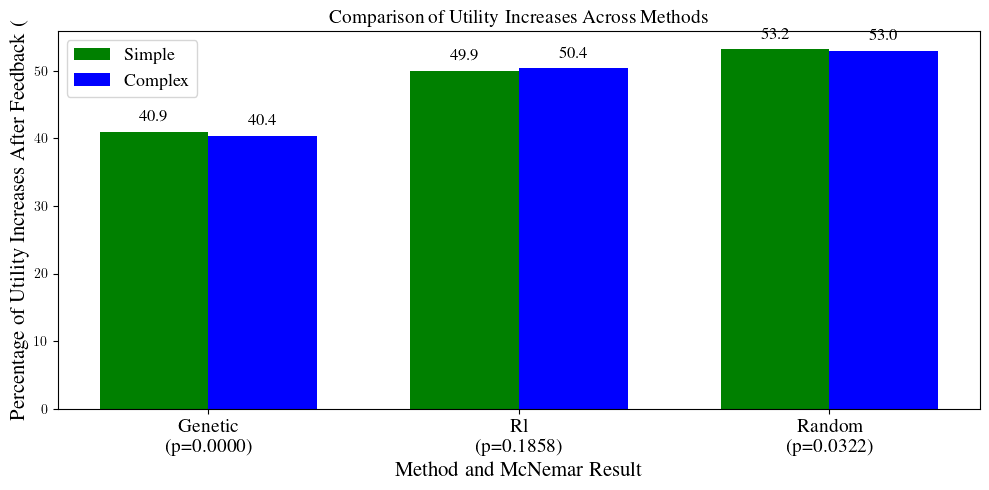

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

def analyze_flips(data_dict, method, method_type, child_groups):
    flips = []

    for group_name, group_children in child_groups.items():
        for child in group_children:
            predicted_utilities = []

            # Extract the predicted utilities as in your method
            for week in range(10):  # Assuming weeks range from 0 to 9
                for day in range(5):  # Adjust this if days are actually from 1 to 50
                    utility = list(data_dict[method][method_type][week]['predicted_utility'].values())[day].get(child, 0)
                    predicted_utilities.append(utility)

            # Analyze flips for the child
            for i in range(1, len(predicted_utilities) - 1):
                previous_day_util = predicted_utilities[i - 1]
                current_day_util = predicted_utilities[i]
                next_day_feedback = predicted_utilities[i + 1]  # Feedback info, assumed to be captured in utility values

                # Check if utility increased or decreased
                if previous_day_util < current_day_util and next_day_feedback:
                    flips.append('increased')
                elif previous_day_util > current_day_util and next_day_feedback:
                    flips.append('decreased')

    return flips

# Assuming the data_dict is populated with the method data from the previous step
methods = ['genetic', 'RL', 'random']
colors = {'simple': 'green', 'complex': 'blue'}

child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

# Initialize lists to store results
simple_percentages = []
complex_percentages = []
mcnemar_results = []

# Analyze each method
for method in methods:
    simple_flips = analyze_flips(data_dict, method, 'simple', child_groups)
    complex_flips = analyze_flips(data_dict, method, 'complex', child_groups)

    simple_flip_count = simple_flips.count('increased')
    complex_flip_count = complex_flips.count('increased')

    total_simple = len(simple_flips)
    total_complex = len(complex_flips)

    simple_percentage_flipped = (simple_flip_count / total_simple) * 100 if total_simple > 0 else 0
    complex_percentage_flipped = (complex_flip_count / total_complex) * 100 if total_complex > 0 else 0

    # McNemar's test setup
    table = np.array([[simple_flip_count, total_simple - simple_flip_count],
                      [complex_flip_count, total_complex - complex_flip_count]])

    mcnemar_result = mcnemar(table, exact=True)
    mcnemar_results.append(mcnemar_result.pvalue)

    simple_percentages.append(simple_percentage_flipped)
    complex_percentages.append(complex_percentage_flipped)

# Plotting the results
x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, simple_percentages, width, label='Simple', color=colors['simple'])
rects2 = ax.bar(x + width/2, complex_percentages, width, label='Complex', color=colors['complex'])

ax.set_xlabel('Method and McNemar Result', fontsize=15)
ax.set_ylabel('Percentage of Utility Increases After Feedback (%)', fontsize=15)
ax.set_title('Comparison of Utility Increases Across Methods', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([f'{method.capitalize()}\n(p={p:.4f})' for method, p in zip(methods, mcnemar_results)], fontsize=14)
ax.legend(fontsize=13)

# Display the percentage above each bar
for i, v in enumerate(simple_percentages):
    ax.text(i - width/2, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)
for i, v in enumerate(complex_percentages):
    ax.text(i + width/2, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)

fig.tight_layout()
plt.show()


# Exp 4

In [159]:
import json
import matplotlib.pyplot as plt

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

# Load the JSON data
file_path = "/home/laurie2905/Masters Thesis/Masters_RL/scripts/preference/report_tests/report_saved_data/Exp4/all_results_genetic.json"

with open(file_path, 'r') as f:
    data = json.load(f)


In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Placeholder for data extraction (you will replace this with your actual data)
days = range(1, 50)

# Initialize dictionaries to store the daily values for each key per child
daily_data = {
    'percent_of_known_preferences': [],
    'true_utility': [],
    'predicted_utility': []
}

# Extract the data from the dictionary
for day in days:
    # Assuming the data is a list of values for each child
    children_percent_of_known_preferences = data['genetic']['perfect'][str(day)]['percent_of_known_preferences']
    children_true_utility = data['genetic']['perfect'][str(day)]['true_utility']
    children_predicted_utility = data['genetic']['perfect'][str(day)]['predicted_utility']

    daily_data['percent_of_known_preferences'].append(children_percent_of_known_preferences)
    daily_data['true_utility'].append(children_true_utility)
    daily_data['predicted_utility'].append(children_predicted_utility)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame({
    'percent_of_known_preferences': daily_data['percent_of_known_preferences'],
    'true_utility': daily_data['true_utility'],
    'predicted_utility': daily_data['predicted_utility']
}, index=days)

# Extracting individual child data and calculating the average for each day
df['avg_percent_of_known_preferences'] = df['percent_of_known_preferences'].apply(lambda x: np.mean(list(x.values())))
df['avg_true_utility'] = df['true_utility'].apply(lambda x: np.mean(list(x.values())))
df['avg_predicted_utility'] = df['predicted_utility'].apply(lambda x: np.mean(list(x.values())))

# If you need to keep the individual data separate, you can do so like this:
df['child_data_percent_of_known_preferences'] = df['percent_of_known_preferences'].apply(lambda x: list(x.values()))
df['child_data_true_utility'] = df['true_utility'].apply(lambda x: list(x.values()))
df['child_data_predicted_utility'] = df['predicted_utility'].apply(lambda x: list(x.values()))


In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Placeholder for data extraction (you will replace this with your actual data)
days = range(1, 50)

# Initialize dictionaries to store the daily values for each key per child
daily_data = {
    'percent_of_known_preferences': [],
    'true_utility': [],
    'predicted_utility': []
}

# Extract the data from the dictionary
for day in days:
    children_percent_of_known_preferences = data['genetic']['perfect'][str(day)]['percent_of_known_preferences']
    children_true_utility = data['genetic']['perfect'][str(day)]['true_utility']
    children_predicted_utility = data['genetic']['perfect'][str(day)]['predicted_utility']

    daily_data['percent_of_known_preferences'].append(children_percent_of_known_preferences)
    daily_data['true_utility'].append(children_true_utility)
    daily_data['predicted_utility'].append(children_predicted_utility)

print(daily_data)

# # Convert to pandas DataFrame for easier manipulation
# df = pd.DataFrame({
#     'percent_of_known_preferences': daily_data['percent_of_known_preferences'],
#     'true_utility': daily_data['true_utility'],
#     'predicted_utility': daily_data['predicted_utility']
# }, index=days)

# # Ensure numeric data by extracting values from the dictionaries
# df['avg_percent_of_known_preferences'] = df['percent_of_known_preferences'].apply(lambda x: np.mean(list(x.values())))
# df['avg_true_utility'] = df['true_utility'].apply(lambda x: np.mean(list(x.values())))
# df['avg_predicted_utility'] = df['predicted_utility'].apply(lambda x: np.mean(list(x.values())))

# # If you need to keep the individual data separate, you can do so like this:
# df['child_data_percent_of_known_preferences'] = df['percent_of_known_preferences'].apply(lambda x: list(x.values()))
# df['child_data_true_utility'] = df['true_utility'].apply(lambda x: list(x.values()))
# df['child_data_predicted_utility'] = df['predicted_utility'].apply(lambda x: list(x.values()))


{'percent_of_known_preferences': [{'child1': 48.888888888888886, 'child2': 49.629629629629626, 'child3': 51.11111111111111, 'child4': 48.888888888888886, 'child5': 49.629629629629626, 'child6': 48.888888888888886, 'child7': 50.37037037037037, 'child8': 49.629629629629626, 'child9': 48.888888888888886, 'child10': 48.888888888888886, 'child11': 49.629629629629626, 'child12': 49.629629629629626, 'child13': 48.888888888888886, 'child14': 49.629629629629626, 'child15': 48.888888888888886, 'child16': 48.888888888888886, 'child17': 49.629629629629626, 'child18': 48.888888888888886, 'child19': 48.888888888888886, 'child20': 48.888888888888886, 'child21': 49.629629629629626, 'child22': 49.629629629629626, 'child23': 49.629629629629626, 'child24': 48.888888888888886, 'child25': 51.11111111111111, 'child26': 51.85185185185185, 'child27': 49.629629629629626, 'child28': 48.888888888888886, 'child29': 49.629629629629626, 'child30': 49.629629629629626}, {'child1': 48.888888888888886, 'child2': 49.629

In [200]:
len(daily_data['percent_of_known_preferences'])

49

In [209]:
child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}


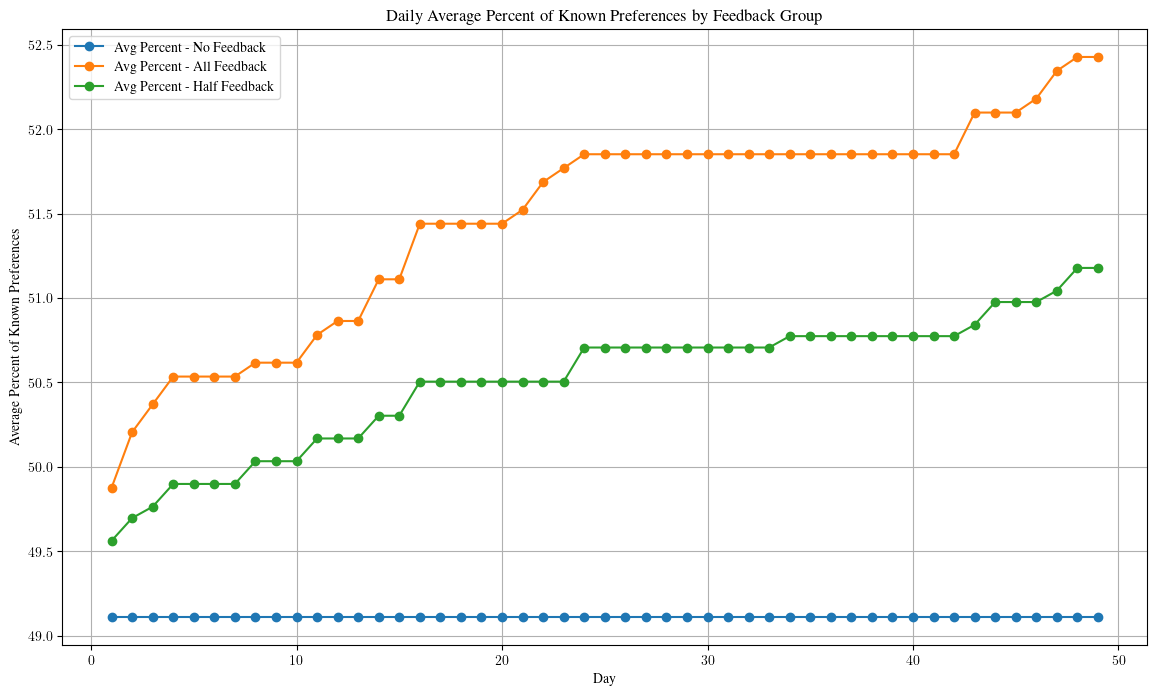

In [210]:
# Grouping children based on feedback chance
child_no_feedback, child_all_feedback, child_half_feedback = [], [], []

for child, values in get_child_data().items():
    if values['feedback_chance'] == 0:
        child_no_feedback.append(child)
    elif values['feedback_chance'] == 1:
        child_all_feedback.append(child)
    elif values['feedback_chance'] == 0.5:
        child_half_feedback.append(child)

child_groups = {
    'No Feedback': child_no_feedback,
    'All Feedback': child_all_feedback,
    'Half Feedback': child_half_feedback
}

# Calculate the daily averages for each group
group_averages = {group: [] for group in child_groups}

for day in range(49):
    for group, children in child_groups.items():
        group_values = [daily_data['percent_of_known_preferences'][day][child] for child in children]
        group_averages[group].append(np.mean(group_values))

# Plotting
plt.figure(figsize=(14, 8))

for group, averages in group_averages.items():
    plt.plot(range(1, 50), averages, marker='o', label=f'Avg Percent - {group}')

plt.title('Daily Average Percent of Known Preferences by Feedback Group')
plt.xlabel('Day')
plt.ylabel('Average Percent of Known Preferences')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
import matplotlib.pyplot as plt
import numpy as np


# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

## Define the score metrics
score_metrics = ['nutrient_score', 'cost_score', 'co2_score', 'environment_score', 'preference_score']

# Initialize accumulators for each key in values
key_metric_totals = {}
key_counts = {}
# Loop through the data and accumulate the scores per key
for index in range(len(data)):
    for run, values in data[index].items():
        for key in values.keys():
            if key not in key_metric_totals:
                key_metric_totals[key] = {metric: 0 for metric in score_metrics}
                key_metric_totals[key]['reward'] = 0
                key_metric_totals[key]['time_taken'] = 0
                key_counts[key] = 0

            # Accumulate metrics, reward, and time taken for the current key
            for metric in score_metrics:
                key_metric_totals[key][metric] += values[key]['info']['reward'][metric]
            key_metric_totals[key]['reward'] += values[key]['reward'] 
            key_metric_totals[key]['time_taken'] += values[key]['time_taken']
            
            # Increment the count for this key
            key_counts[key] += 1

# Calculate averages for each key
key_averages = {}
for key, totals in key_metric_totals.items():
    key_averages[key] = {metric: totals[metric] / key_counts[key] for metric in score_metrics}
    key_averages[key]['reward'] = totals['reward'] / key_counts[key]
    key_averages[key]['time_taken'] = totals['time_taken'] / key_counts[key]

# Print the averages per key
for key, averages in key_averages.items():
    print(f"Average Metrics for key: {key}")
    for metric, average in averages.items():
        if metric != 'time_taken':
            print(f"  {metric}: {average:.2f}")
        else:
            print(f"  {metric}: {average:.2f} seconds")
    print("\n")
    

KeyError: 0